In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**2.1	Analysis of Literacy rate vs Total crimes.**

- As per my thinking, I'm taking total crimes mentioned in each sheet  or adding total crimes as per individual states provided to us. With this I have created one excel sheet which contains only total crime data as per states required for our analysis. 
- Secondly I have reshuffled the names of states in collected data and made changes to the sheet so that it will be easier for me to concat this sheet to abpove mentioned crime datasheet.
- Further I have taken data for only year 2001 and 2011 as Indian census is carried out once in a decade. Since I dont have the data for other years(ex. literacy rate of each state), it wont do me good to analyse 2002 data on basis of 2001 literacy rate values.
- Also I have not taken sheets such as 'Juvenile_apprehended_state_IPC_2001_2010','Property_stolen_and_recovered_nature_of_property_2001_2010,','Police_killed_or_injured_on_duty2001_2010'and 'Human_rights_violation_by_police_2001_2010'  as this data is limited to year 2010 and not taken sheet 'Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012, as this sheet is similar to sheet 'Crime by place of occurence'

In [240]:
#importing dataset 
data1=pd.read_excel('updated census file.xlsx')
data1.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY
0     ANDHRA PRADESH  2001    76210007           60.5  275045          277
1  ARUNACHAL PRADESH  2001     1097968           54.3   83743           13
2              ASSAM  2001    26655528           63.3   78438          340
3              BIHAR  2001    82998509           47.0   94163          881
4       CHHATTISGARH  2001    20833803           64.7  135191          154

In [241]:
data1.shape

(70, 6)

In [242]:
#checking if there are any duplicate values in census data

data1.duplicated().sum()

0

In [243]:
#checking for null values in census data

data1.isnull().sum()

STATE_UT         0
YEAR             0
POPULATION       0
LITERACY_RATE    0
AREA             0
POP_DENSITY      0
dtype: int64

In [244]:
data1.describe()

YEAR    POPULATION  LITERACY_RATE           AREA   POP_DENSITY
count    70.000000  7.000000e+01      70.000000      70.000000     70.000000
mean   2006.000000  3.199226e+07      73.681571   93921.157143   1001.057143
std       5.036102  4.088963e+07      10.784454  102999.789558   2183.828448
min    2001.000000  6.065000e+04      47.000000      32.000000     13.000000
25%    2001.000000  1.356683e+06      66.457500    8808.250000    137.500000
50%    2006.000000  1.531922e+07      73.965000   53483.000000    317.000000
75%    2011.000000  5.559303e+07      81.850000  150578.000000    696.000000
max    2011.000000  1.998123e+08      94.000000  342239.000000  11297.000000

In [245]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT       70 non-null     object 
 1   YEAR           70 non-null     int64  
 2   POPULATION     70 non-null     int64  
 3   LITERACY_RATE  70 non-null     float64
 4   AREA           70 non-null     int64  
 5   POP_DENSITY    70 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 3.4+ KB


In [246]:
#importing dataset that contains data of total crimes

data2=pd.read_excel('TOTAL CRIMES.xlsx')
data2.head()

TOTAL IPC CRIMES  TOTAL SC CRIMES  TOTAL ST CRIMES  TOTAL CHILDREN CRIMES  \
0            130089             2933              512                    270   
1              2342                0               72                      0   
2             36877                6                0                      0   
3             88432             1303               47                     18   
4             38460              501              486                     83   

   TOTAL  DRBT CRIMES  TOTAL WOMEN CRIMES  
0                8063               13669  
1                 354                 180  
2                3642                4048  
3                6727                4489  
4                4569                3964

- Total IPC crimes are total crimes that are registered under IPC act in India.As per to my notice any type of crime commited and that is registered as FIR in police station is considered as IPC crime.
- Total SC crimes are total crimes on SC people.
- Total ST crimes are total crimes on ST people.
- total children crimes are total crimes registered related to children.
- Total **DRBT(Dacoity Robbery Burglary Theft)** crimes includes crimes related to Dacoity, Robbery, Burglary and Thefts of all kinds.
- Total Women crimes are crimes committed against women.

In [247]:
data2.shape

(70, 6)

In [248]:
data2.duplicated().sum()

0

In [249]:
data2.isnull().sum()

TOTAL IPC CRIMES         0
TOTAL SC CRIMES          0
TOTAL ST CRIMES          0
TOTAL CHILDREN CRIMES    0
TOTAL  DRBT CRIMES       0
TOTAL WOMEN CRIMES       0
dtype: int64

In [250]:
# concating both dataframes for analysis purpose

data=pd.concat([data1,data2],axis=1)
data.head(5)

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
0     ANDHRA PRADESH  2001    76210007           60.5  275045          277   
1  ARUNACHAL PRADESH  2001     1097968           54.3   83743           13   
2              ASSAM  2001    26655528           63.3   78438          340   
3              BIHAR  2001    82998509           47.0   94163          881   
4       CHHATTISGARH  2001    20833803           64.7  135191          154   

   TOTAL IPC CRIMES  TOTAL SC CRIMES  TOTAL ST CRIMES  TOTAL CHILDREN CRIMES  \
0            130089             2933              512                    270   
1              2342                0               72                      0   
2             36877                6                0                      0   
3             88432             1303               47                     18   
4             38460              501              486                     83   

   TOTAL  DRBT CRIMES  TOTAL WOMEN CRIMES  
0                8063               13669  
1                 354                 180  
2                3642                4048  
3                6727                4489  
4                4569                3964

In [251]:
data.shape

(70, 12)

In [252]:
data.columns

Index(['STATE_UT', 'YEAR', 'POPULATION', 'LITERACY_RATE', 'AREA',
       'POP_DENSITY', 'TOTAL IPC CRIMES', 'TOTAL SC CRIMES', 'TOTAL ST CRIMES',
       'TOTAL CHILDREN CRIMES', 'TOTAL  DRBT CRIMES', 'TOTAL WOMEN CRIMES'],
      dtype='object')

<AxesSubplot:xlabel='YEAR', ylabel='LITERACY_RATE'>

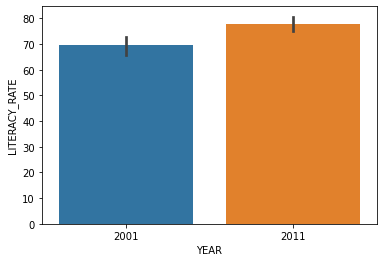

In [253]:
sns.barplot(x='YEAR',y='LITERACY_RATE',data=data)

- The above plot shows that average literacy rate for a state was approx.70 in 2001 while average literacy rate is seen as >75 in 2011.

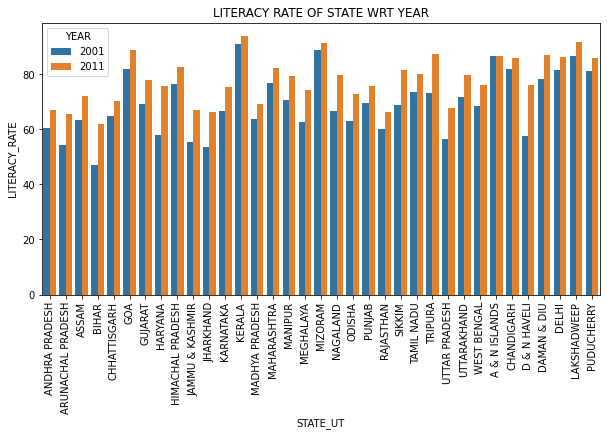

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='STATE_UT',y='LITERACY_RATE',hue='YEAR',data=data)
plt.title('LITERACY RATE OF STATE WRT YEAR')
plt.xticks(rotation=90)
plt.show()

- The highest literacy rate is seen in states/UT's like Kerala followed by Mizoram, lakshwadeep,Goa and Tripura.
- The lowest literacy rate is seen in Bihar, Jharkhand, AndhraPradesh & Arunachal pradesh

In [269]:
#saving required columns in features variable

features=['TOTAL IPC CRIMES', 'TOTAL SC CRIMES', 'TOTAL ST CRIMES',
       'TOTAL CHILDREN CRIMES', 'TOTAL  DRBT CRIMES', 'TOTAL WOMEN CRIMES']

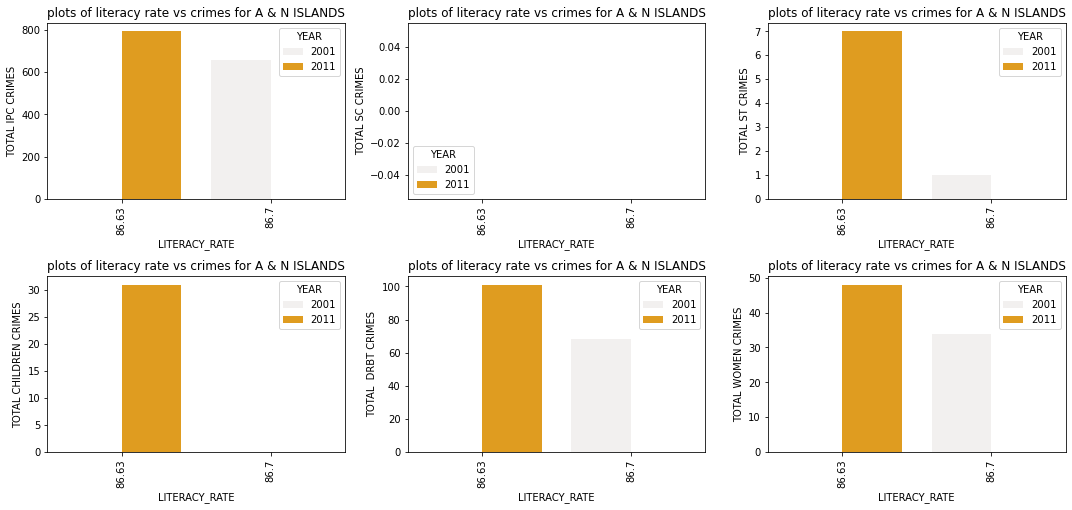

In [280]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='A & N ISLANDS'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for A & N ISLANDS')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Though there is not much of an increase in literacy rate in Andaman and Nicobar islands, the rate of crimes has gone down in 2011 compared to in 2001.
- No crimes on SC people reported in 2001 as well as in 2011.
- The no. of cases lowered in 2011 compared to 2001 incase of ST related crimes.
- Crimes related to children were found nil in 2011 compared to 30 cases in 2001.
- There have been less cases of Dacoity, Robbery, Burglary and Theft reported in 2011 compared to that in 2001. \
- Also crimes on women are there in 2011 but considerably low in 2001.

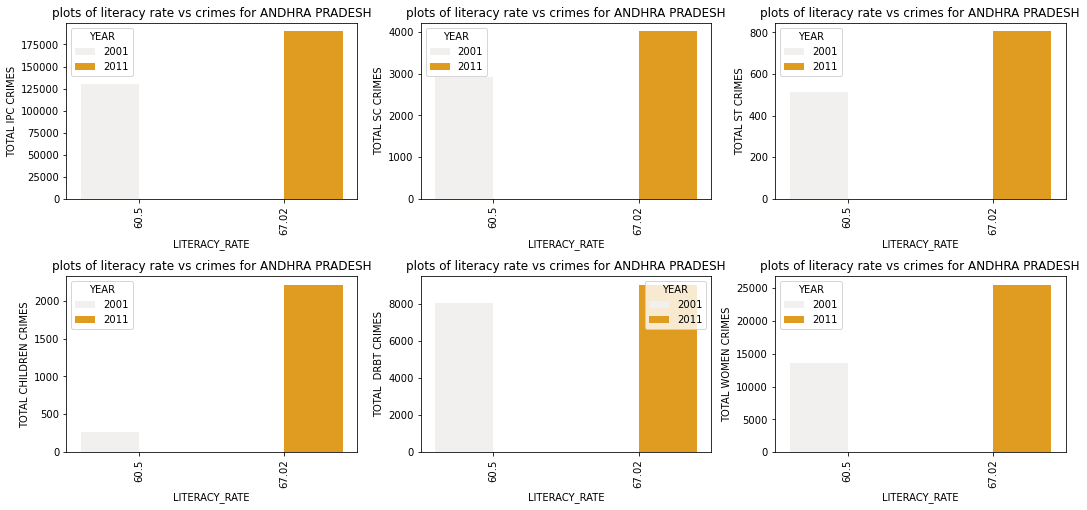

In [281]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='ANDHRA PRADESH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for ANDHRA PRADESH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- It can be seen from the above plots that crimes in Andhra Pradesh have seen  rise from 2001 to 2011 although their literacy rate is increased from 60.5 to 67.02.
- Crimes on ST, SC people have increased in 2011.
- Crimes related to children were <500 in 2001 which increased to >2000 in 2011.
- Crimes on women have also increased to almost double amount from 2001 even though the literacy rate is high in 2011.

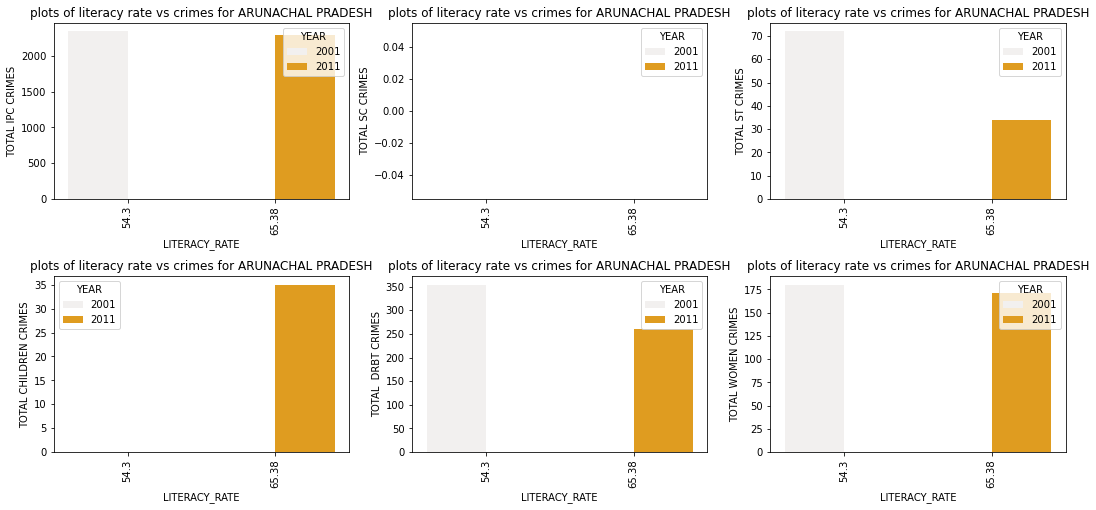

In [282]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='ARUNACHAL PRADESH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for ARUNACHAL PRADESH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- There is no change in total crimes committed in 2011 even though literacy rate is increasd from 54.3 in 2001 to 65.38 in 2011.
- Cases on ST people have increased in 2011 as compared to that in 2001.
- There were nil cases for crimes on children in 2001 as compared to >30 cases in 2011.
- Cases for DRBT have gone down in 2011 compared to cases registered in 2001.
- There has been no changes in women crimes with increase in literacy rate.

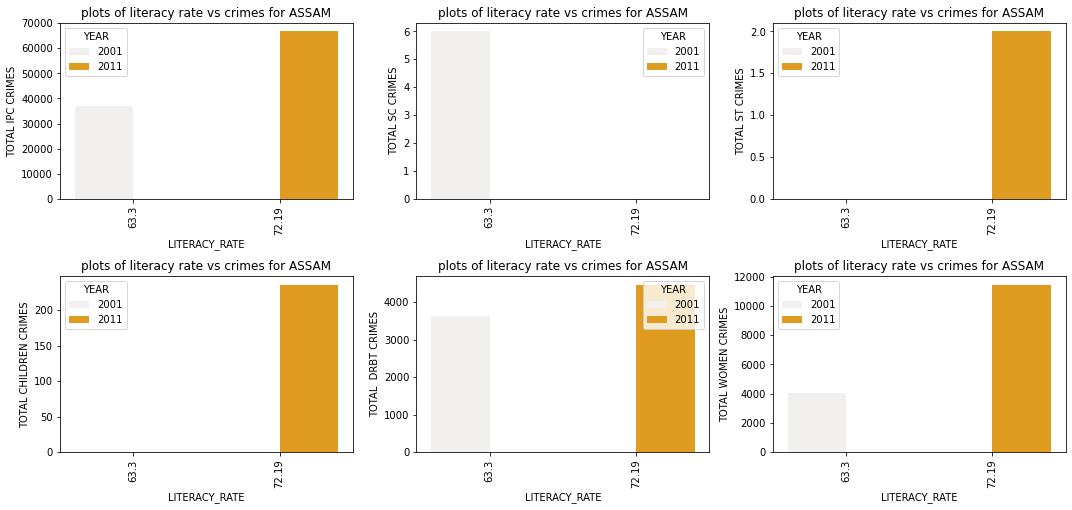

In [283]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='ASSAM'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for ASSAM')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Crime rate has increased with increase in literacy rate from 2001 to 2011.
- Crimes on SC were seen nil in 2011 while only 2 cases registerd for ST in 2011.
- Crimes on women and children have increased heavily in 2011 as compared to cases in 2001.
- DRBT cases have also increased in 2011.

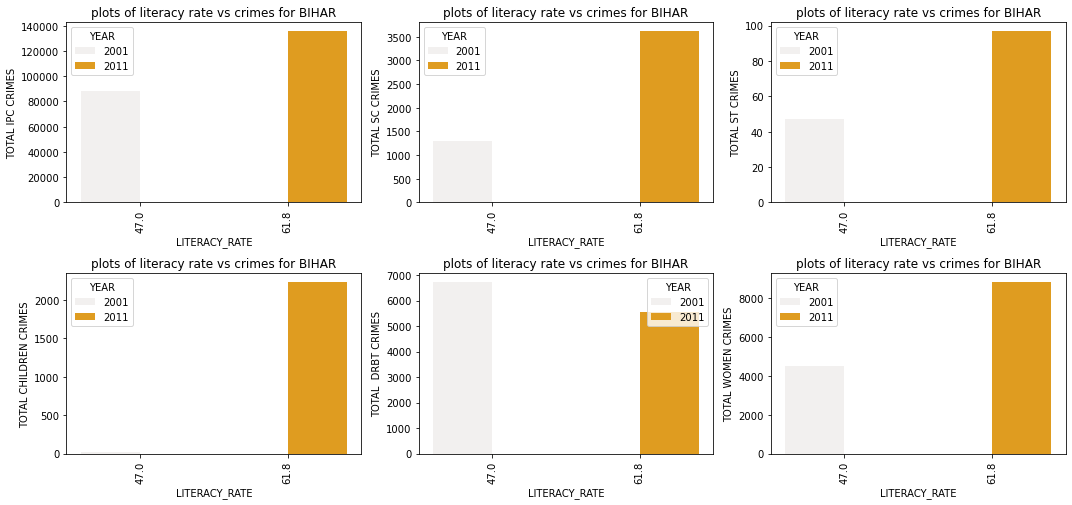

In [284]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='BIHAR'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for BIHAR')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Though the literacy rate increased in Bihar, the total crimes also increased in Bihar almost doubling the amount that were in 2001.
- Crimes on SC  people have increased tremendously in 2011 compared to 2001 while same scenario is seen with ST people.
- Crimes on women and children have increased in double amount in 2011 as compared to in 2001.
- DRBT cases have dropped in 2011 as compared to those in 2001.

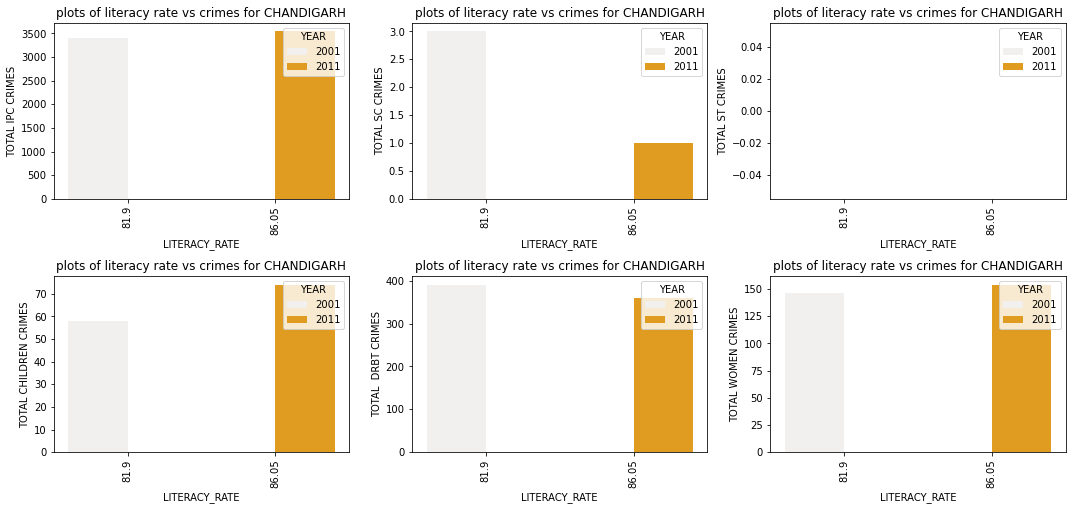

In [285]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='CHANDIGARH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for CHANDIGARH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Here in Chandigarh, almost similar number of total cases seen in 2001 and 2011 even though their literacy rate is increased.
- Crimes on women and children have alsi increased slightly in 2011 than in 2001.  

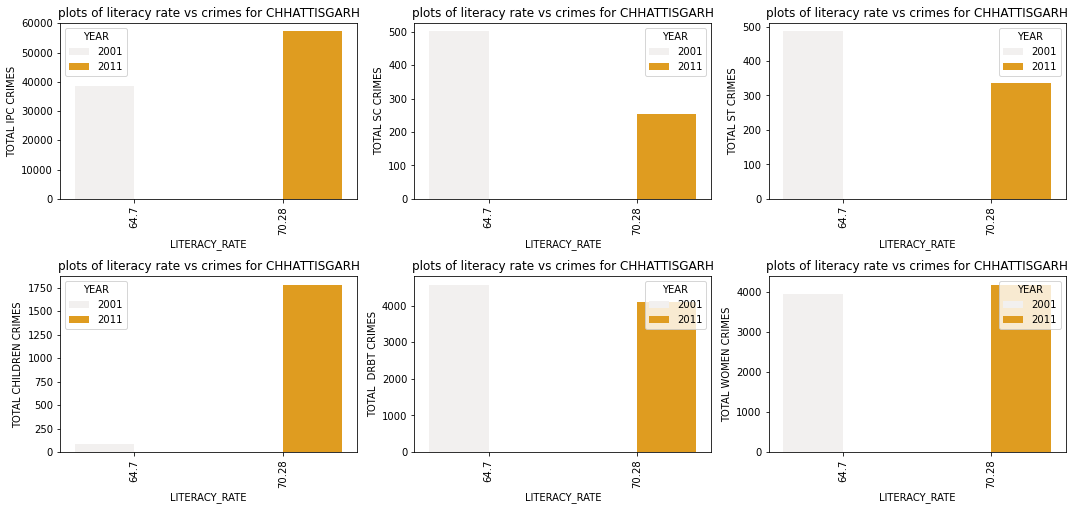

In [286]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='CHHATTISGARH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for CHHATTISGARH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Total Crimes in chattisgarh have increased in 2011 as compared to 2001.
- Crimes in ST and Sc people have gone down in 2011 as compared to 2001.
- Crimes against children have increased > 10 times in 2011 as compared to 2001.
- Crimes on women were more in 2001 but still that figure has increase in 2011.
- DRBT crimes have lowered in 2011 compared to 2001.

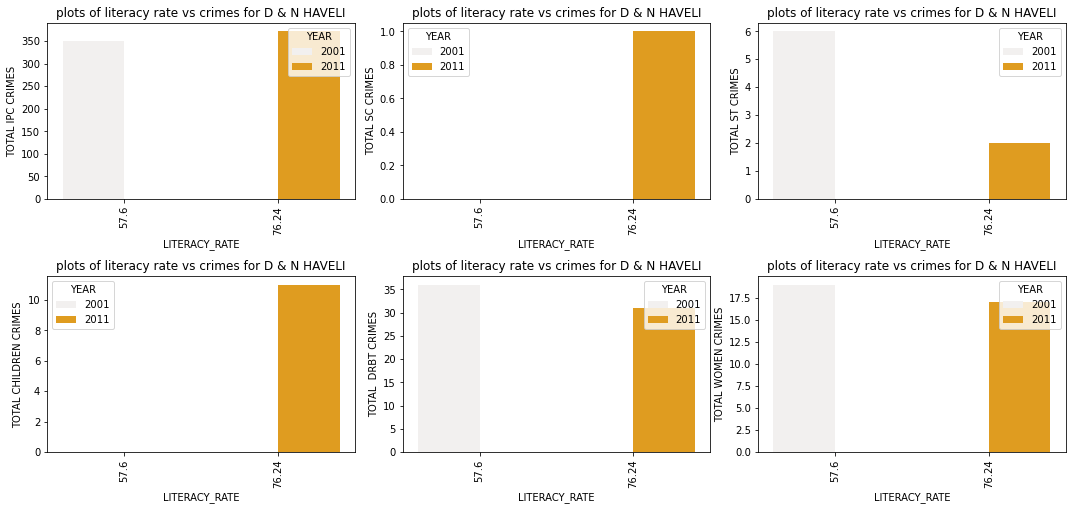

In [287]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='D & N HAVELI'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for D & N HAVELI')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- There has been not much of a difference in total cases registered in  2011 as compared to 2001 even though literacy rate has increased.
- Cases registered for children, women, Sc and St people are low.


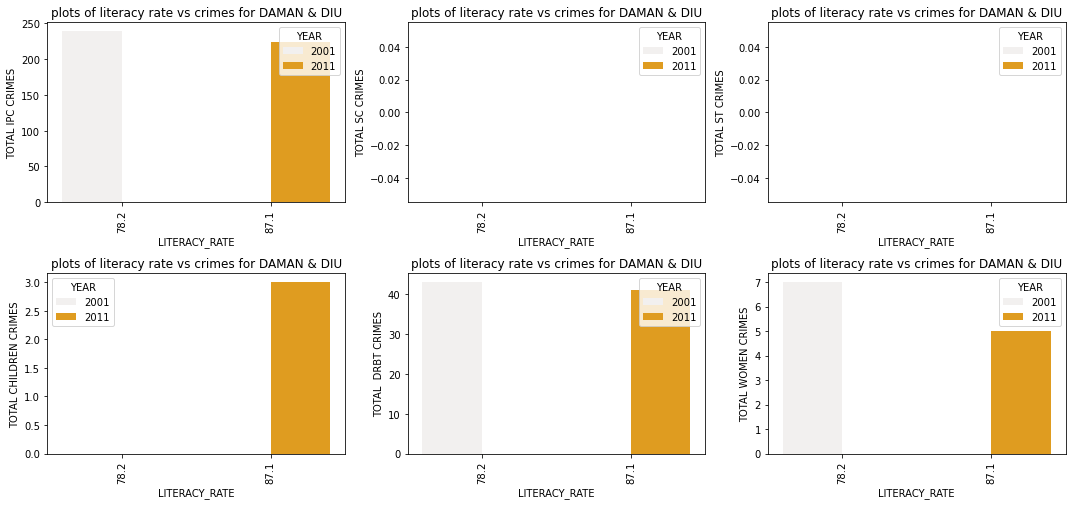

In [288]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='DAMAN & DIU'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for DAMAN & DIU')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- There is slight lower in cases in 2011 as compared to 2001 even though increase in literacy rate.
- Almost equal number of DRBT cases are seen with increase in literacy rate.

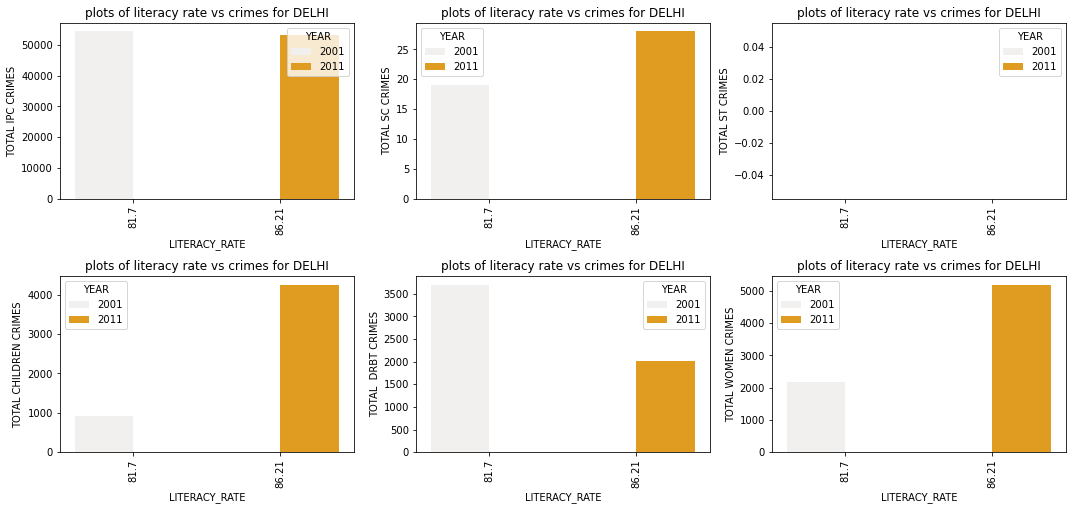

In [289]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='DELHI'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for DELHI')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Almost similar number of cases are registered in 2011 then 2001 even though there is increase in literacy rate.
- There is slight increase in ST crimes in 2011.
- As per plots, crimes on women and children have increased considerably in 2011 as compared to 2001.
- DRBT crimes have gone down in 2011 as compared to 2001.


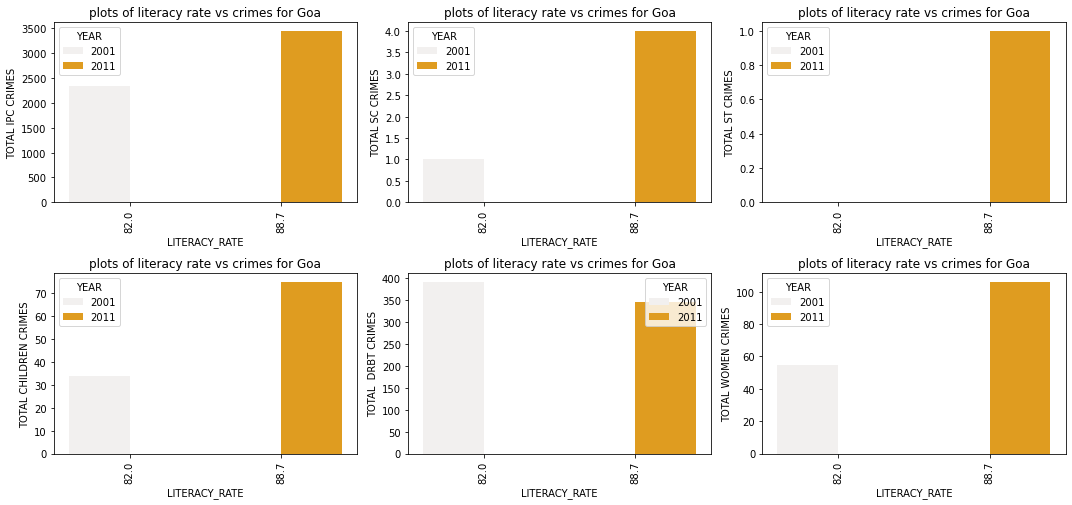

In [290]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='GOA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for Goa')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- There has been increase in total cases in 2011 as compared to 2001 even though literacy rate has increased in 2011.
- Crimes on women and children have increased in double fold in 2011 as compared to 2001.

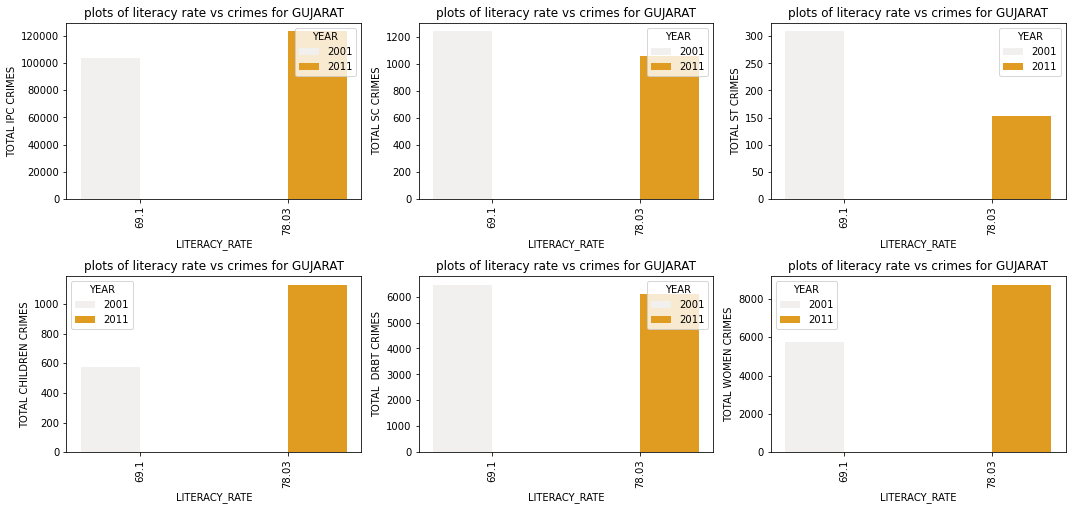

In [291]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='GUJARAT'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for GUJARAT')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- The total crimes have increased in 2011 compared to 2001 with increase in literacy rate.
- Crimes on ST, SC and DRBT crimes have gone down in 2011 as compared to 2001.
- Crimes on children and women have increased in 2011 as compared to 2001 even though there is increase in literacy rate.


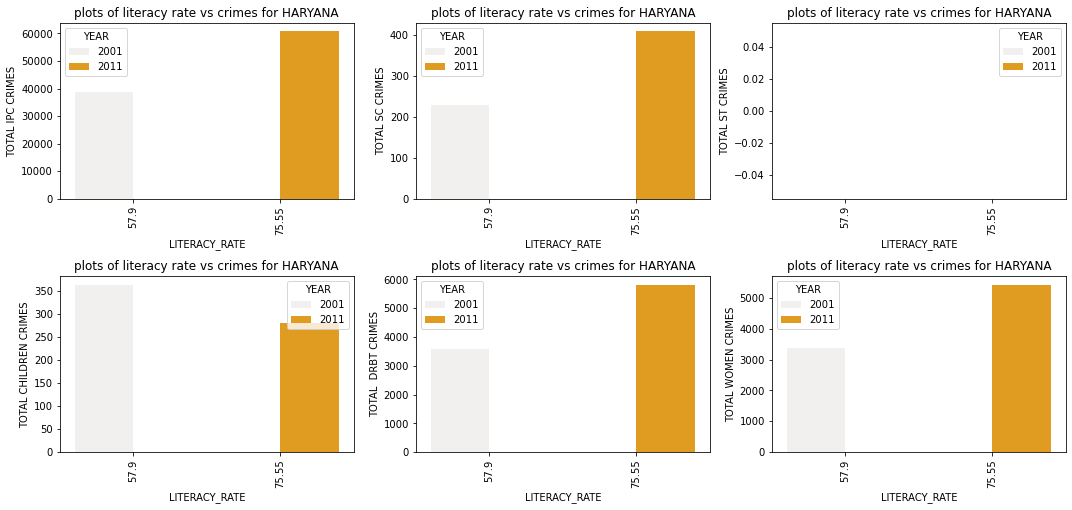

In [292]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='HARYANA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for HARYANA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Total IPC crimes have increased with increase in literacy rate in 2011 as compared to 2001.
- Crimes on SC and women have increased with decrased children crimes  in 2011 as compared to 2001.
- DRBT crime have increased in 2011 as compared to 2001.

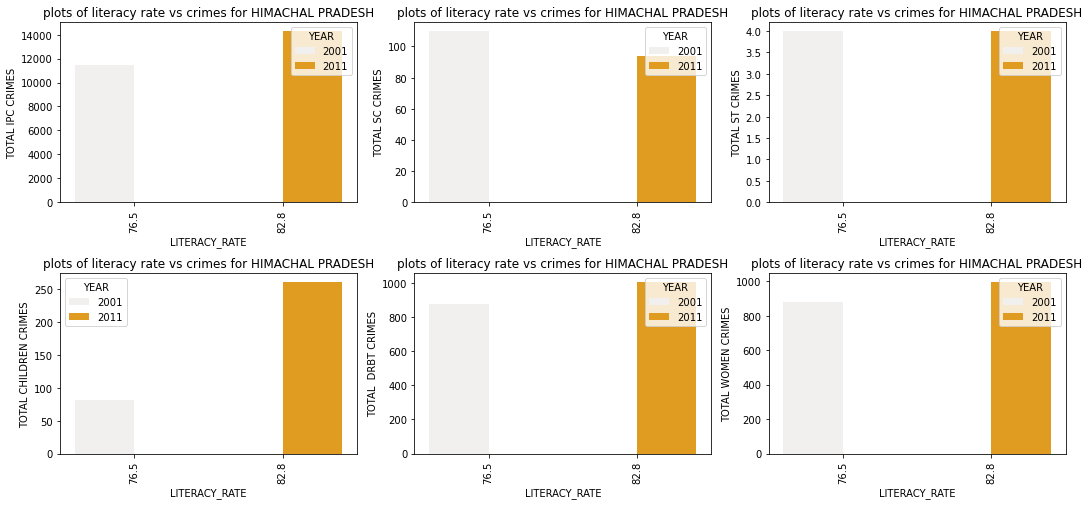

In [293]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='HIMACHAL PRADESH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for HIMACHAL PRADESH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate the crimes have alsi increased in 2011 as compared to 2001.
- Crimes on children and women have increased in 2011 as compared to 2001.

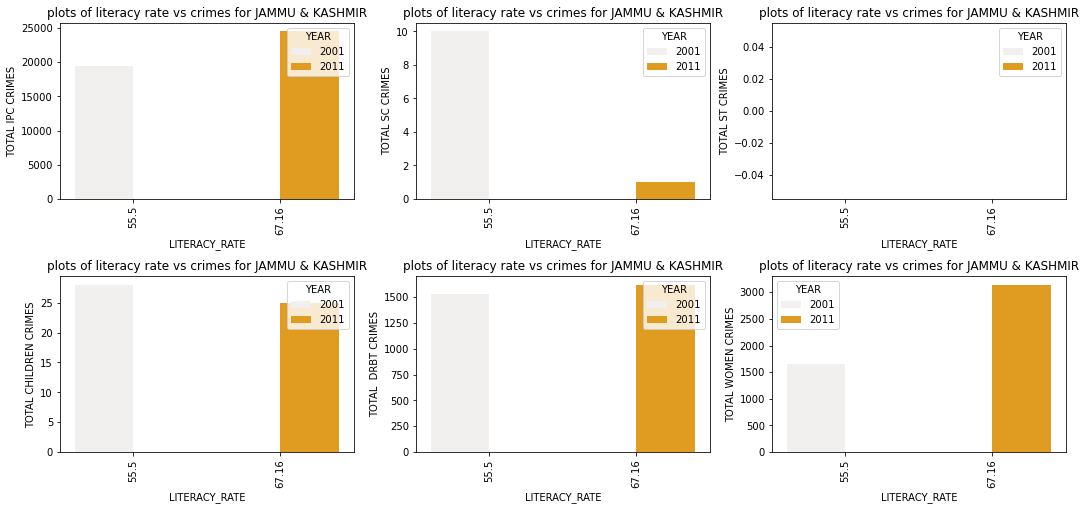

In [294]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='JAMMU & KASHMIR'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for JAMMU & KASHMIR')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Total crimes have increased with increased literacy rate.
- Crimes on women have increased tremendously in 2011 as compared to 2001.
- There is no chnage in DRBT crimes in 2011 as compared to 2001. 

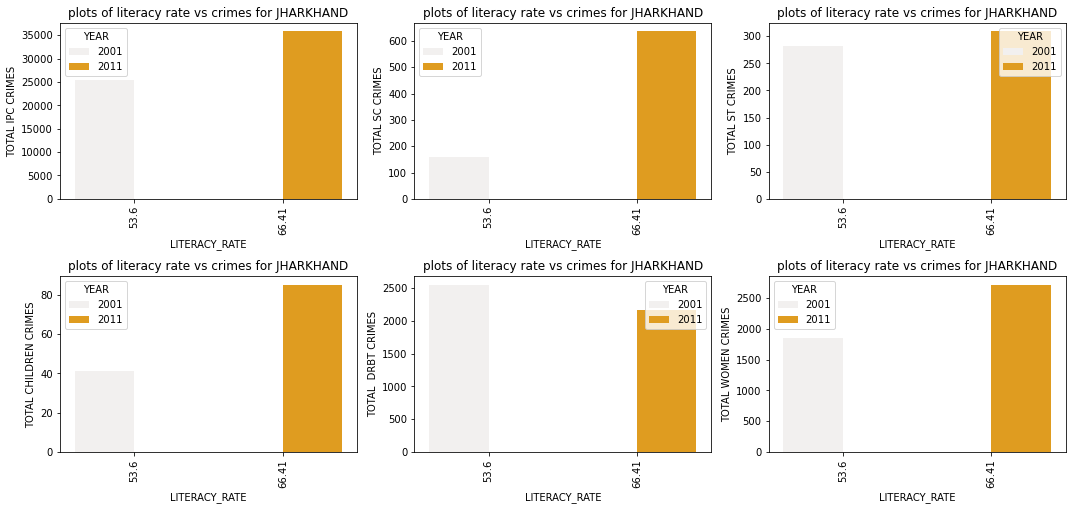

In [295]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='JHARKHAND'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for JHARKHAND')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total cases in 2011 as compared to 2001.
- There is increased SC and ST cases in 2011 as compared to 2001.
- Crimes in women and children have also increased with decrease in DRBT crimes in 2011 as compared to 2001.

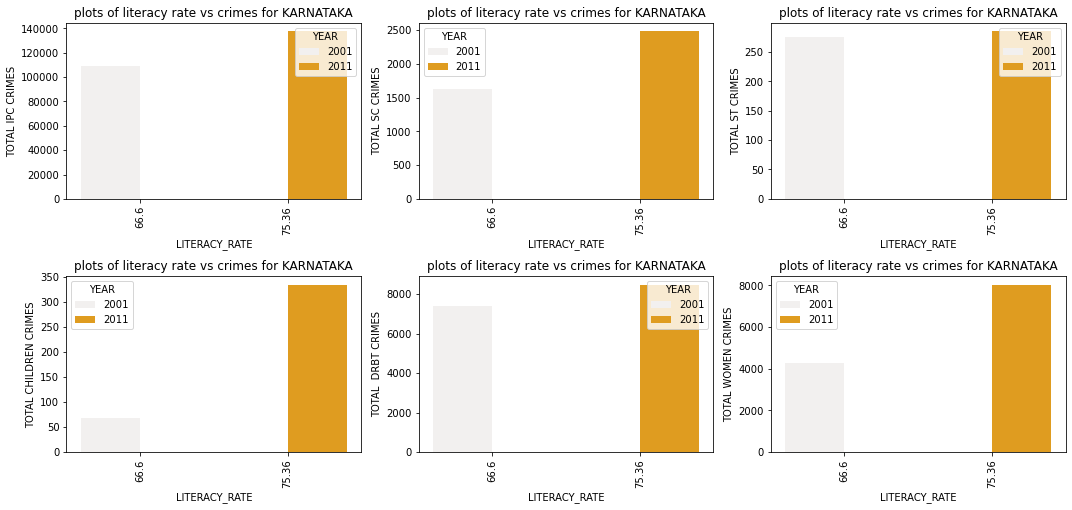

In [296]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='KARNATAKA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for KARNATAKA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- There is increase in total IPC crimes with increase in literacy rate.
- Also increase in SC crimes is seen in 2011.
- Children and women crimes have increased in 2011 as compared to 2001.


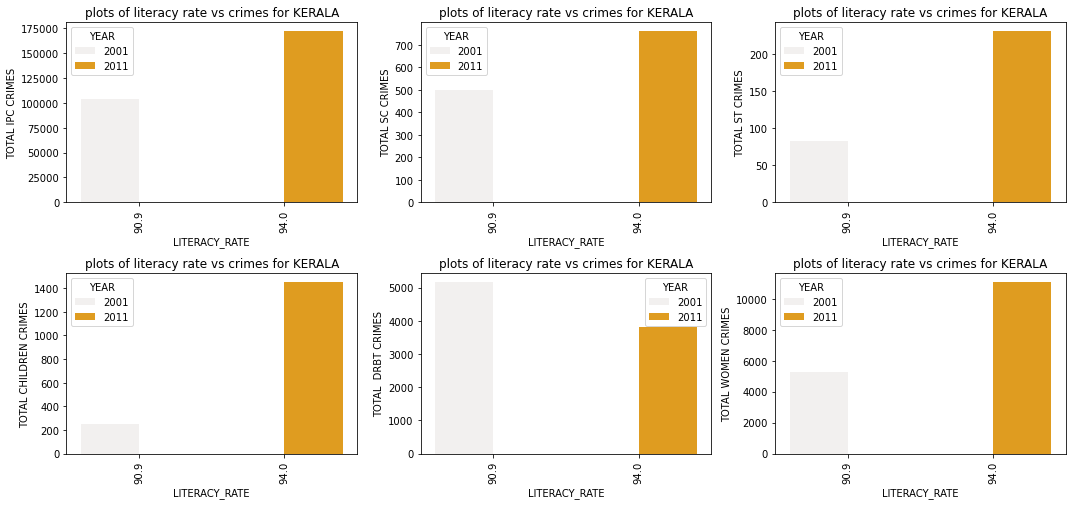

In [297]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='KERALA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for KERALA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate high rate of IPC crimes seen in 2011 as compared to 2001.
- Same scenario is seen with SC and ST crimes.
-Crimes on women and children have incresed in 2011 as compared to 2001.
= DRBT crimes lowered in 2011 as compared to 2001.

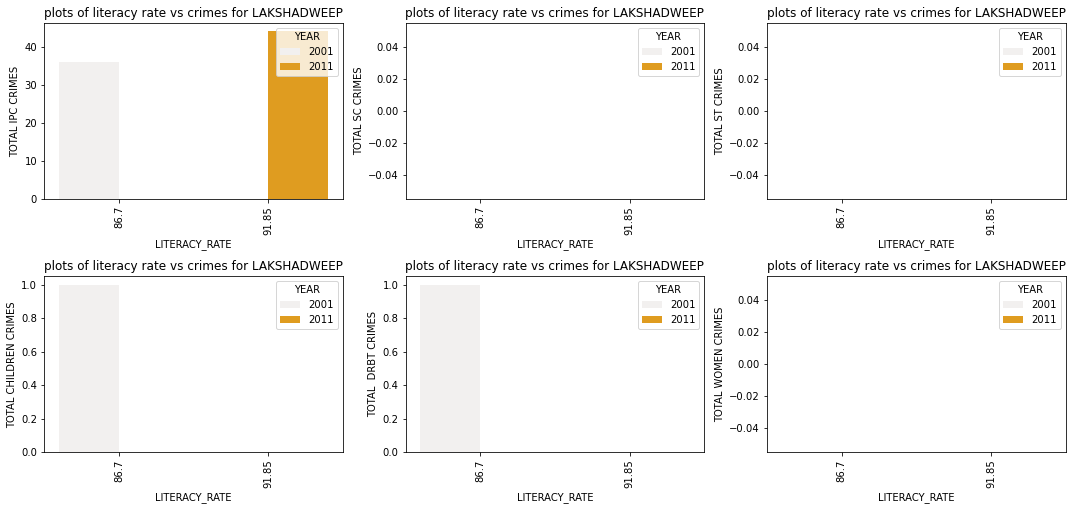

In [298]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='LAKSHADWEEP'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for LAKSHADWEEP')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- Though literacy rate has increased Total IPC crimes have also increased in 2011 as compared to 2001 but total crimes reported are less than 50.

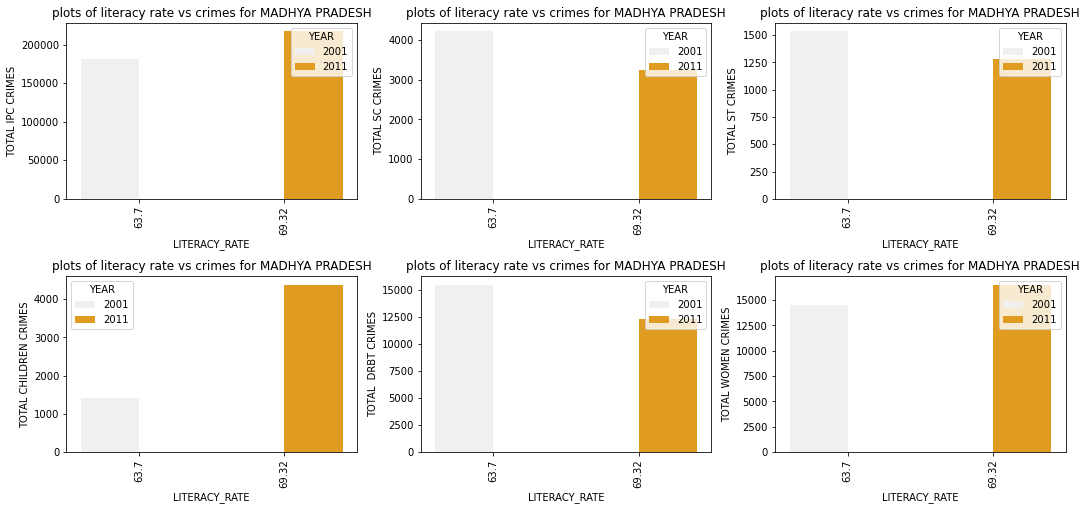

In [299]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='MADHYA PRADESH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for MADHYA PRADESH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With slight increse in literacy rate there is increase in total crimes in 2011 as compared to 2001.
- Crimes against SC and ST are lowered as well as in DRBT cases in 2011 as compared to 2001.
- Crimes against children and women are also increased in 2011 as compared to 2001.

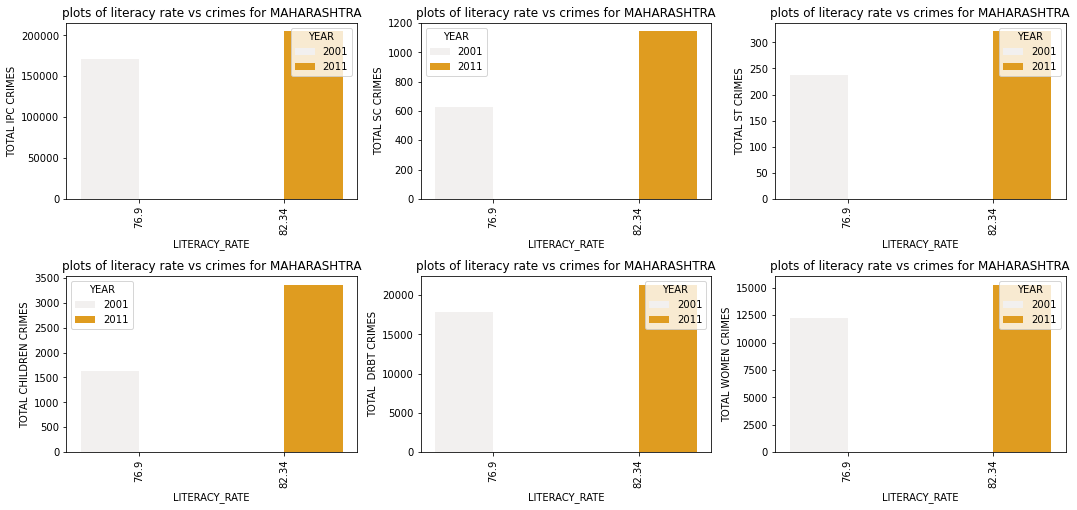

In [300]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='MAHARASHTRA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for MAHARASHTRA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- Also there is increase in SC and ST related crime cases in 2011 as compared to 2001.
- Cases related to children and women also increased in 2011 as compared to 2001.

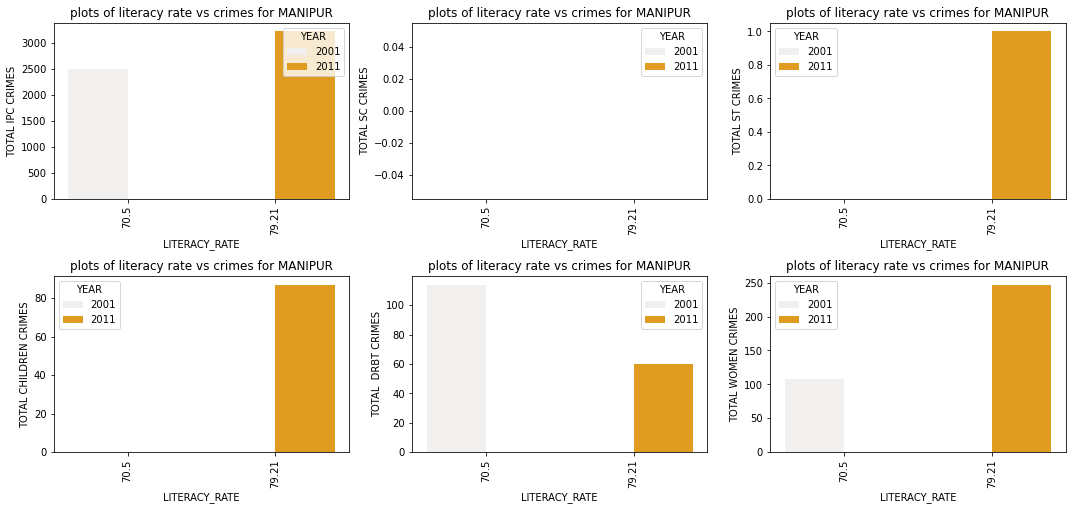

In [301]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='MANIPUR'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for MANIPUR')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- Also there is increase in ST related crime cases in 2011 as compared to 2001.
- Cases related to children and women also increased in 2011 as compared to 2001.
- DRBT crimes have gone down in 2011 compared to in 2001.

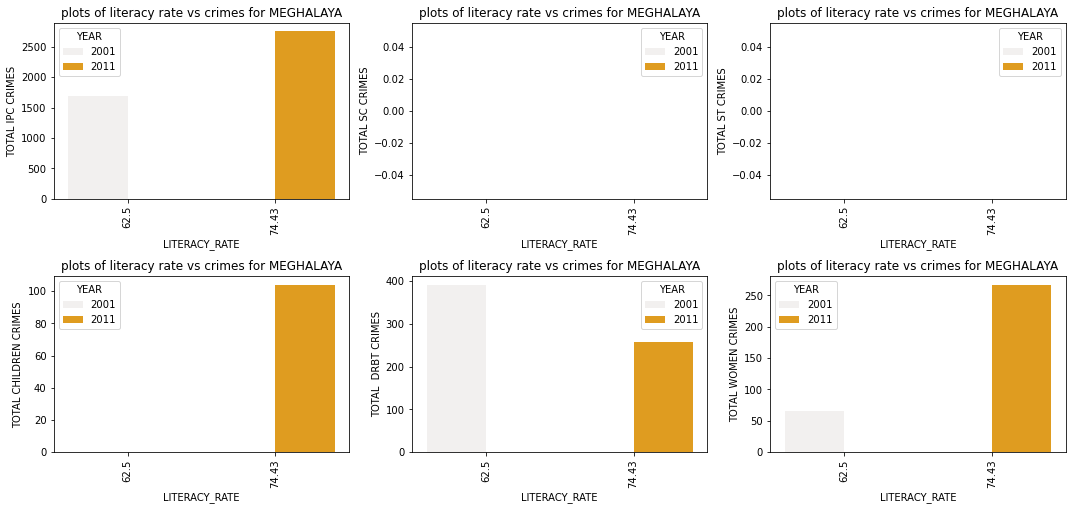

In [302]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='MEGHALAYA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for MEGHALAYA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
-Cases related to children and women also increased in 2011 as compared to 2001.
- DRBT crimes have gone down in 2011 compared to in 2001.

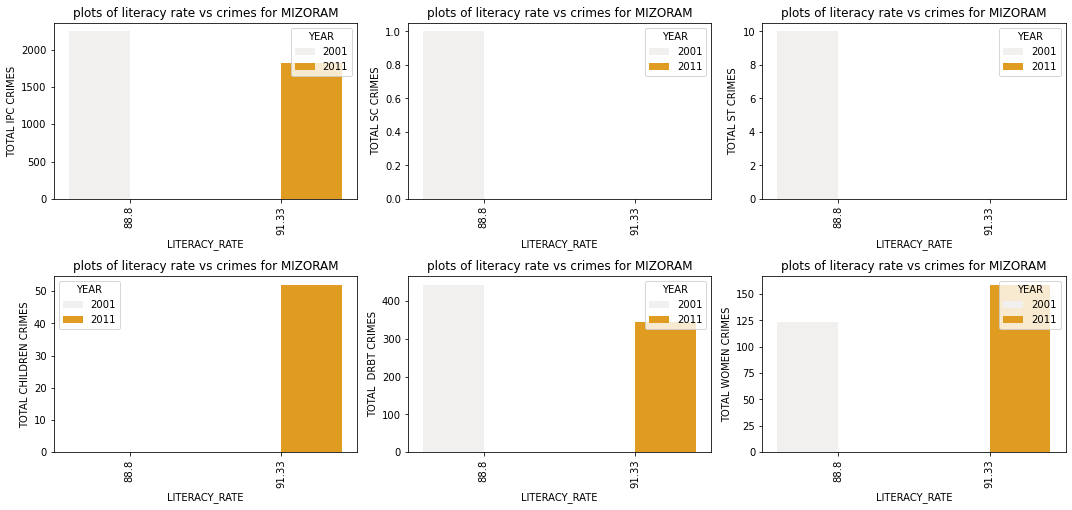

In [303]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='MIZORAM'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for MIZORAM')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- total cases have gone down in 2011 as compared to 2001 with increasing literacy rate.
- Cases related to children and women also increased in 2011 as compared to 2001.
- DRBT crimes have gone down in 2011 compared to in 2001.

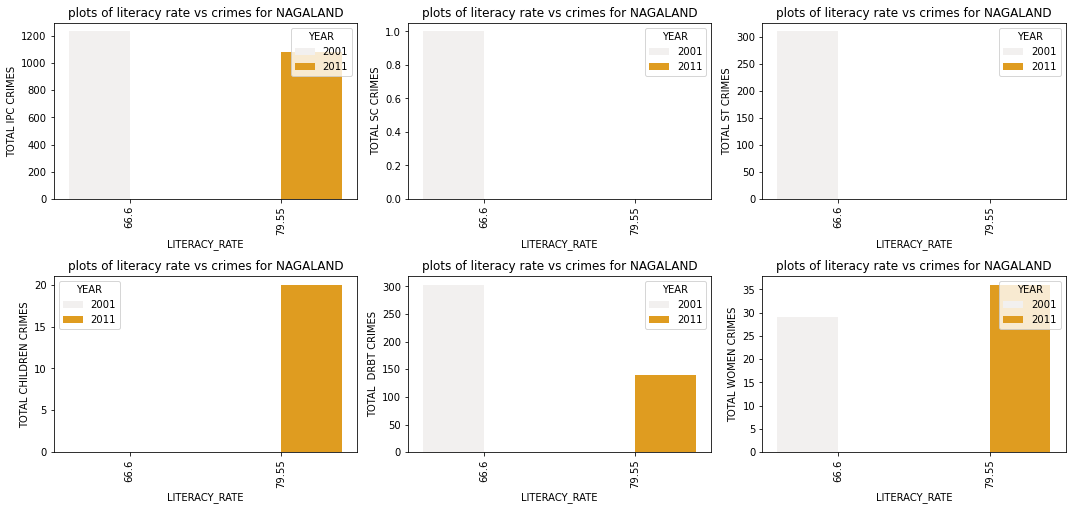

In [304]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='NAGALAND'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for NAGALAND')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- total cases have gone down in 2011 as compared to 2001 with increasing literacy rate.
-Cases related to children and women have increased in 2011 as compared to 2001.
-DRBT crimes have gone down in 2011 compared to in 2001.
- Crimes against ST have gone down tremendously in 2011 as compared to 2001.

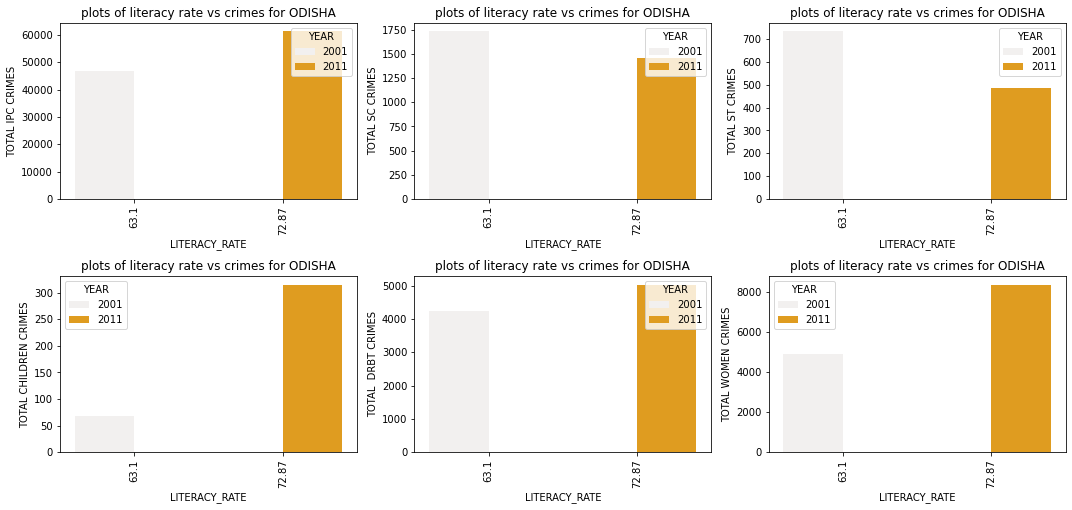

In [305]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='ODISHA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for ODISHA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against ST and SC have gone down compared to 2001 in 2011.
- The crimes against children and women have increased in 2011 as compared to 2001.

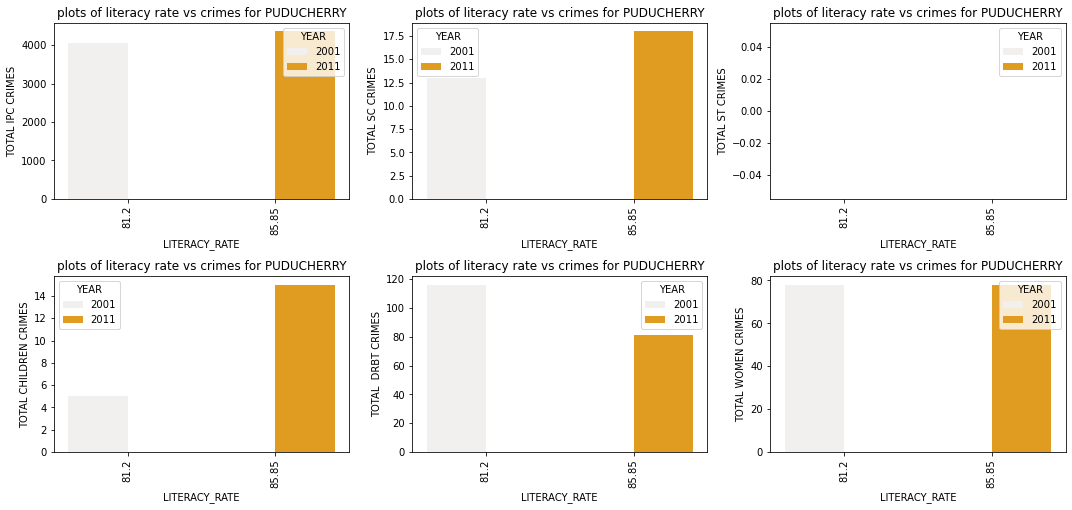

In [306]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='PUDUCHERRY'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for PUDUCHERRY')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against SC have increased compared to 2001 in 2011.
- The crimes against children  have increased in 2011 as compared to 2001 while the crimes against women are almost same.
- The DRBT crime rate has decreased considerably.

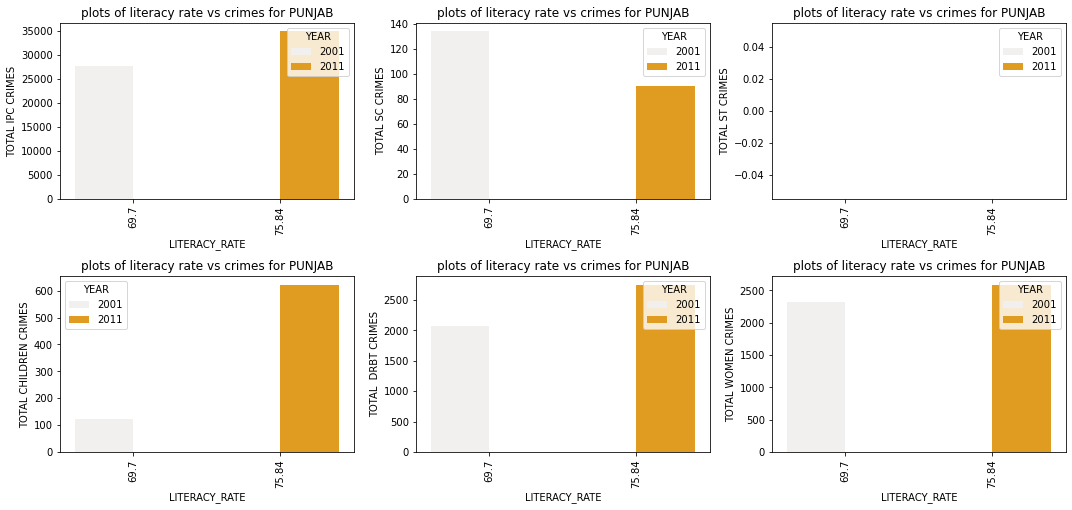

In [307]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='PUNJAB'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for PUNJAB')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against  SC have gone down compared to 2001 in 2011 with increasing literacy rate.
- The crimes against children and women have increased in 2011 as compared to 2001.

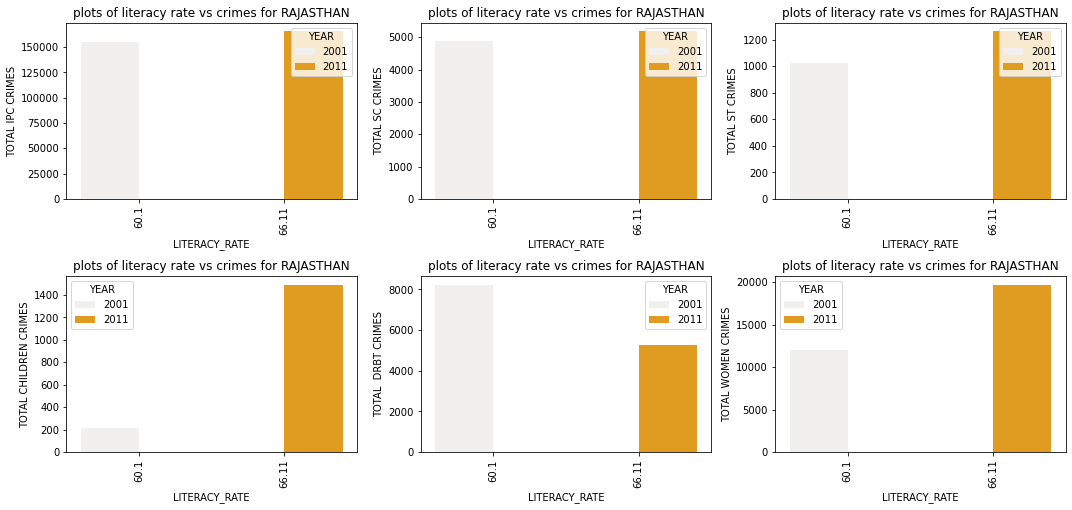

In [308]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='RAJASTHAN'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for RAJASTHAN')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase or similar cases seen  in 2011 as compared to 2001.
The crimes against  SC have increased while crimes against ST remained almost same compared to 2001 in 2011
The crimes against children and women have increased in 2011 as compared to 2001.


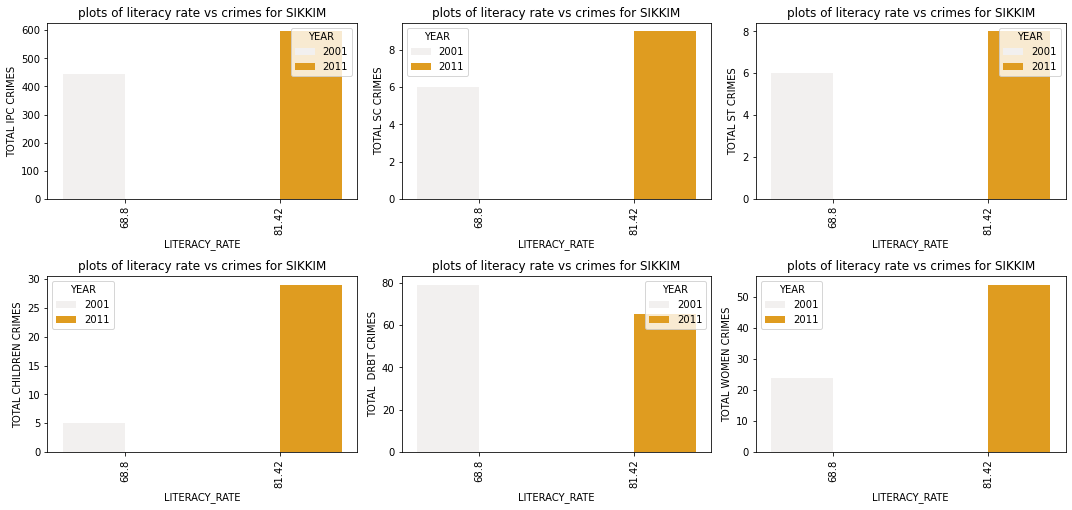

In [309]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='SIKKIM'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for SIKKIM')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against ST and SC have increased compared to 2001 in 2011.
- The crimes against children and women have increased in 2011 as compared to 2001.

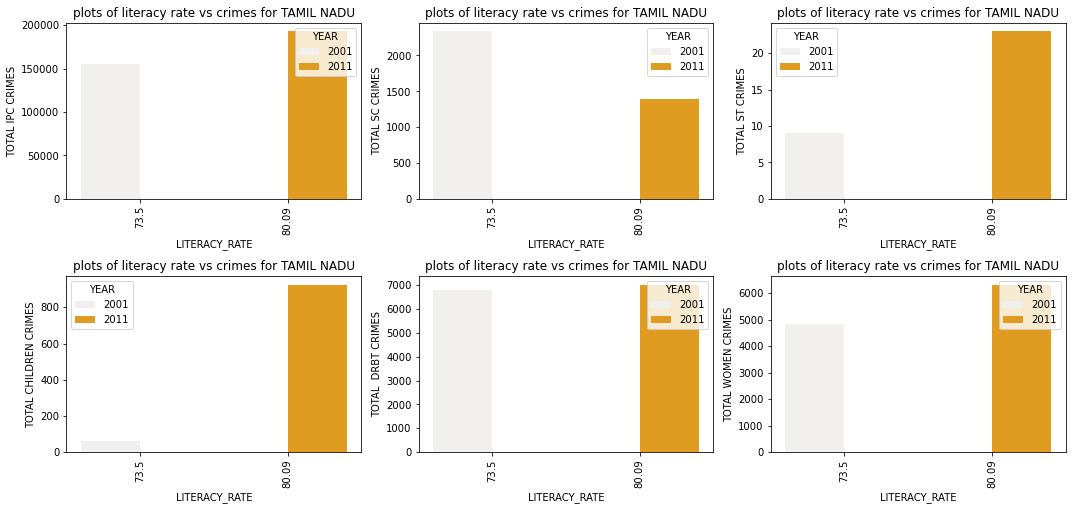

In [310]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='TAMIL NADU'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for TAMIL NADU')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against Sc decresed while crimes against St increased compared to 2001 in 2011.
- The crimes against children and women have increased  with DRBT crimes remains same in 2011 as compared to 2001.

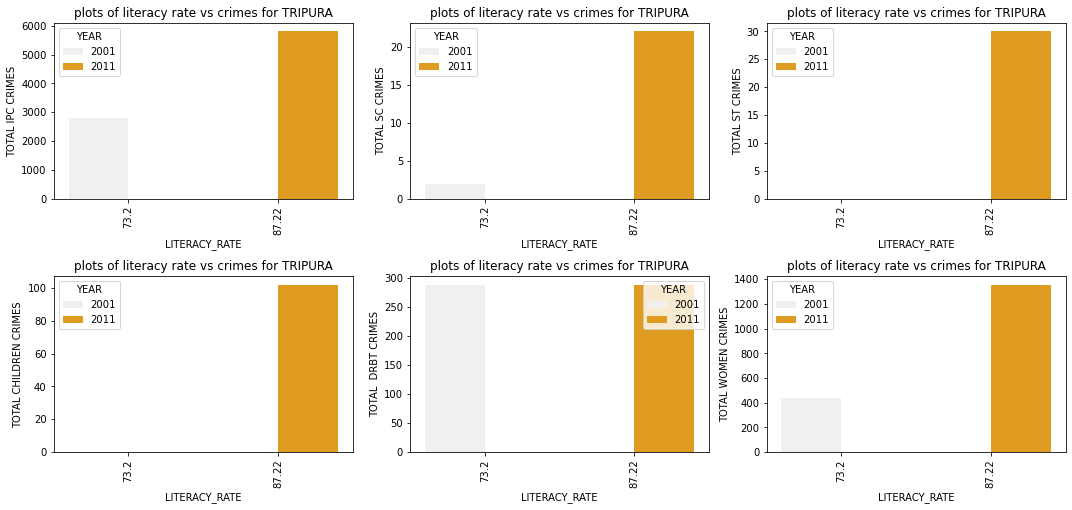

In [311]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='TRIPURA'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for TRIPURA')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
The crimes against ST and SC have increased compared to 2001 in 2011.
The crimes against children and women have increased while that agaist DRBT decreased in 2011 as compared to 2001.

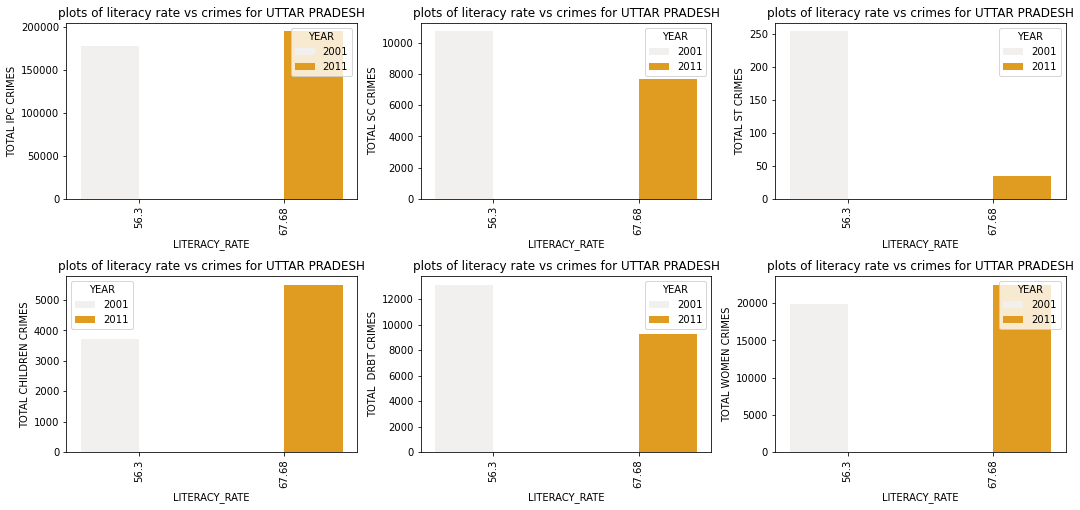

In [312]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='UTTAR PRADESH'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for UTTAR PRADESH')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against ST and SC have gone down compared to 2001 in 2011.
The crimes against children and women have increased in 2011 as compared to 2001.
- The DRBT crimes have decreased in 2011 compraed to  2001.

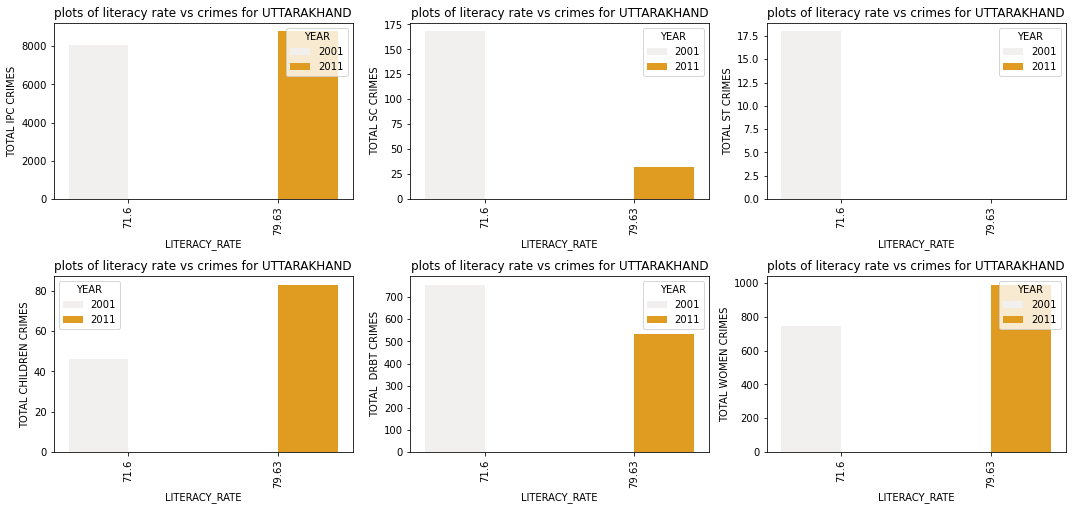

In [313]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='UTTARAKHAND'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for UTTARAKHAND')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against ST and SC have gone down compared to 2001 in 2011.
The crimes against children and women have increased in 2011 as compared to 2001.

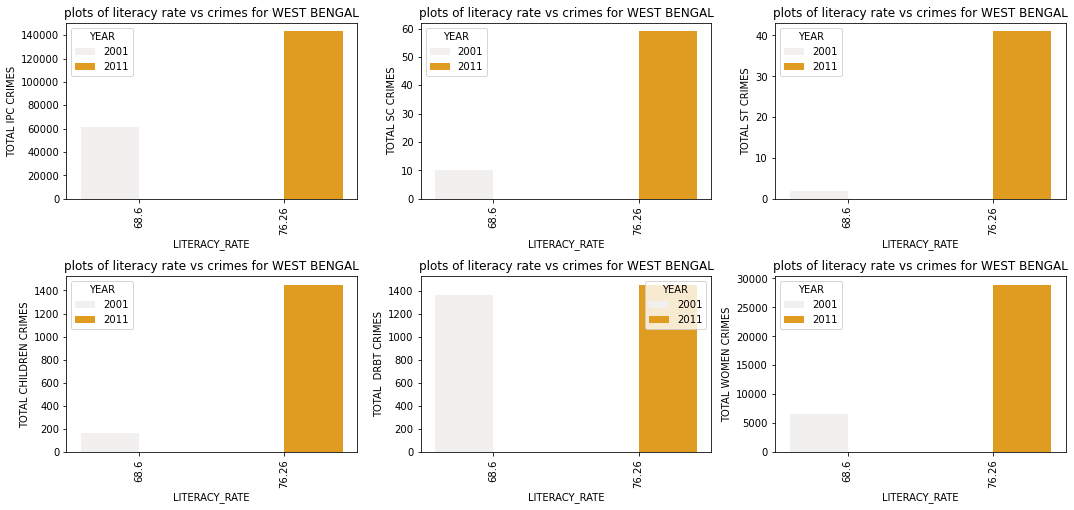

In [314]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=data[data['STATE_UT']=='WEST BENGAL'],hue='YEAR',color='orange')
        plt.title('plots of literacy rate vs crimes for WEST BENGAL')
        plt.xticks(rotation=90)
    plotnumber+=1   
plt.tight_layout()

- With increase in literacy rate there is increase in total crime cases in 2011 as compared to 2001.
- The crimes against ST and SC have gone down compared to 2001 in 2011.
- The crimes against children and women have increased in 2011 as compared to 2001.


# 2.2	 Analysis of the type of crime vs each state vs Literacy rate.

Notes before proceeding:
- I have taken csv file named '01_District_wise_crimes_committed_IPC_2001_2012' provided to us for analysis purpose as this files contains all the data and numbers of ipc crimes committed.For ex. this file contains data on murder, rape, crimes against women, kidnapping and abductions,thefts and many more. The other sheets that are provided to us are the detailed version of this sheet wrt to ST-SC people, women, children, juviniles,etc.
- As mentioned earlier, some sheets will be not used as they have data upto 2010 and I require 2011 data to analyse.
- I have created a seperate excel file with crimes that I think needs to be analysed and have created a excel file with those columns for analysis purpose.The reasons for dropping those columns are as follows:
  - Since very low data is available for those columns and most states have 0 data, following columns I have dropped from analysis such as importation of girls from foreign countries, counterfieting, preparation and assembly for dacoity, custodial rape.
  - Four other columns have been dropped. the reasons are:
     Other rape column and rape column has data hence other rape is dropped.
     kidnapping and abductiom column of others is dropped as I intent to keep kidnapping of women and total kidnappings      column.
     Other thefts and thefts columns along with burlary are dropped as thefts are similarly related to robbery, hence I have kept robbery.
- All the other columns are kept from ipc crimes sheet.
- Also children and juvinile data is less and mostly contains null and/or no data hence those sheets with data not being used for analysis.


In [2]:
# we are going to use same data file as used in above question
data1=pd.read_excel('updated census file.xlsx')
data1.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY
0     ANDHRA PRADESH  2001    76210007           60.5  275045          277
1  ARUNACHAL PRADESH  2001     1097968           54.3   83743           13
2              ASSAM  2001    26655528           63.3   78438          340
3              BIHAR  2001    82998509           47.0   94163          881
4       CHHATTISGARH  2001    20833803           64.7  135191          154

In [3]:
data3=pd.read_excel('crimes.xlsx')
data3.head()

MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  \
0    2602               1555   871                    1182   
1      83                 53    33                      83   
2    1356                481   817                    1480   
3    3643               3419   888                    2159   
4     880                529   959                     207   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  DACOITY  ROBBERY  AUTO THEFT  \
0                                          765      214      629        3051   
1                                           55       22       84          36   
2                                         1070      532      687         350   
3                                          518     1291     2203        1050   
4                                          171       87      338         920   

   RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
0   3001                       788      5391    872               34947   
1     24                        41        30     13                 466   
2   2953                       374       575    441                5805   
3   8606                       946      1659    502                7544   
4    871                       154       402    215                5477   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0           420                                               3544     
1             0                                                 78     
2            59                                                850     
3           859                                                562     
4            70                                               1763     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
0                         7400             34344  
1                            0               618  
2                         2010              9315  
3                         2406             36667  
4                          689             15790

In [4]:
# concating both dataframes for analysis
df=pd.concat([data1,data3],axis=1)
df.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
0     ANDHRA PRADESH  2001    76210007           60.5  275045          277   
1  ARUNACHAL PRADESH  2001     1097968           54.3   83743           13   
2              ASSAM  2001    26655528           63.3   78438          340   
3              BIHAR  2001    82998509           47.0   94163          881   
4       CHHATTISGARH  2001    20833803           64.7  135191          154   

   MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
0    2602               1555   871                    1182  ...   
1      83                 53    33                      83  ...   
2    1356                481   817                    1480  ...   
3    3643               3419   888                    2159  ...   
4     880                529   959                     207  ...   

   CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
0                       788      5391    872               34947   
1                        41        30     13                 466   
2                       374       575    441                5805   
3                       946      1659    502                7544   
4                       154       402    215                5477   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0           420                                               3544     
1             0                                                 78     
2            59                                                850     
3           859                                                562     
4            70                                               1763     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
0                         7400             34344  
1                            0               618  
2                         2010              9315  
3                         2406             36667  
4                          689             15790  

[5 rows x 25 columns]

In [5]:
df.shape

(70, 25)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE_UT                                             70 non-null     object 
 1   YEAR                                                 70 non-null     int64  
 2   POPULATION                                           70 non-null     int64  
 3   LITERACY_RATE                                        70 non-null     float64
 4   AREA                                                 70 non-null     int64  
 5   POP_DENSITY                                          70 non-null     int64  
 6   MURDER                                               70 non-null     int64  
 7   ATTEMPT TO MURDER                                    70 non-null     int64  
 8   RAPE                                                 70 non-null     int

In [8]:
df.columns

Index(['STATE_UT', 'YEAR', 'POPULATION', 'LITERACY_RATE', 'AREA',
       'POP_DENSITY', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'DACOITY', 'ROBBERY', 'AUTO THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'],
      dtype='object')

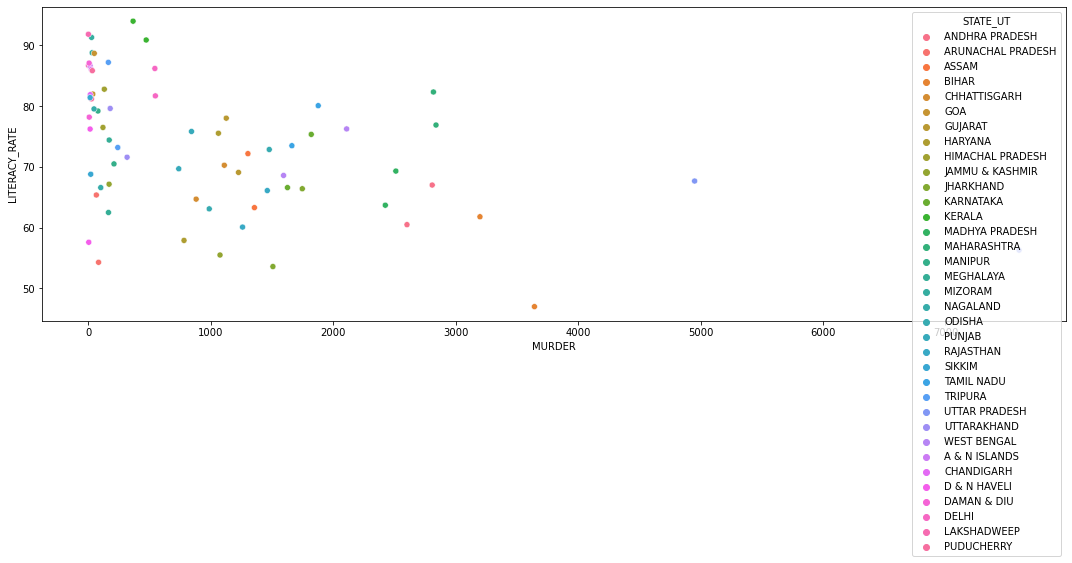

In [7]:
#plotting relationship of MURDER as per to literacy rate in each state

plt.figure(figsize=(15,7))
sns.scatterplot(x='MURDER',y='LITERACY_RATE',data=df,hue='STATE_UT')
plt.tight_layout()

- As per above plot it can be seen that it is very difficult to identify which states has higher/lower murder rate with respect to literacy rate and state. 
- Hence I will be making seperate dataframe that will contain data of each of particular state. Hence it will be better to identify their relationship with all kinds of crimes listed in above dataframe.
- Also with seperate dataframe I can also get a relationship of crimes with respect to increasing years. 

-- Following are the seperate dataframes created as per states name and below plots are plotted with respect to different crimes mentioned.
- **PLease note that I will not be writing any observations for 1st 6 columns i.e from STATE_UT to pop_density columns.**

# Following plots are of state vs literacy rate vs types of crimes

**ANDHRA PRADESH**

In [8]:
andhra=df[df['STATE_UT']=='ANDHRA PRADESH']
andhra.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
0   ANDHRA PRADESH  2001    76210007          60.50  275045          277   
35  ANDHRA PRADESH  2011    84580777          67.02  275045          308   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
0     2602               1555   871                    1182  ...   
35    2808               2229  1442                    2154  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
0                        788      5391    872               34947   
35                      1174      9748   1021               54452   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0            420                                               3544     
35           599                                               4849     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                         2271                                 5791   
35                        3658                                13376   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
0                          7400             34344  
35                        13973             38392  

[2 rows x 25 columns]

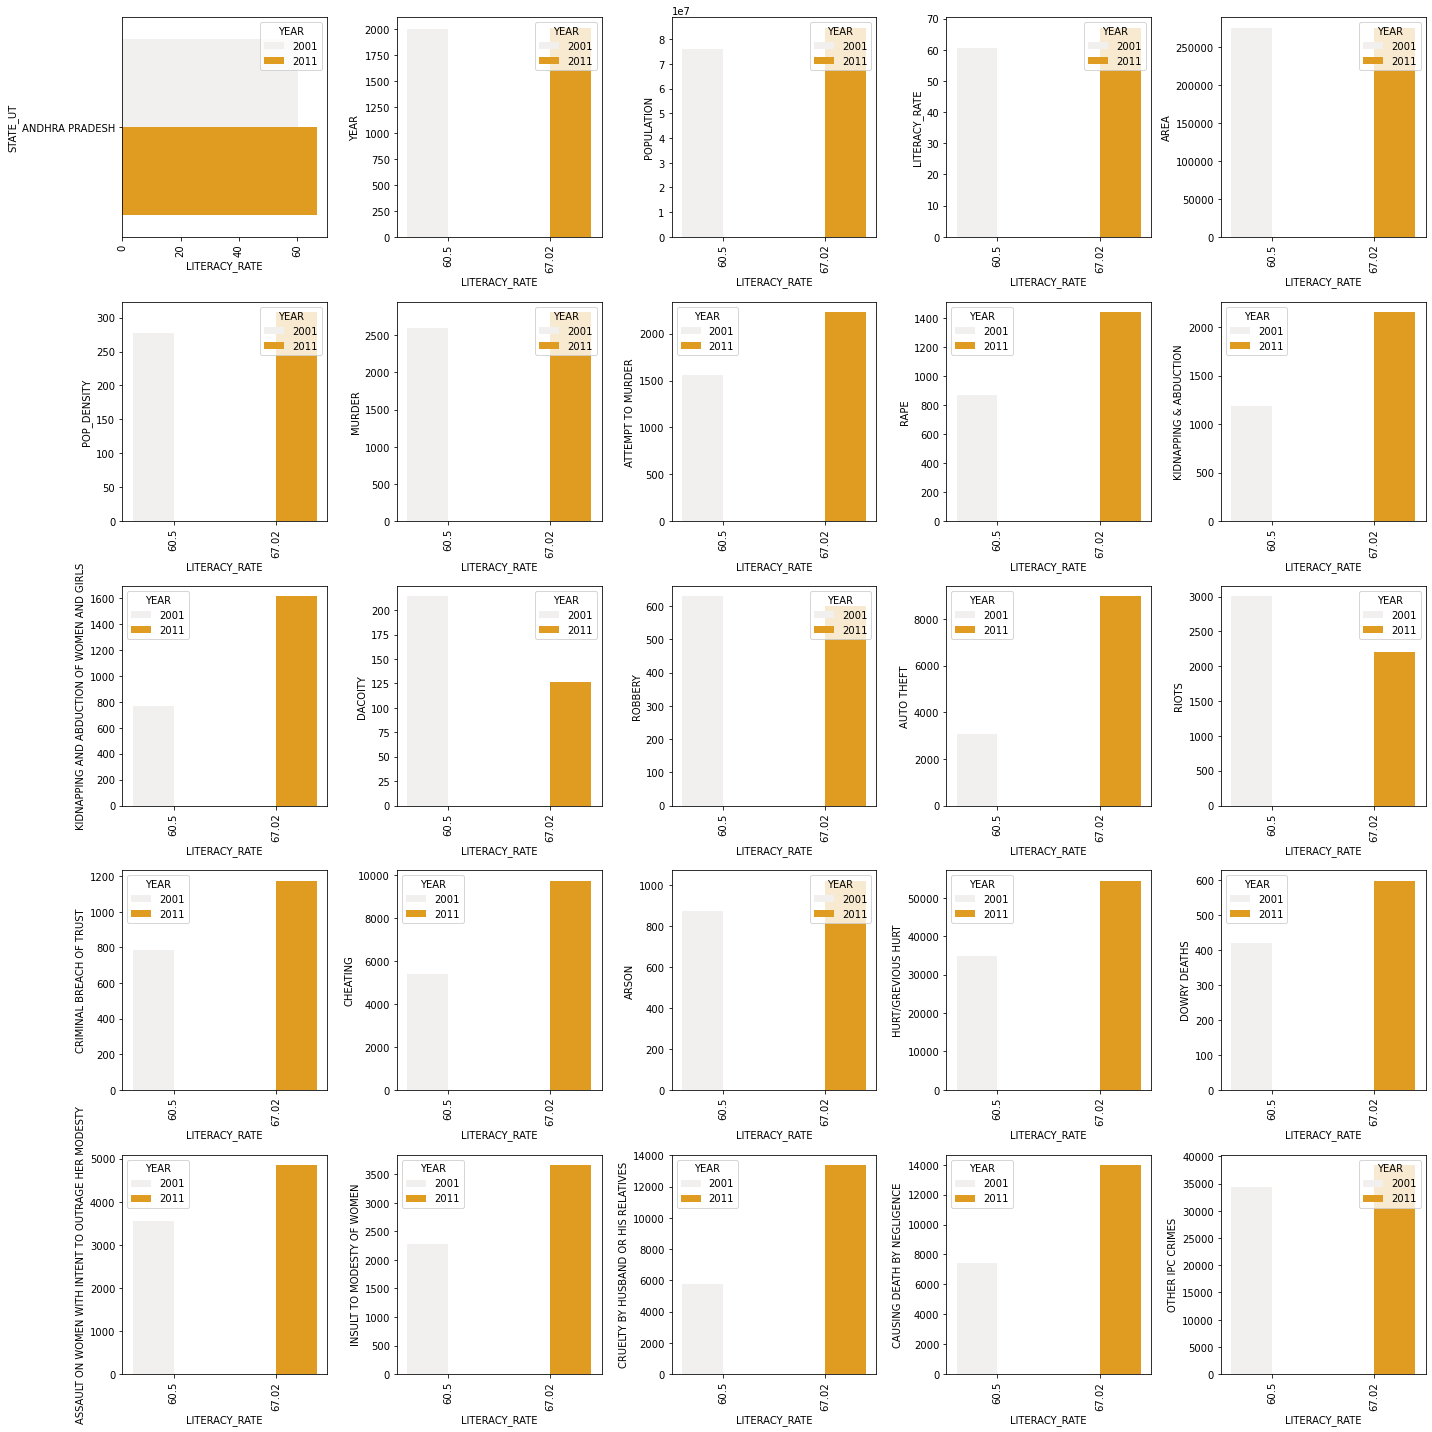

In [9]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in andhra:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=andhra,hue='YEAR',color='orange')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()    
    

- Observation:
    - The literacy rate vs murder plot shows that with increasing literacy rate there is increase in murder cases.
    - Same trend is seen in plots of literacy rate vs attempt to murder, Kidnaping and abduction.
    - Crimes on women such as Rape. kidnapping and abduction of women and girls, dowry deaths,Insult to modesty and assault in women and cruelty by husband and family has increased in 2011 even though litercy rate is increased.
    - Crimes such as robbery, auto theft,riots,criminal breach of trust, cheatin, arson, hurt and deaths caused by negligence have increased with increased literacy rate.
    - dacoity cases has seen decline in 2011 compared to that in 2001.

**ARUNACHAL PRADESH**

In [10]:
arunachal=df[df['STATE_UT']=='ARUNACHAL PRADESH']
arunachal.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  \
1   ARUNACHAL PRADESH  2001     1097968          54.30  83743           13   
36  ARUNACHAL PRADESH  2011     1383727          65.38  83743           17   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
1       83                 53    33                      83  ...   
36      65                 29    42                      93  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
1                         41        30     13                 466   
36                        54        74     34                 379   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
1              0                                                 78     
36             0                                                 51     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
1                            3                                   11   
36                           0                                   18   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
1                             0               618  
36                           98               622  

[2 rows x 25 columns]

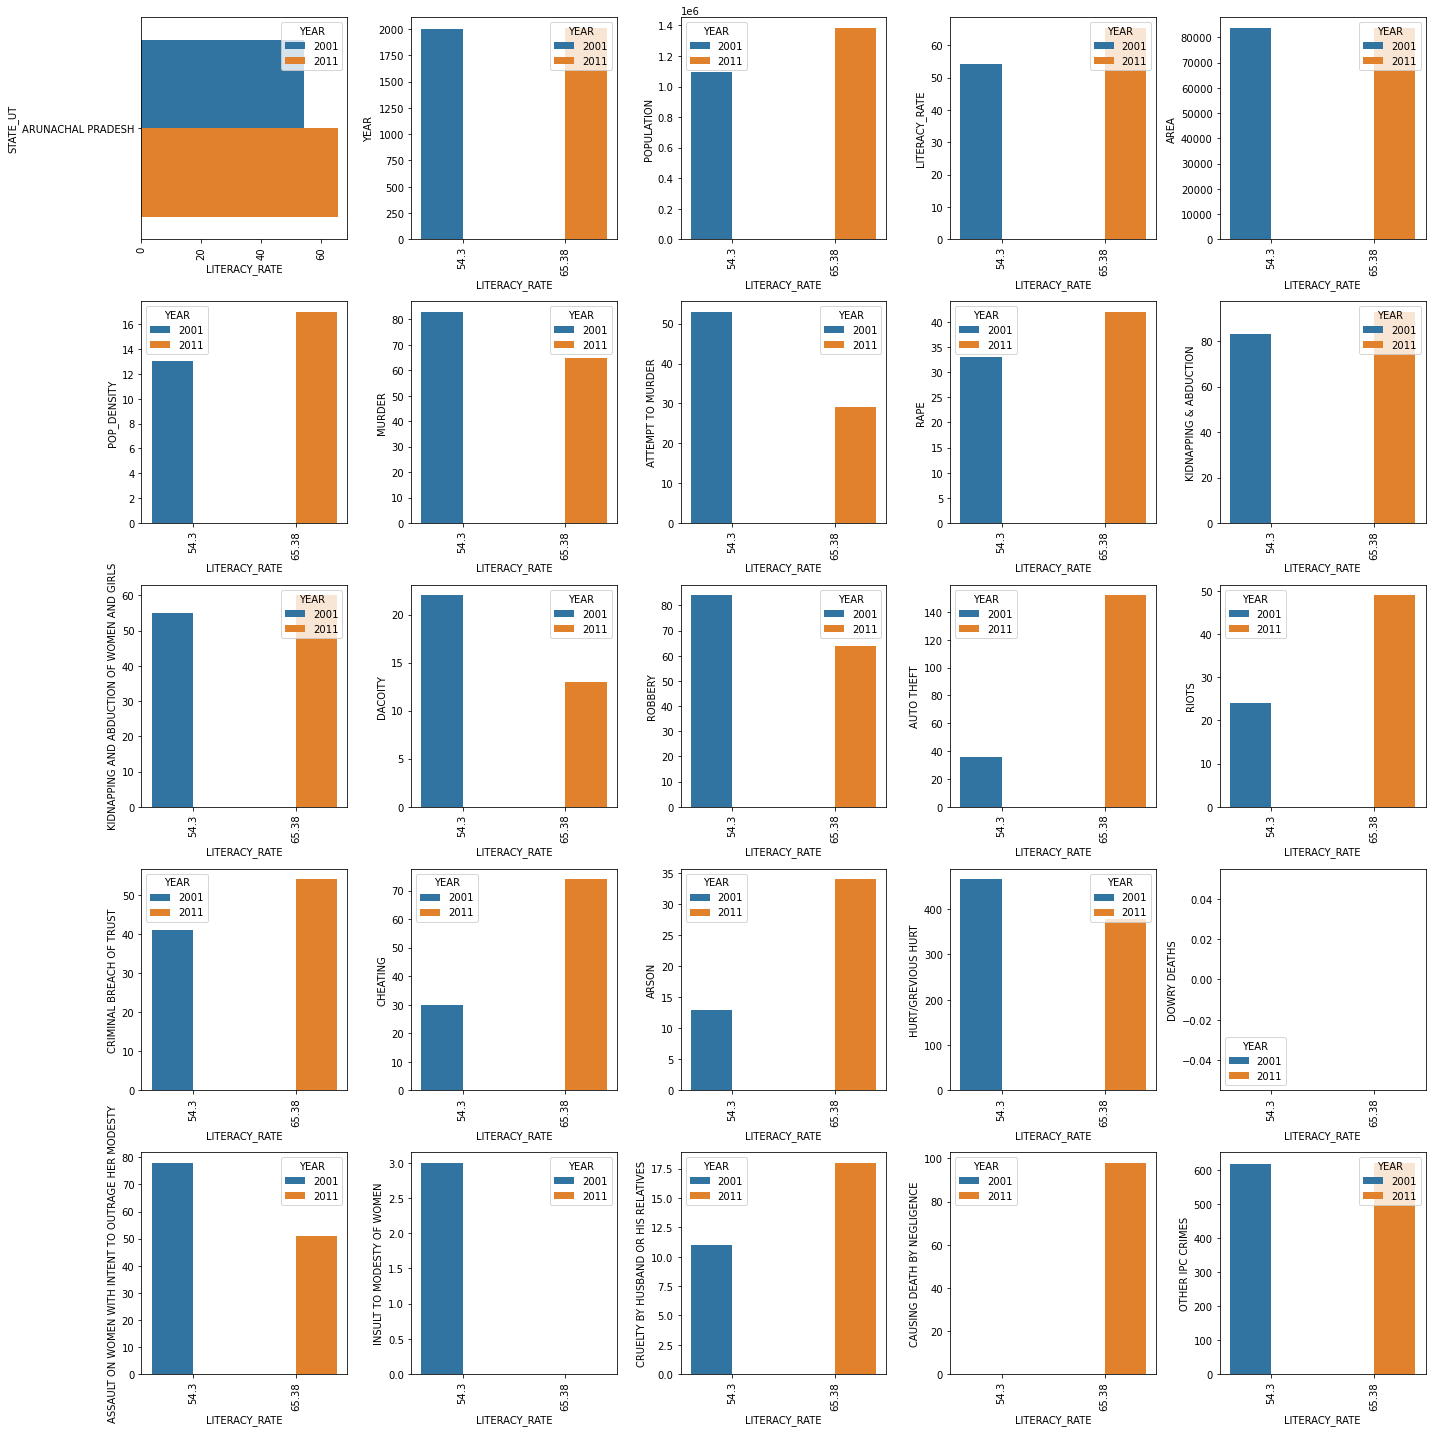

In [11]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in arunachal:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=arunachal,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- Observation:
    - The literacy rate vs murder plot shows that with increasing literacy rate there is decrease in murder cases.
    - Same trend is seen in plots of literacy rate vs attempt to murder but there is rise in cases of Kidnaping and abduction in 2011 compared to that in 2001.
    - Crimes on women such as Rape. kidnapping and abduction of women and girls and cruelty by husband and family has increased in 2011 even though litercy rate is increased while assault on women have decreased in 2011.
    - Crimes such as robbery,dacoity hurt have declined with increased literacy rate. But criminal breach of trust, cheatin, arson,riots and auto thefts have increased with increased literacy rate.


**ASSAM**

In [12]:
assam=df[df['STATE_UT']=='ASSAM']
assam.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
2     ASSAM  2001    26655528          63.30  78438          340    1356   
37    ASSAM  2011    31205576          72.19  78438          397    1303   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
2                 481   817                    1480  ...   
37                504  1700                    3764  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
2                        374       575    441                5805   
37                       920      1495    506                6306   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
2             59                                                850     
37           121                                               1193     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
2                            4                                 1248   
37                           8                                 5246   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
2                          2010              9315  
37                         2915             25513  

[2 rows x 25 columns]

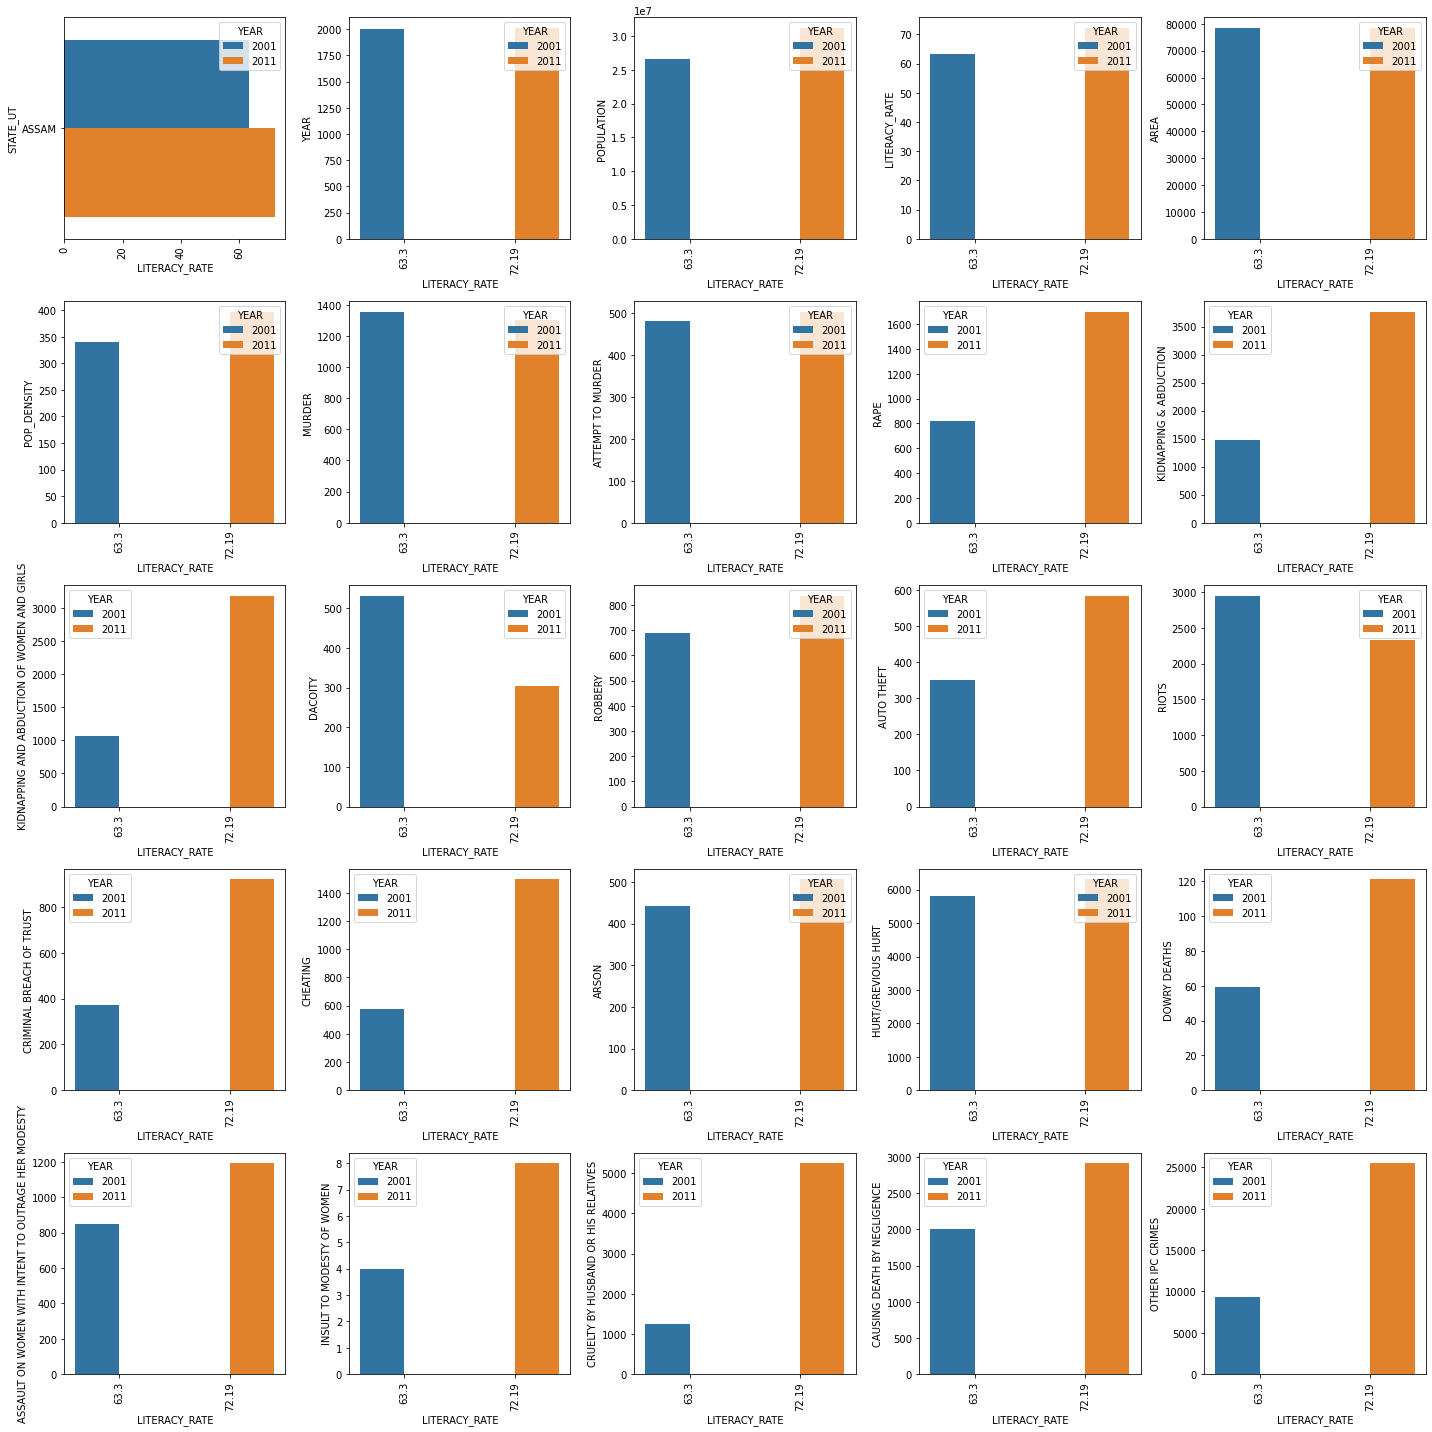

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in assam:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=assam,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate there is no change in murder cases but increase of cases in seen in attemopt to murder, kidnapping and abduction.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls, assault on women with intent to outrage he modesty,dowry deaths,c insult to modesty of women, cruelty by husband and family have increased with increase in literacy rate.
- Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001.

**BIHAR**

In [14]:
bihar=df[df['STATE_UT']=='BIHAR']
bihar.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
3     BIHAR  2001    82998509           47.0  94163          881    3643   
38    BIHAR  2011   104099452           61.8  94163         1102    3198   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
3                3419   888                    2159  ...   
38               3327   934                    4268  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
3                        946      1659    502                7544   
38                      1741      3776    705               19391   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
3            859                                                562     
38          1413                                                790     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
3                           21                                 1558   
38                          11                                 2607   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
3                          2406             36667  
38                         5877             55705  

[2 rows x 25 columns]

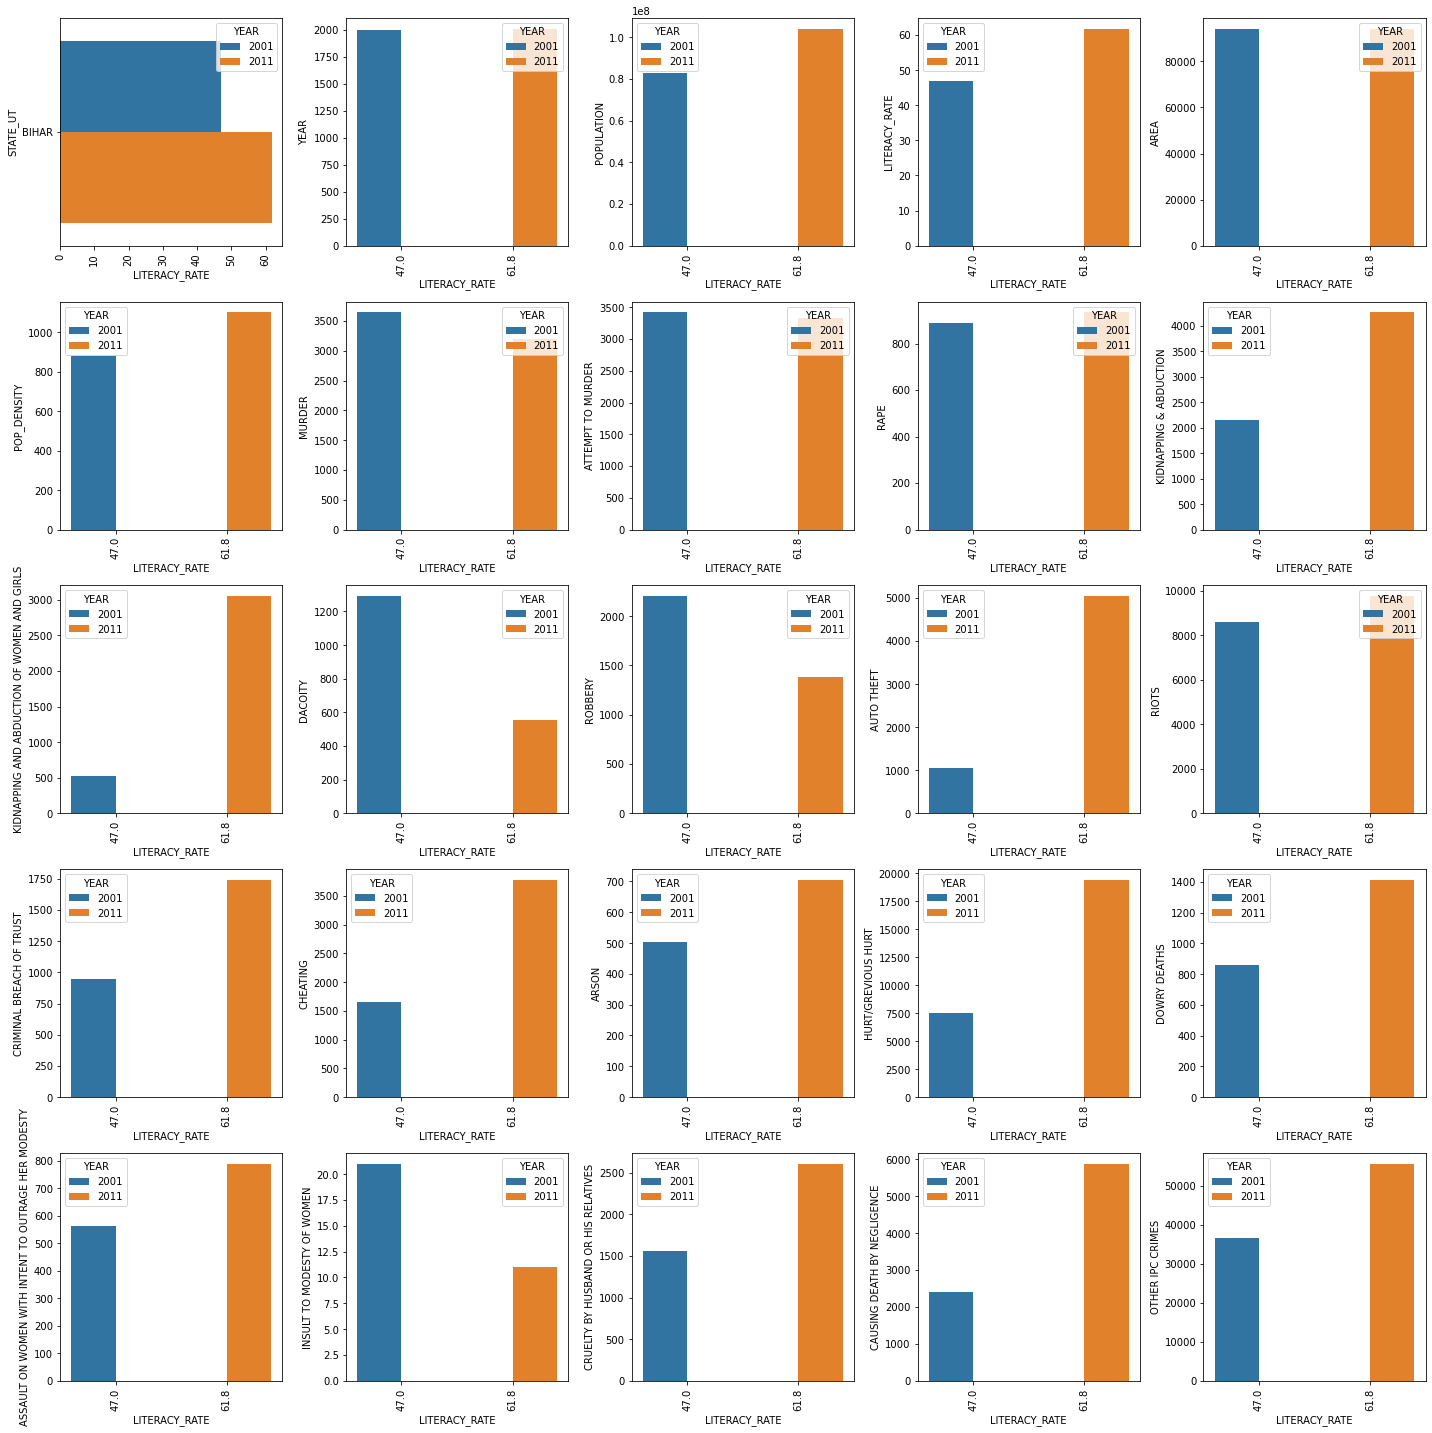

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in bihar:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=bihar,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate there is no change in murder cases but increase of cases in seen in attemopt to murder, kidnapping and abduction.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls, assault on women with intent to outrage he modesty,dowry deaths,c insult to modesty of women, cruelty by husband and family have increased with increase in literacy rate.
- Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001.

**CHHATTISGARH**

In [7]:
chattisgarh=df[df['STATE_UT']=='CHHATTISGARH']
chattisgarh.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
4   CHHATTISGARH  2001    20833803          64.70  135191          154   
39  CHHATTISGARH  2011    25545198          70.28  135191          189   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
4      880                529   959                     207  ...   
39    1110                747  1053                     472  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
4                        154       402    215                5477   
39                       180       980    289               11105   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
4             70                                               1763     
39           104                                               1654     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
4                          161                                  840   
39                         174                                  834   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
4                           689             15790  
39                         2856             25223  

[2 rows x 25 columns]

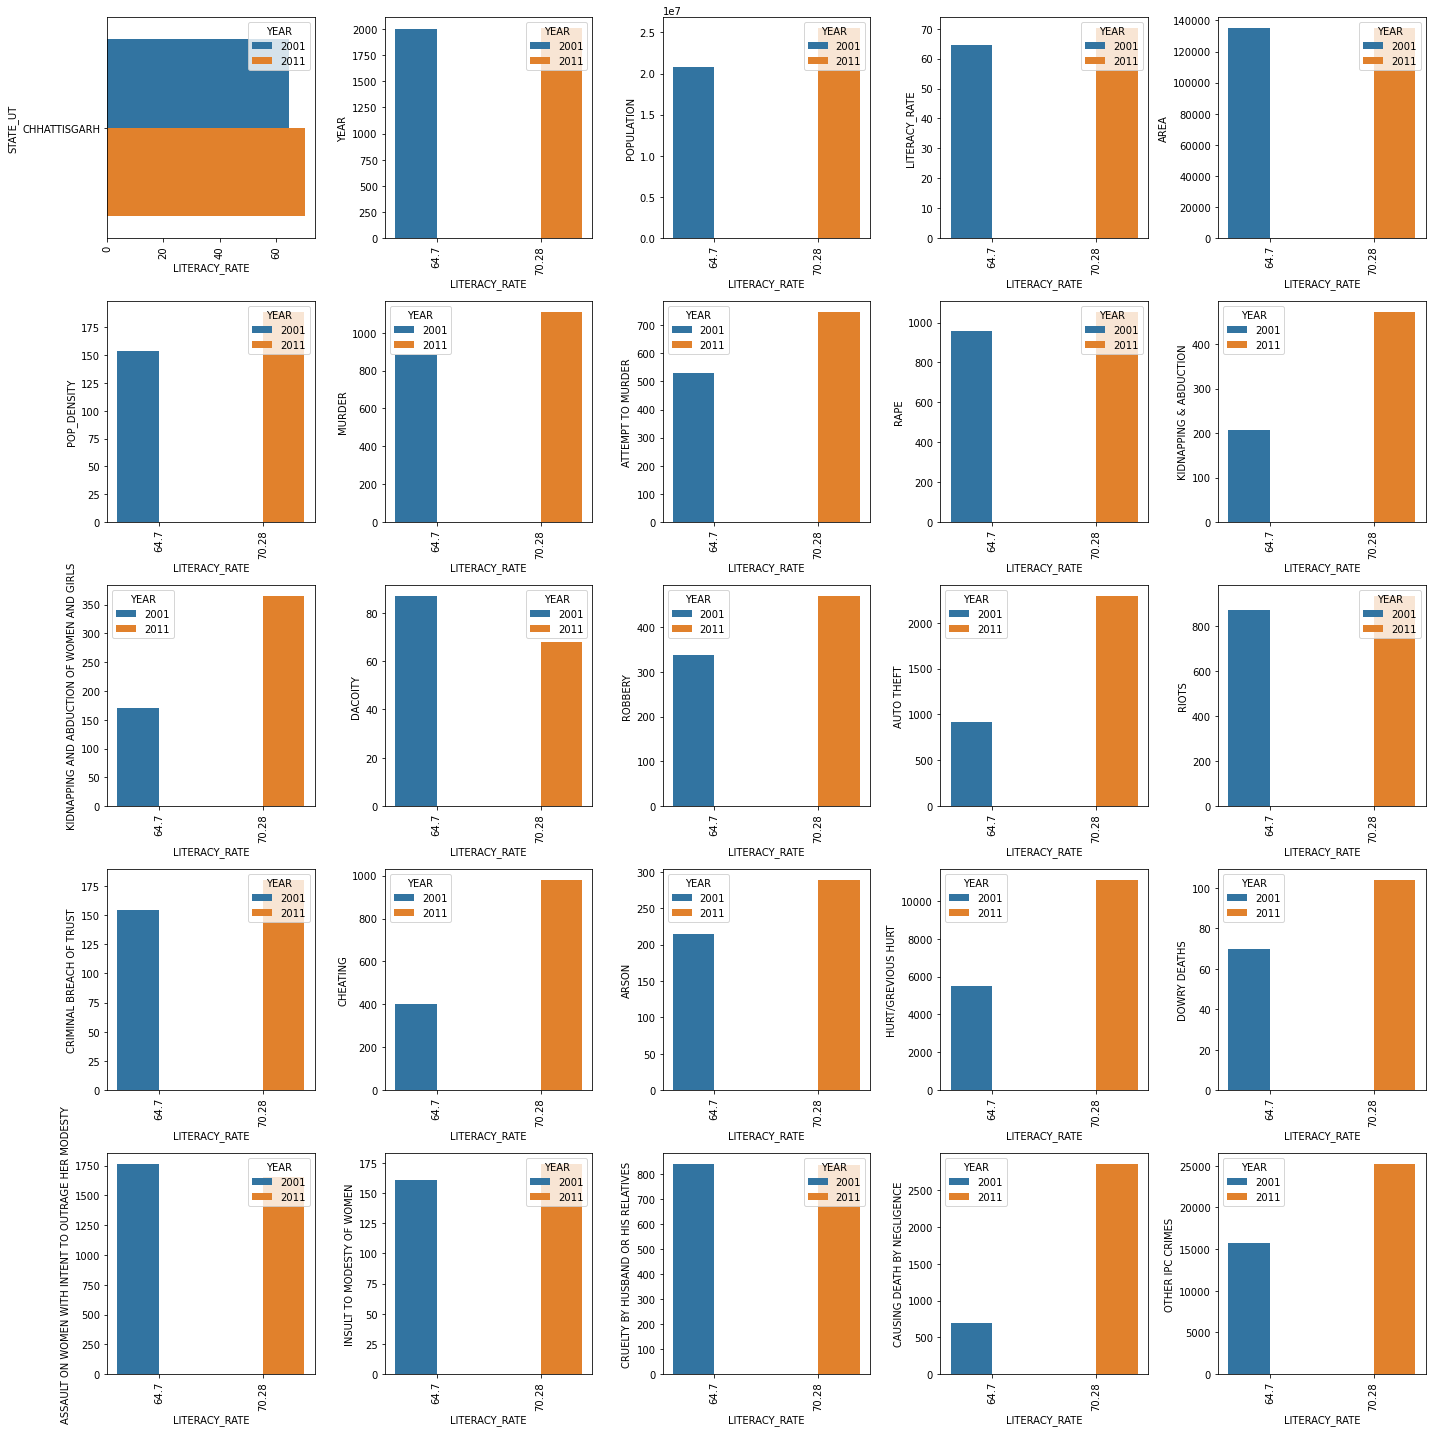

In [8]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in chattisgarh:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=chattisgarh,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate there is increase in murder cases, attemopt to murder and  kidnapping and abduction.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,insult to modesty of women have increased with increase in literacy rate while there is slight decrease in  assault on women with intent to outrage he modesty with increase in literacy rate.
- Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001.

**GOA**

In [18]:
goa=df[df['STATE_UT']=='GOA']
goa.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
5       GOA  2001     1347668           82.0  3702          364      36   
40      GOA  2011     1458545           88.7  3702          394      48   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
5                  30    12                       9  ...   
40                 22    29                      28  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
5                         39        62     16                 174   
40                        45       142     24                 215   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
5              2                                                 17     
40             1                                                 29     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
5                            7                                   11   
40                          12                                   18   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
5                           191               697  
40                          263              1001  

[2 rows x 25 columns]

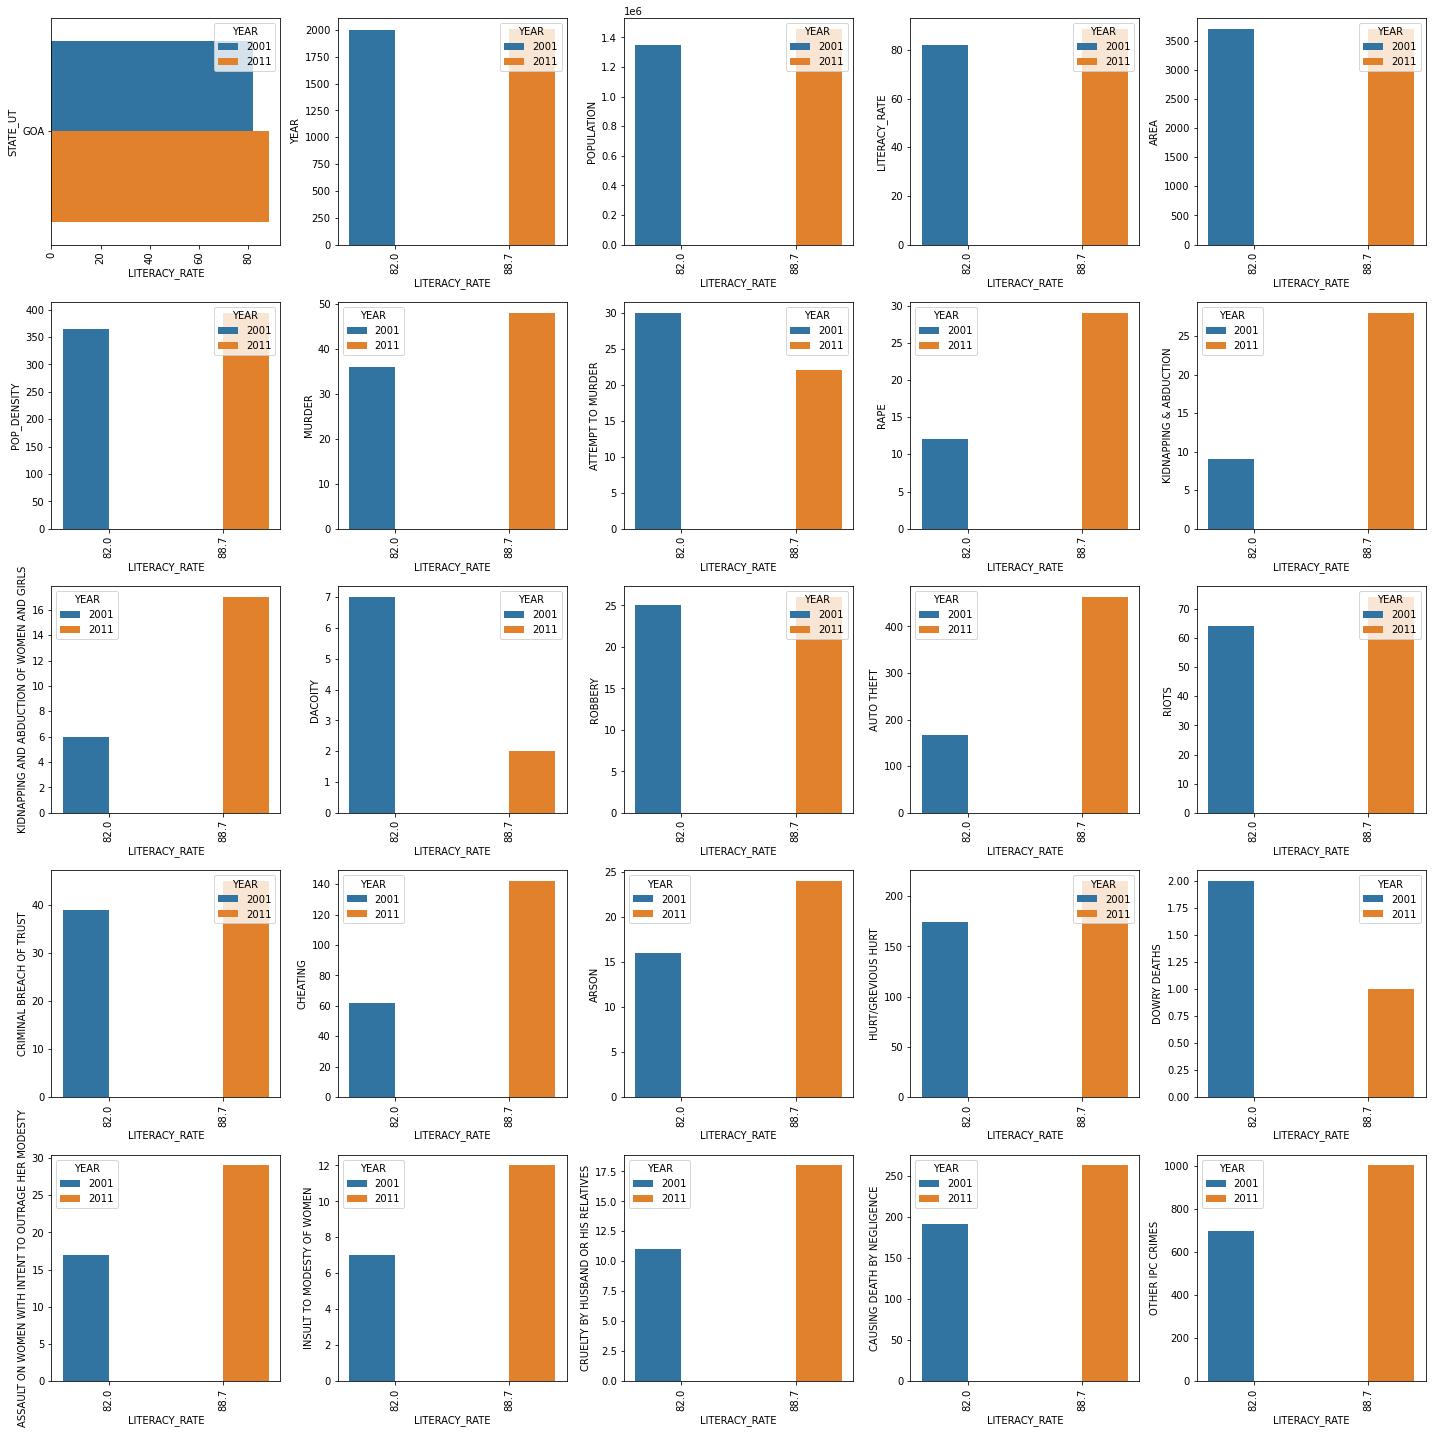

In [19]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in goa:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=goa,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate there is decrease in  attempt to murder cases but increase  in  murder and  kidnapping and abduction.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls cruelty by husband and family,insult to modesty of women,assault on women with intent to outrage he modesty have increased with increase in literacy rate while there is decrease in dowry deaths  with increase in literacy rate.
- Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001.

**GUJARAT**

In [20]:
gujrat=df[df['STATE_UT']=='GUJARAT']
gujrat.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
6   GUJARAT  2001    50671017          69.10  196024          258    1226   
41  GUJARAT  2011    60439692          78.03  196024          308    1126   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
6                 537   286                     998  ...   
41                478   439                    1614  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
6                       1748      1779    449               13760   
41                      1339      1399    263               10159   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
6             67                                                756     
41            30                                                685     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
6                          111                                 3667   
41                          93                                 6052   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
6                          2924             50719  
41                         5827             69788  

[2 rows x 25 columns]

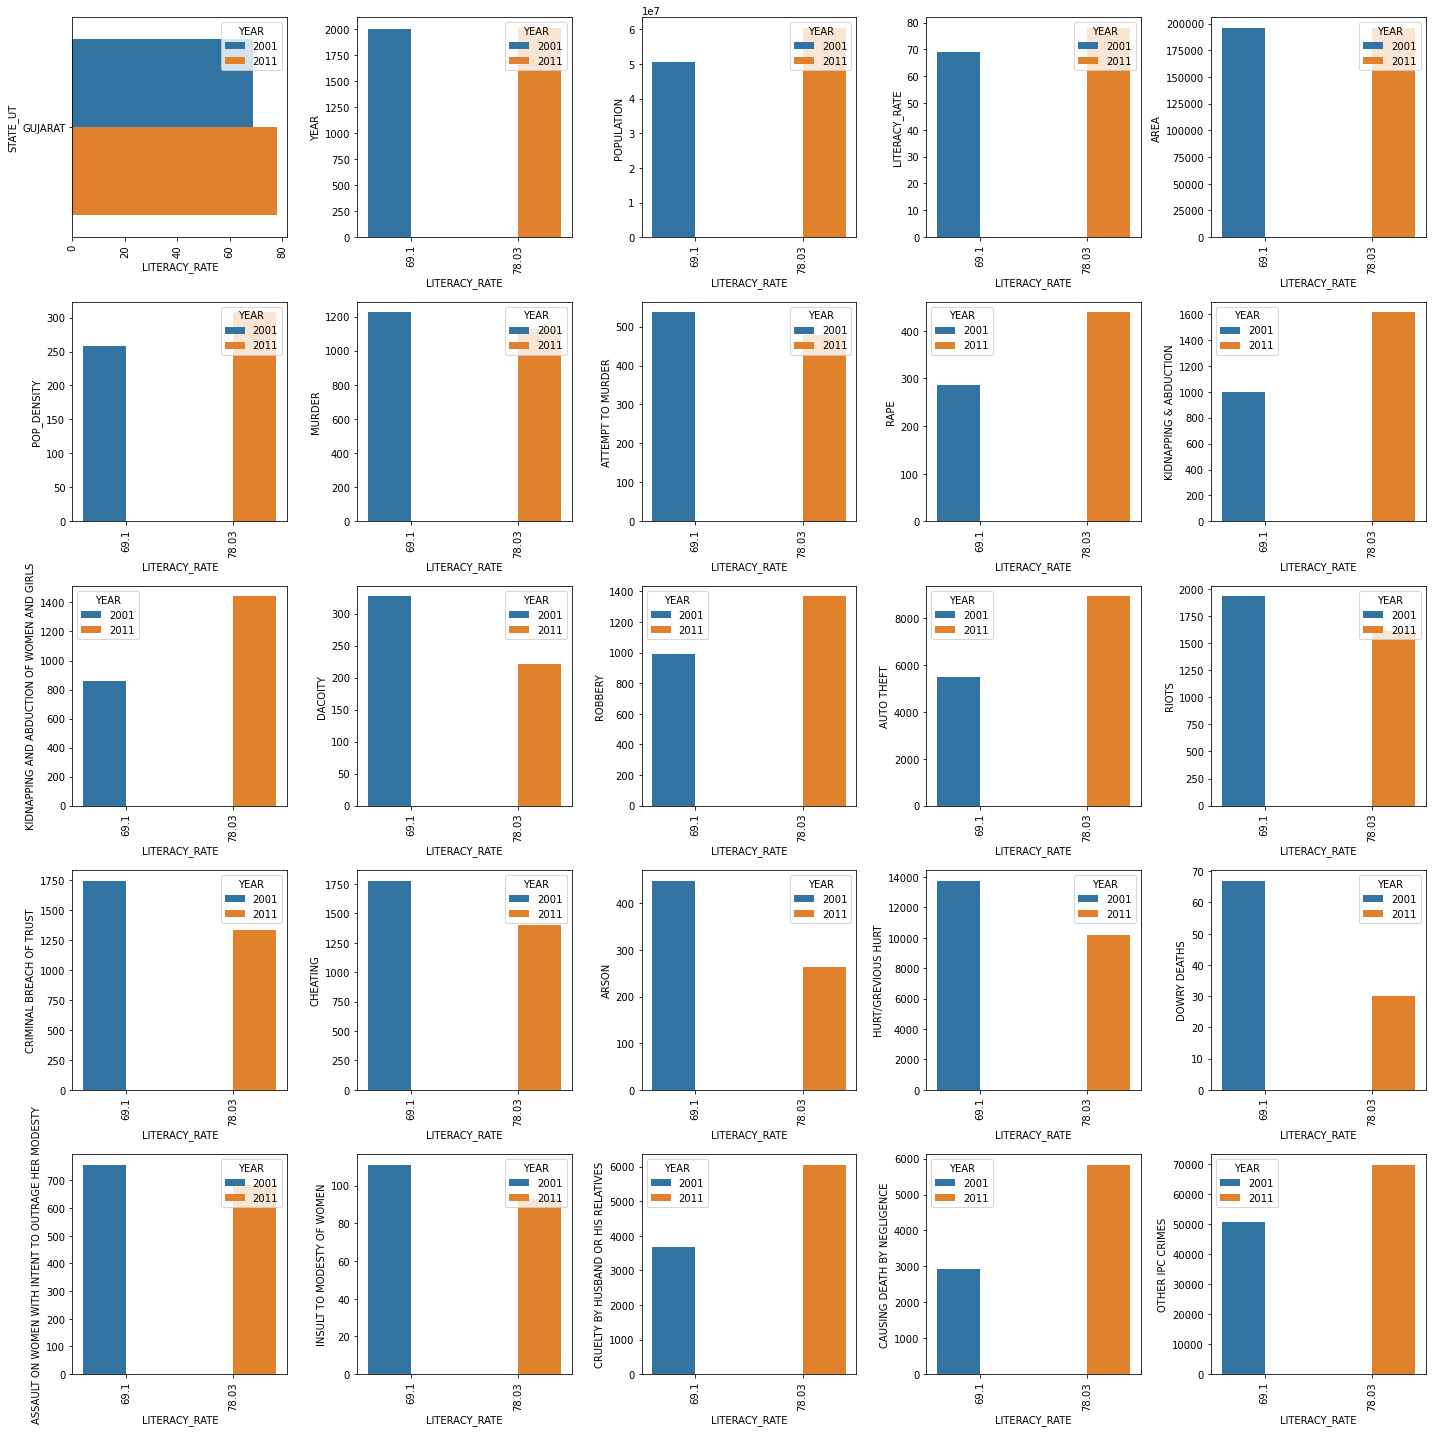

In [21]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in gujrat:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=gujrat,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate there slight decrease in murder cases, attemopt to murder but increase in  kidnapping and abduction in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls, cruelty by husband and family, have increased with increase in literacy rate while there is slight decrease  in assault on women with intent to outrage he modesty,dowry deaths,insult to modesty of women with increase in literacy rate.
- Crimes related to robbery, auto theft and cruelty by negligence have increased with increase in literacy rate while dacoity, Riots,criminal breach of trust,cheating,arson,hurt cases are less in 2011 as compared to 2001.

**HARYANA**

In [22]:
haryana=df[df['STATE_UT']=='HARYANA']
haryana.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
7   HARYANA  2001    21144564          57.90  44212          478     781   
42  HARYANA  2011    25351462          75.55  44212          573    1062   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
7                 467   398                     449  ...   
42                851   733                     959  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
7                        556      1016    203                4744   
42                       812      1761    166                3423   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
7            285                                                478     
42           255                                                474     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
7                          401                                 1513   
42                         490                                 2740   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
7                           856             15906  
42                         1505             20549  

[2 rows x 25 columns]

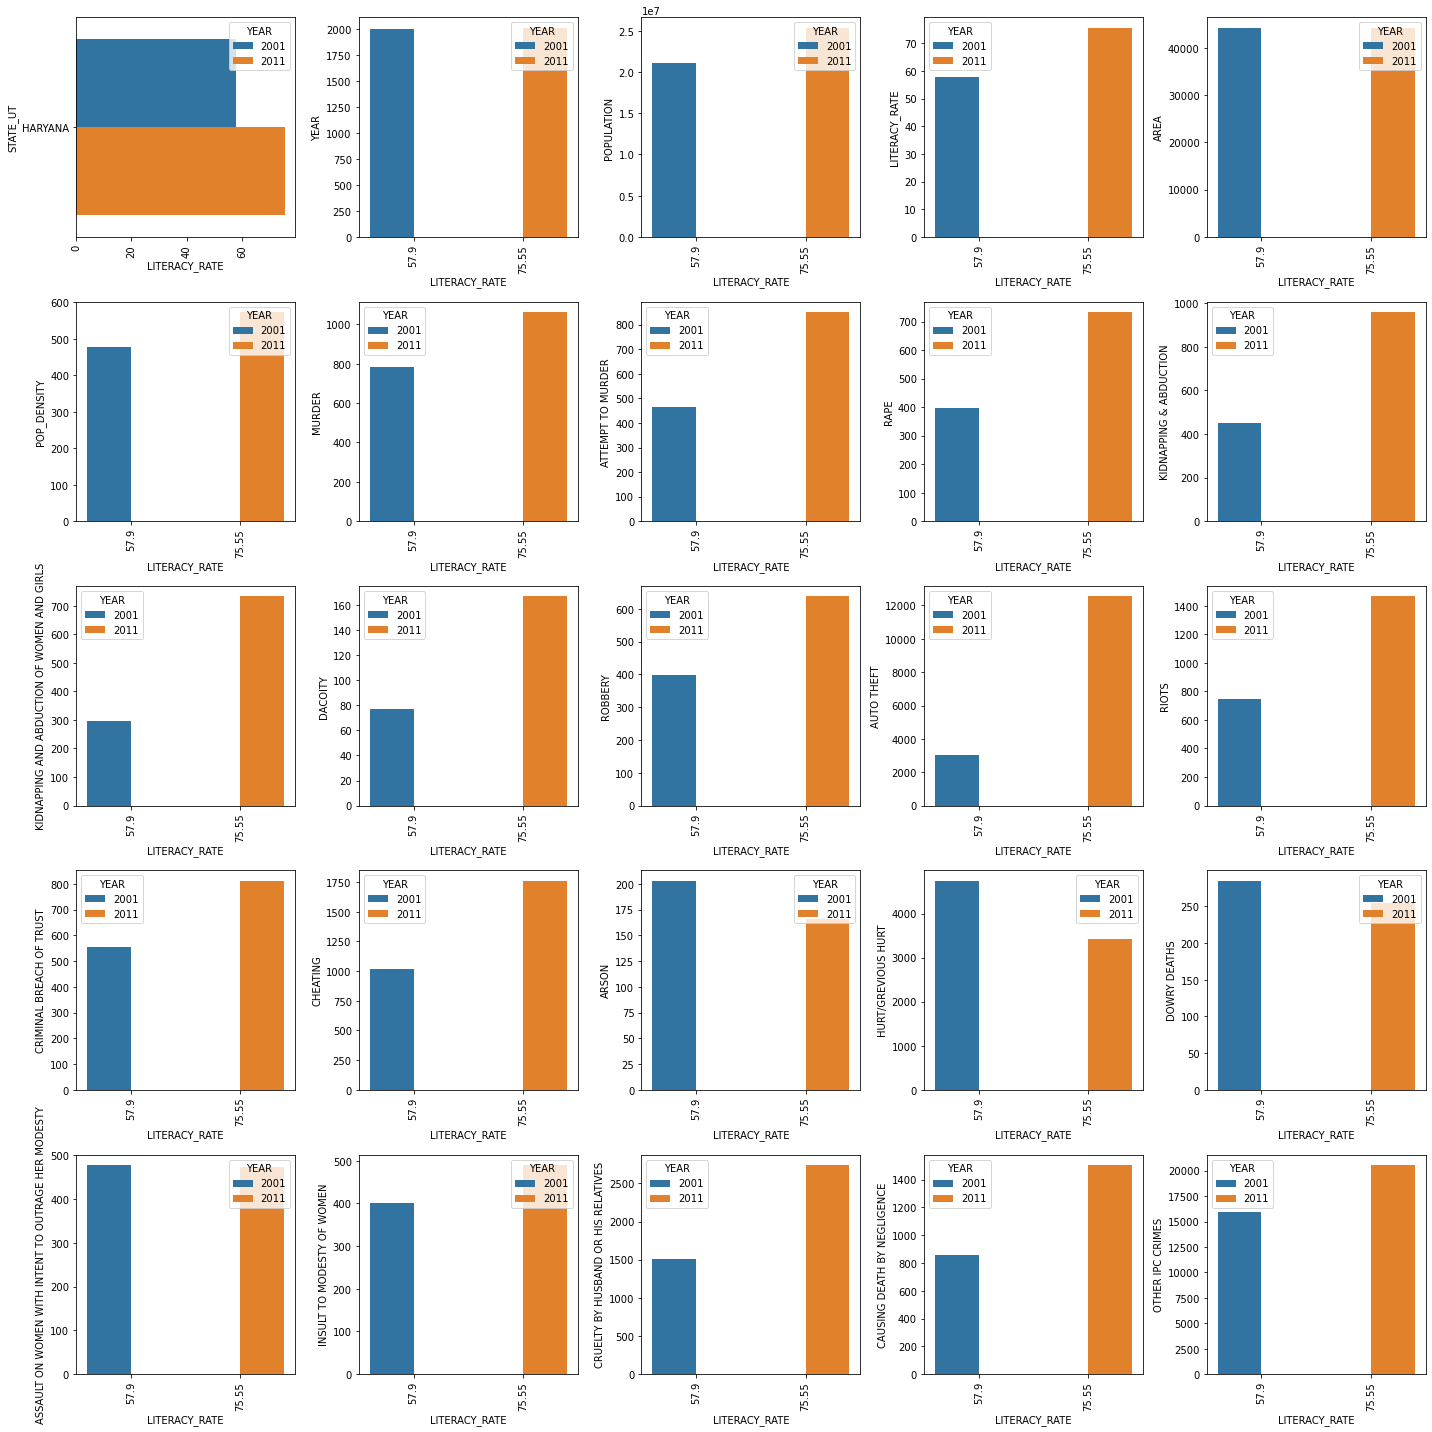

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in haryana:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=haryana,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in murder cases, attempt to murder and  kidnapping and abduction in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women, cruelty by husband and family, have increased with increase in literacy rate while there is slight decrease  in dowry deaths with increase in literacy rate but assault on women with intent to outrage he modesty cases remain same in 2001 and 2011.
- Crimes related to robbery,dacoity , auto theft,Riots, criminal breach of trust,cheating  and causing death by negligence have increased with increase in literacy rate while arson and hurt cases decreased in 2011 as compared to 2001.

**HIMACHAL PRADESH**

In [24]:
himachal=df[df['STATE_UT']=='HIMACHAL PRADESH']
himachal.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  \
8   HIMACHAL PRADESH  2001     6077900           76.5  55673          109   
43  HIMACHAL PRADESH  2011     6864602           82.8  55673          123   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
8      119                 75   124                     126  ...   
43     130                 50   168                     212  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
8                         69       146    134                1403   
43                       143       359    110                1251   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
8             10                                                310     
43             4                                                331     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
8                           14                                  317   
43                          62                                  239   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
8                           483              6052  
43                          563              8102  

[2 rows x 25 columns]

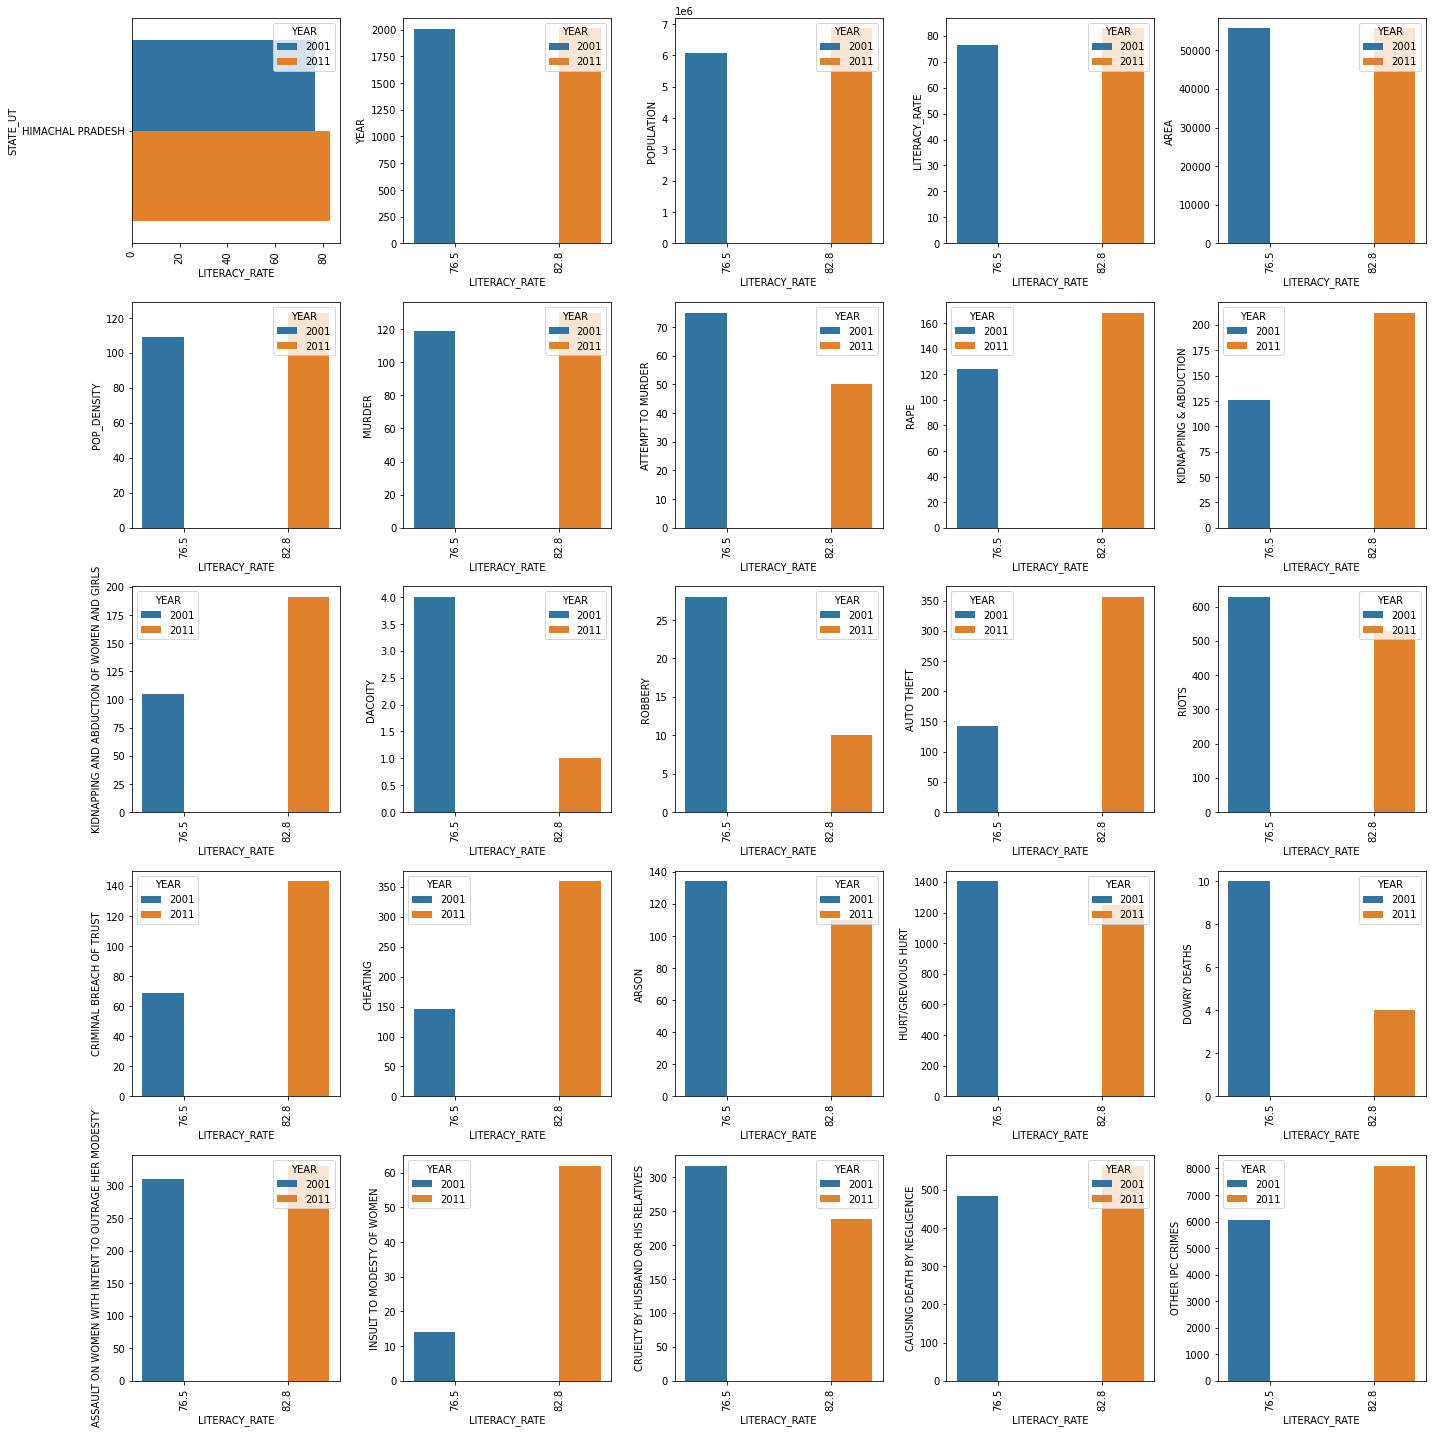

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in himachal:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=himachal,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in murder cases and  kidnapping and abduction but decrease in  attempt to murder in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women,assault on women with intent to outrage he modesty  have increased with increase in literacy rate while there is slight decrease  in cruelty by husband and family,dowry deaths with increase in literacy rate in 2011.
- Crimes related to  auto theft, criminal breach of trust,cheating  and causing death by negligence have increased with increase in literacy rate while dacoity,robbery,Riots, arson and hurt cases decreased in 2011 as compared to 2001.

**JAMMU & KASHMIR**

In [26]:
jk=df[df['STATE_UT']=='JAMMU & KASHMIR']
jk.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
9   JAMMU & KASHMIR  2001    10143700          55.50  222236          100   
44  JAMMU & KASHMIR  2011    12541302          67.16  222236           56   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
9     1075               1474   169                     606  ...   
44     169                494   277                    1077  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
9                         90       391    437                 318   
44                       195       612    205                 246   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
9             13                                                622     
44            11                                               1194     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
9                          288                                   50   
44                         350                                  286   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
9                           357              9046  
44                          385             13257  

[2 rows x 25 columns]

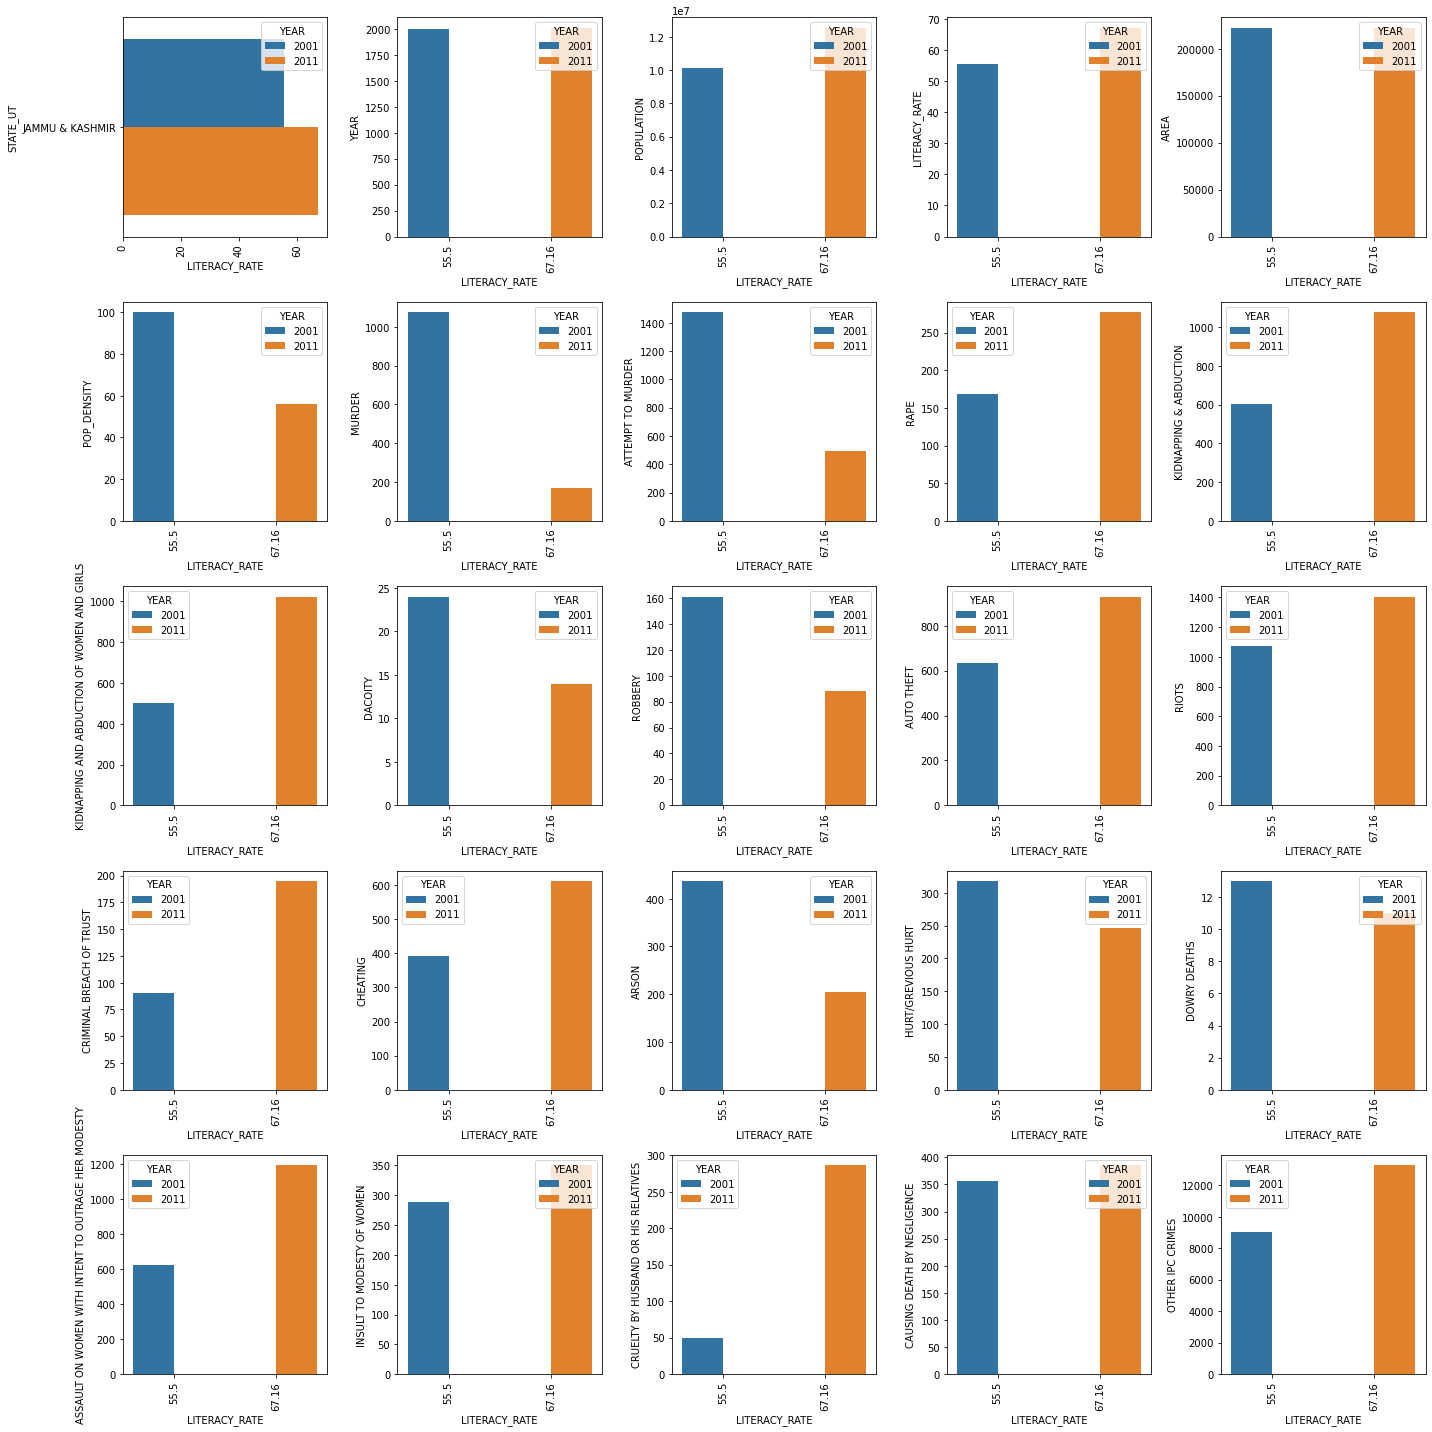

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in jk:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=jk,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in kidnapping and abduction but decrease in  murder cases and attempt to murder in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women,assault on women with intent to outrage he modesty,cruelty by husband and family  have increased with increase in literacy rate while there is slight decrease  in dowry deaths with increase in literacy rate in 2011.
- Crimes related to  auto theft,Riots, criminal breach of trust,cheating  and causing death by negligence have increased with increase in literacy rate while dacoity,robbery, arson and hurt cases decreased in 2011 as compared to 2001.

**JHARKHAND**

In [28]:
jharkhand=df[df['STATE_UT']=='JHARKHAND']
jharkhand.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
10  JHARKHAND  2001    26945829          53.60  79714          338    1507   
45  JHARKHAND  2011    32988134          66.41  79714          414    1747   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
10                866   567                     441  ...   
45                718   784                     941  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
10                       283       554    165                2254   
45                       447       907    138                4403   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
10           217                                                297     
45           282                                                317     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
10                           5                                  484   
45                           7                                  659   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
10                          420              8777  
45                         1728             11940  

[2 rows x 25 columns]

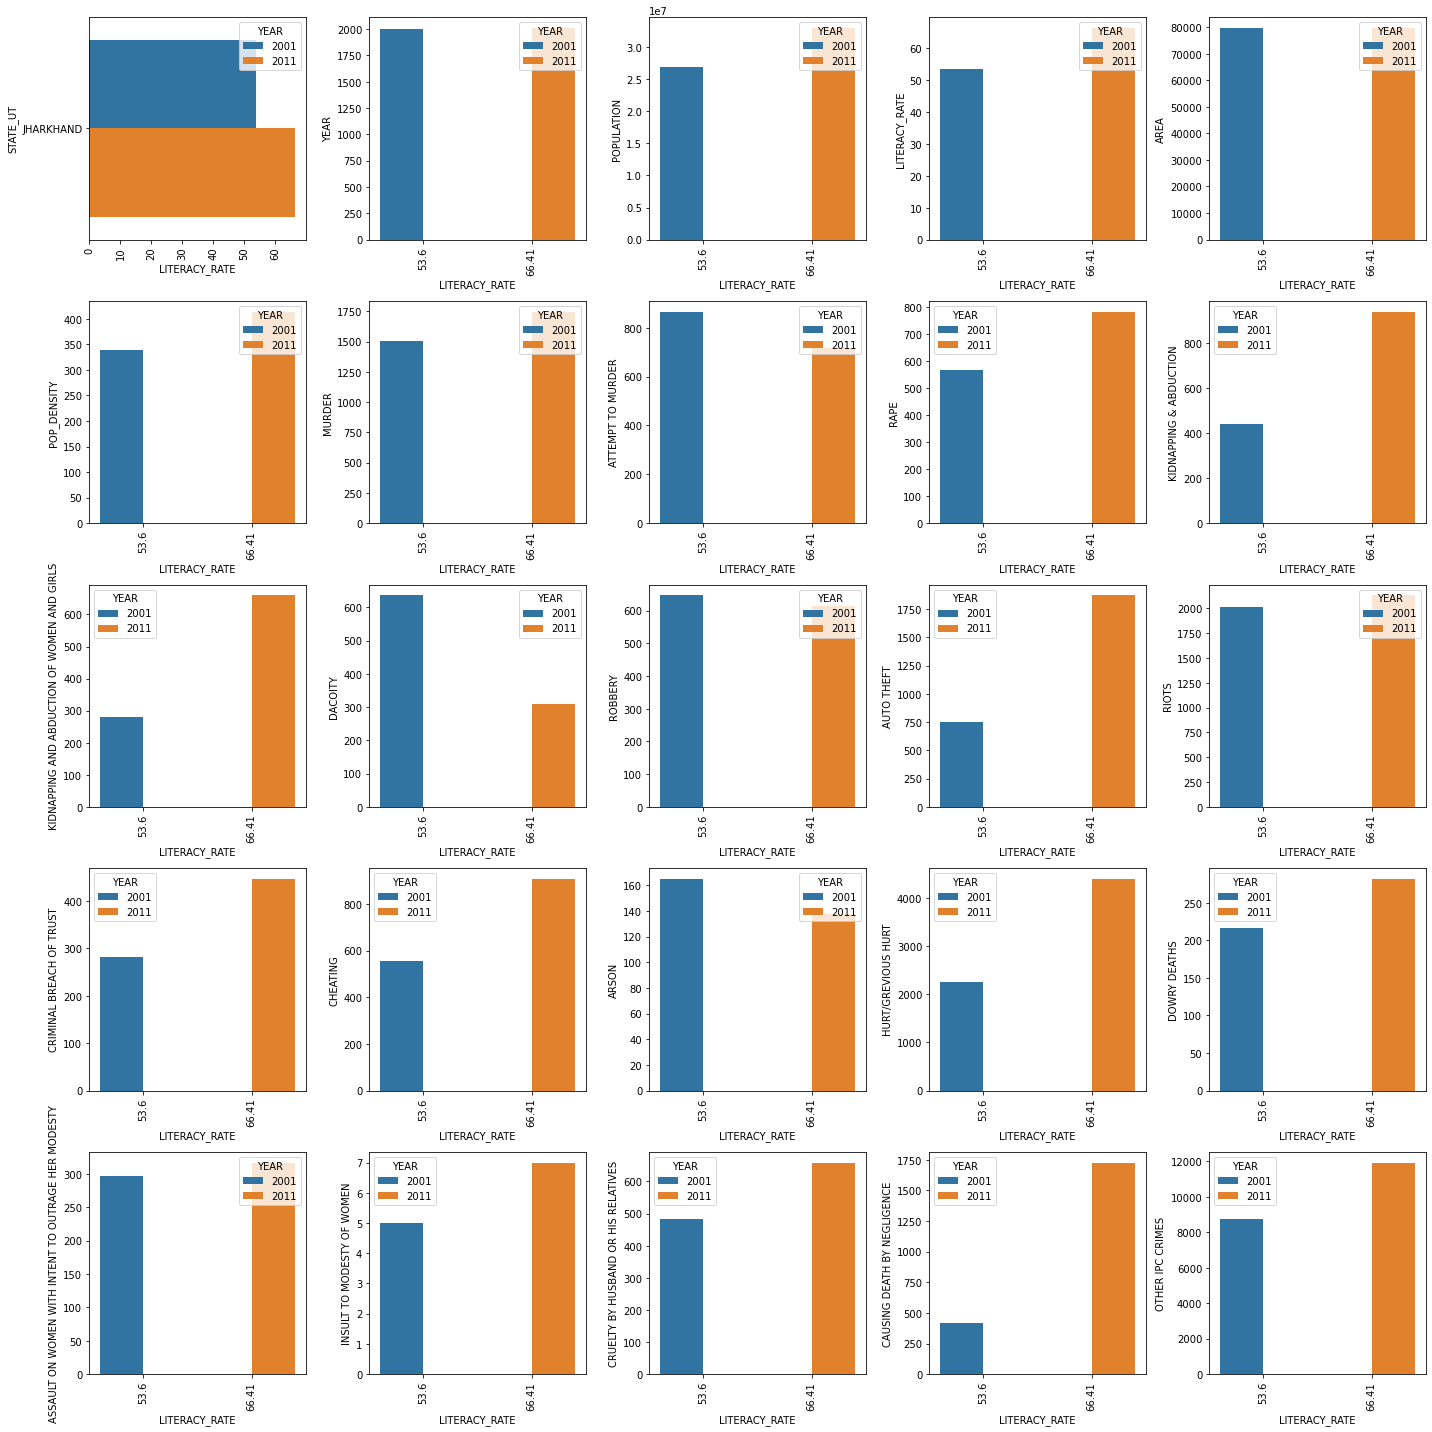

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in jharkhand:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=jharkhand,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in murder cases and  kidnapping and abduction but decrease in attempt to murder in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women,assault on women with intent to outrage he modesty,cruelty by husband and family, dowry deaths  have increased with increase in literacy rate in 2011.
- Crimes related to  auto theft,Riots, criminal breach of trust,cheating  and causing death by negligence,hurt have increased with increase in literacy rate while dacoity,robbery and  arson cases decreased in 2011 as compared to 2001.

**KARNATAKA**

In [30]:
karnataka=df[df['STATE_UT']=='KARNATAKA']
karnataka.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
11  KARNATAKA  2001    52850562          66.60  191791          276    1626   
46  KARNATAKA  2011    61095297          75.36  191791          319    1820   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
11               1475   293                     559  ...   
46               1837   636                    1395  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
11                       494      2678    352               23285   
46                       440      5850    231               21295   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
11           220                                               1665     
46           267                                               2608     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
11                          81                                 1755   
46                          81                                 3712   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
11                          100             47301  
46                          750             60505  

[2 rows x 25 columns]

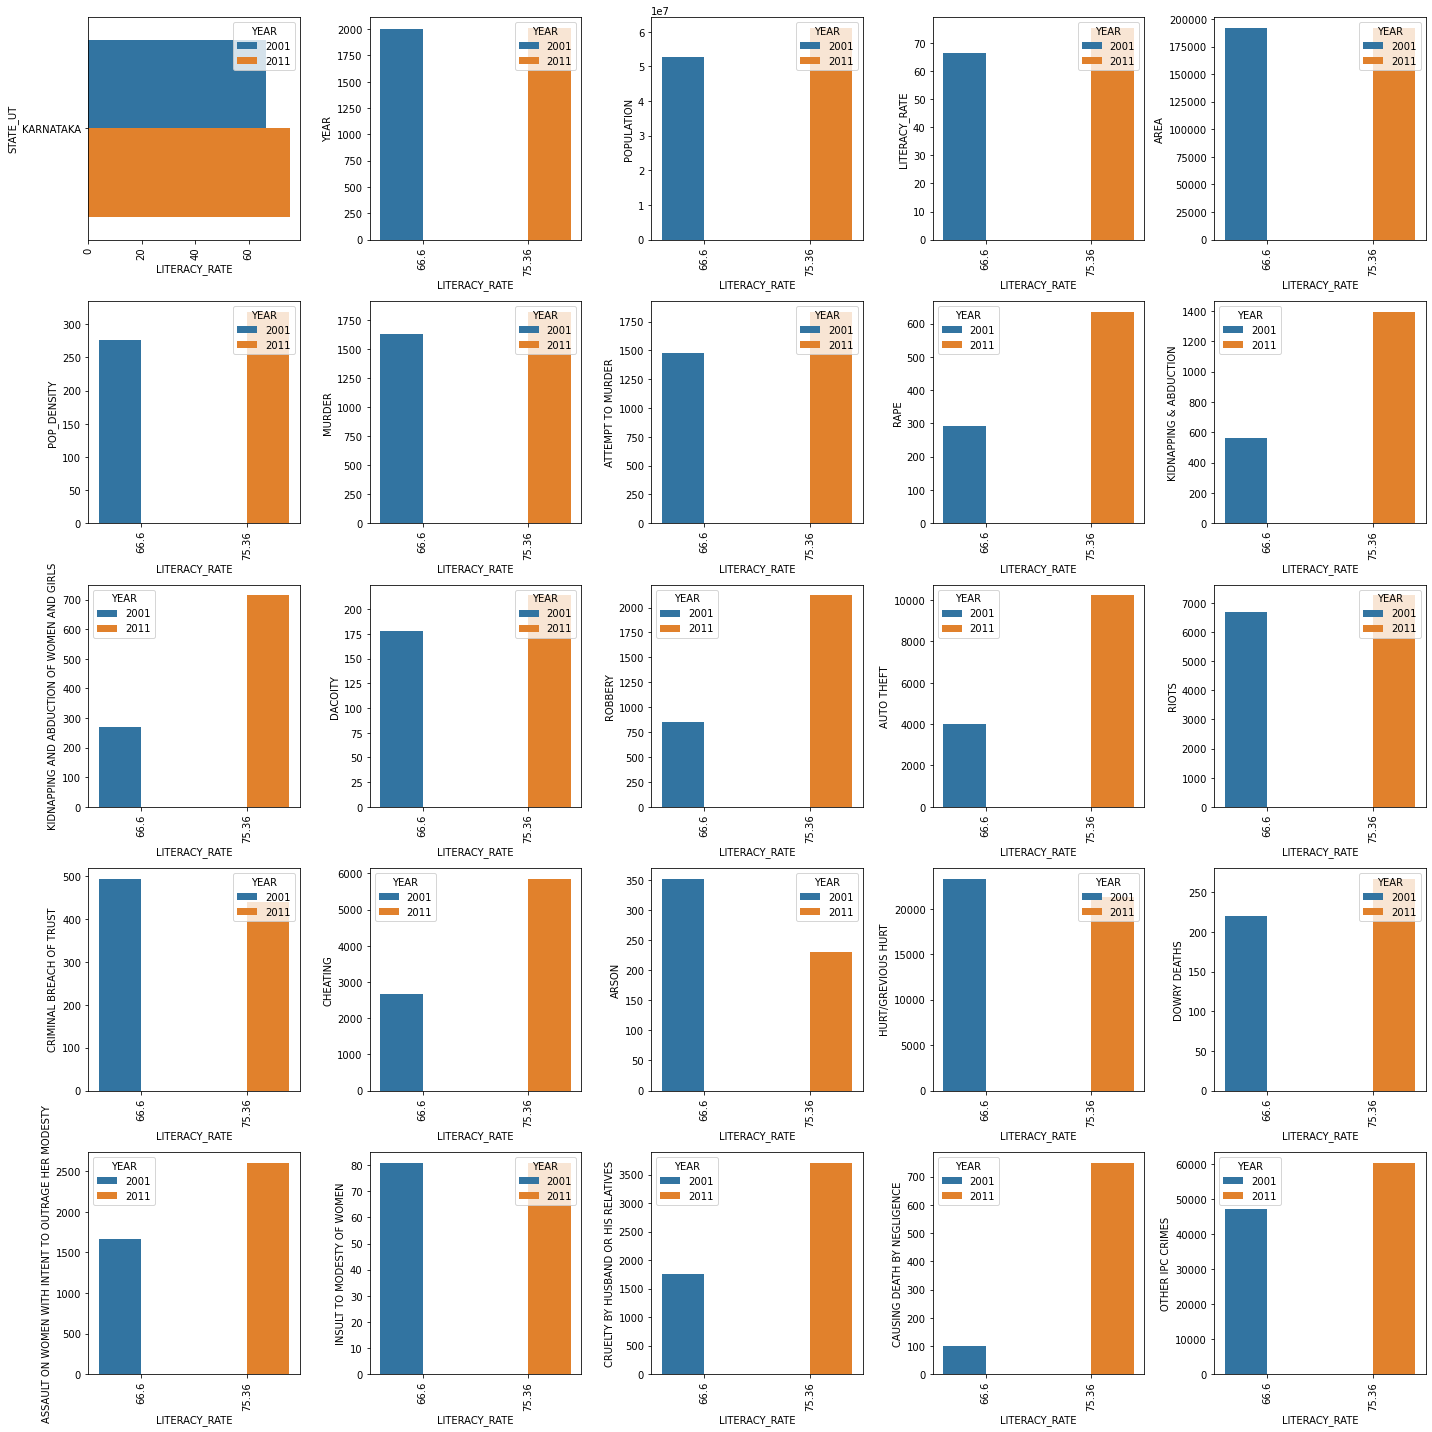

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in karnataka:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=karnataka,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in murder cases, kidnapping and abduction and attempt to murder in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,assault on women with intent to outrage he modesty,cruelty by husband and family, dowry deaths  have increased with increase in literacy rate in 2011 while insult to modesty of women cases remains same in 2011.
- Crimes related to  auto theft,robbery, Riots,dacoity, cheating  and causing death by negligence, have increased with increase in literacy rate while criminal breach of trust, hurt and  arson cases decreased in 2011 as compared to 2001.

**KERALA**

In [32]:
kerala=df[df['STATE_UT']=='KERALA']
kerala.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
12   KERALA  2001    31841374           90.9  38863          819     472   
47   KERALA  2011    33406061           94.0  38863          859     365   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
12                615   562                     183  ...   
47                521  1132                     299  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
12                       428      2756    768               19829   
47                       340      5155    450               21747   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
12            27                                               1942     
47            15                                               3756     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
12                          81                                 2561   
47                         573                                 5377   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
12                            0             54544  
47                           65            112665  

[2 rows x 25 columns]

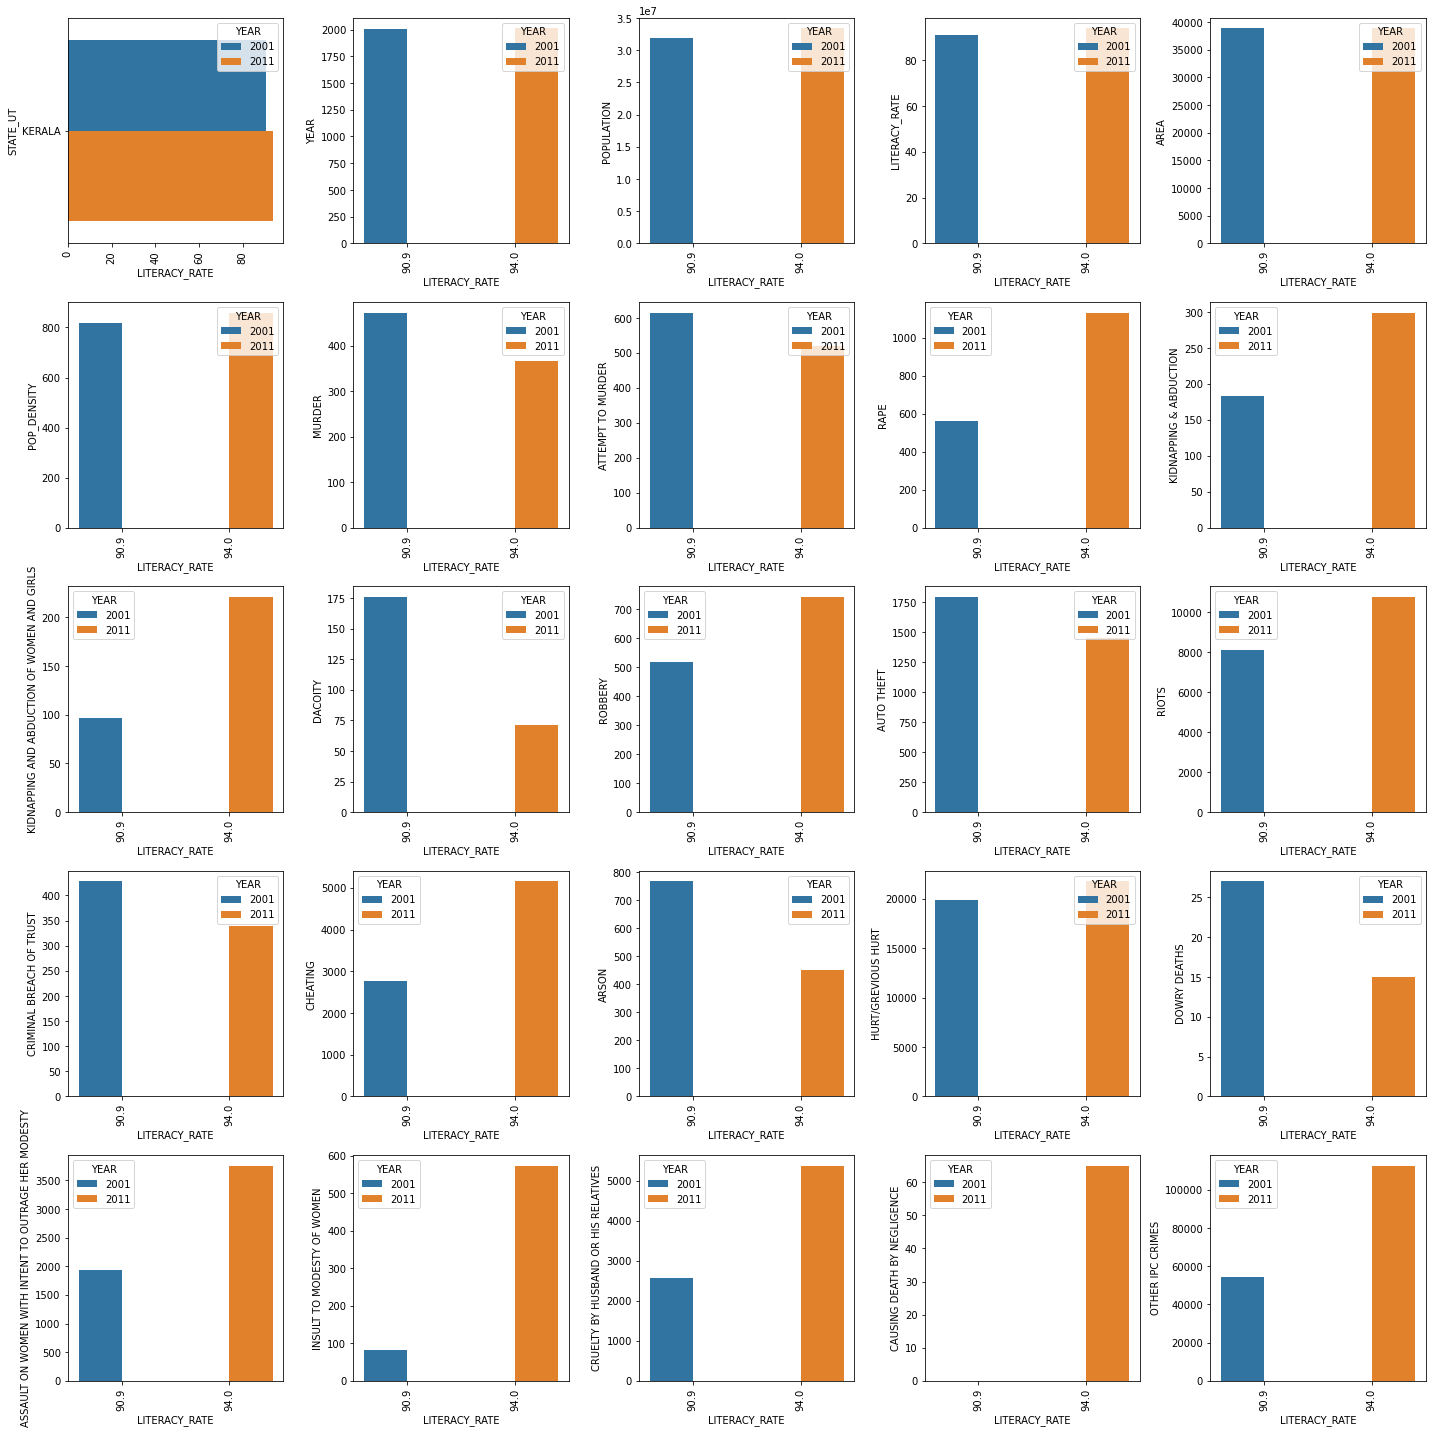

In [33]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in kerala:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=kerala,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is increase in kidnapping and abduction but decrease in murder cases and attempt to murder in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,assault on women with intent to outrage her modesty,cruelty by husband and family, insult to modesty of women cases have increased with increase in literacy rate in 2011 while dowry deaths cases decreased in 2011.
- Crimes related to  robbery, Riots,hurt, cheating, causing death by negligence, have increased with increase in literacy rate while criminal breach of trust, auto theft, dacoity and  arson cases decreased in 2011 as compared to 2001.

**MADHYA PRADESH**

In [34]:
mp=df[df['STATE_UT']=='MADHYA PRADESH']
mp.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
13  MADHYA PRADESH  2001    60348023          63.70  308245          196   
48  MADHYA PRADESH  2011    72626809          69.32  308245          236   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
13    2425               2870  2851                     956  ...   
48    2511               2340  3406                    1288  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
13                       481      1413   1014               30895   
48                       557      1860    784               35711   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
13           609                                               7063     
48           811                                               6665     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
13                         751                                 2562   
48                         762                                 3732   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
13                         3297             85143  
48                         7478            112082  

[2 rows x 25 columns]

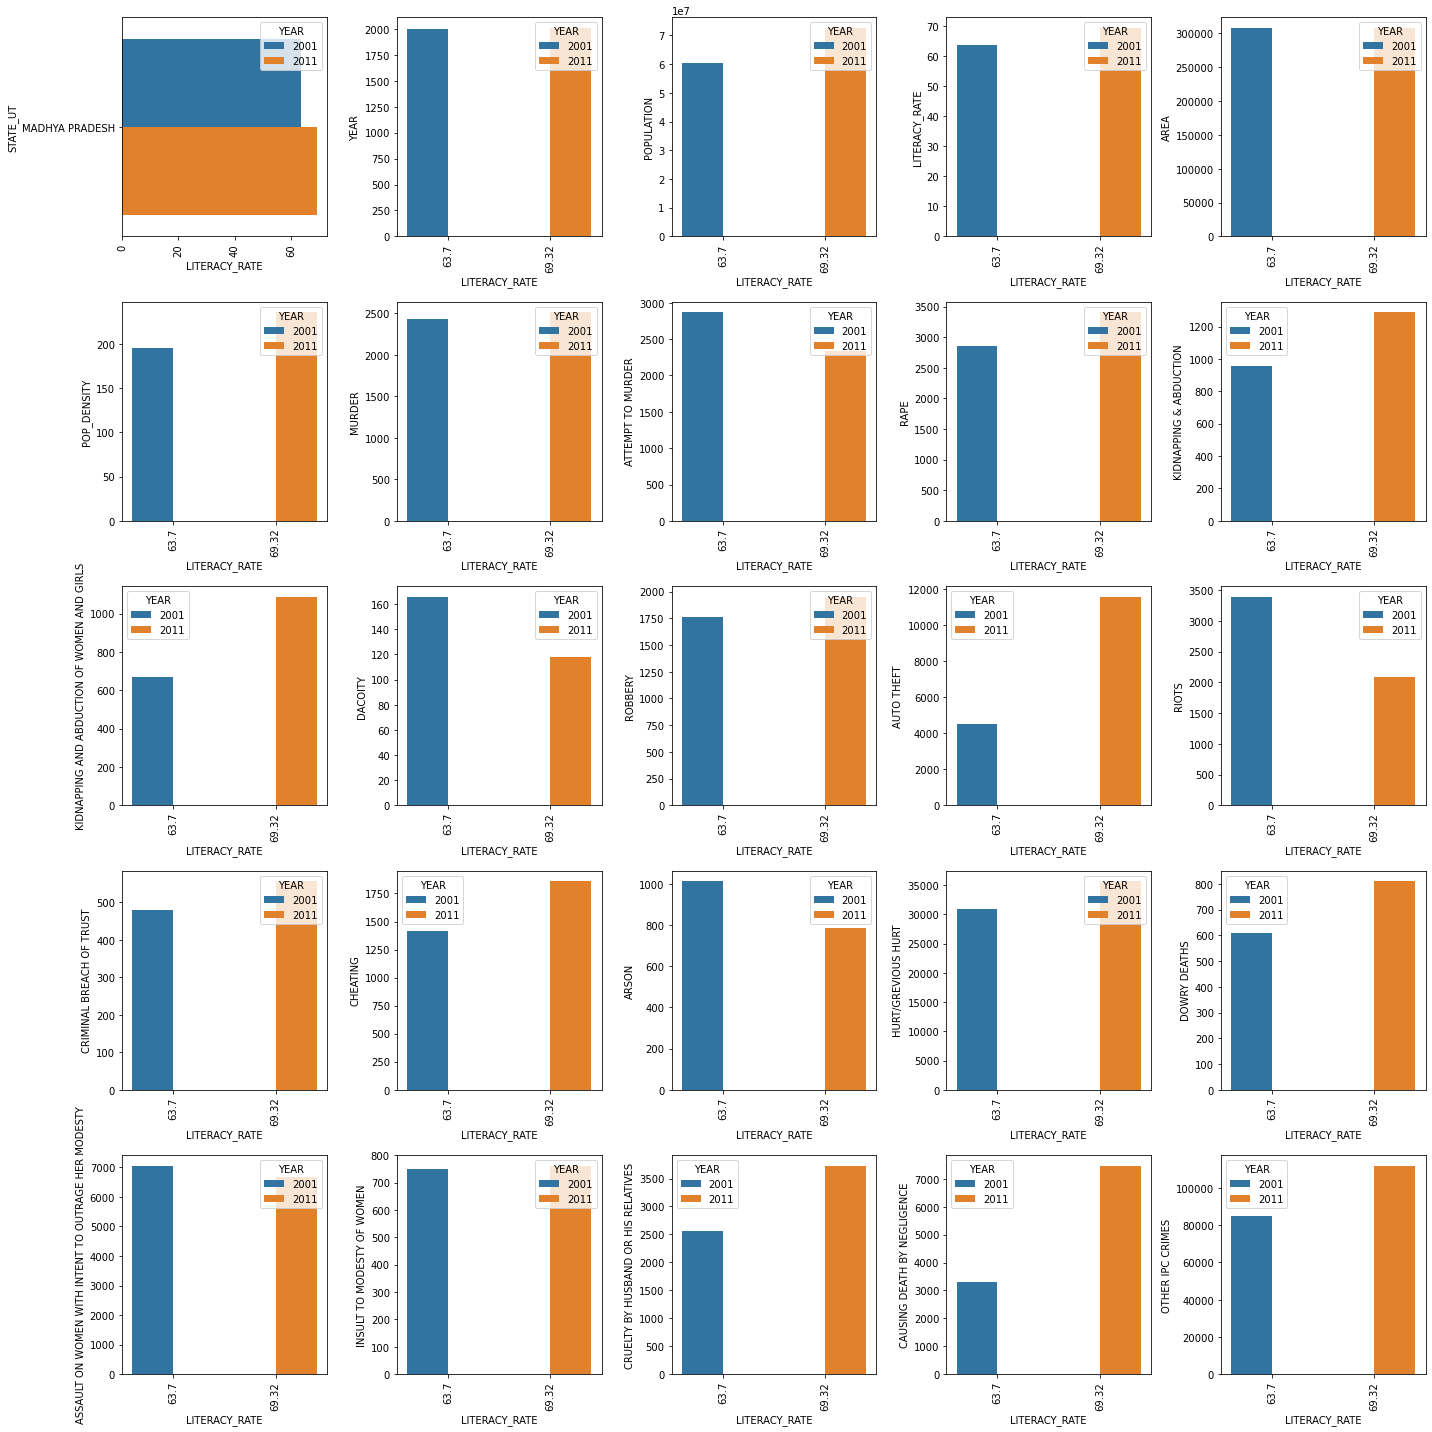

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in mp:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=mp,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  there is slight increase in kidnapping and abduction and murder but decrease in attempt to murder cases in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,assault on women with intent to outrage he modesty cases  have increased with increase in literacy rate in 2011  while insult to modesty of women cases remains same in 2011.
- Crimes related to  robbery ,hurt,auto theft,criminal breach of trust, cheating, causing death by negligence have increased with increase in literacy rate while Riots, dacoity and arson cases decreased in 2011 as compared to 2001.

**MAHARASHTRA**

In [36]:
mh=df[df['STATE_UT']=='MAHARASHTRA']
mh.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
14  MAHARASHTRA  2001    96878627          76.90  307713          315    2839   
49  MAHARASHTRA  2011   112374333          82.34  307713          365    2818   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
14               1454  1302                     985  ...   
49               2105  1701                    1669  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
14                      1542      4273   1208               30212   
49                      1883      9098   1255               29769   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
14           308                                               2823     
49           339                                               3794     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
14                        1120                                 6090   
49                        1071                                 7136   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
14                         8993             42963  
49                        13024             45114  

[2 rows x 25 columns]

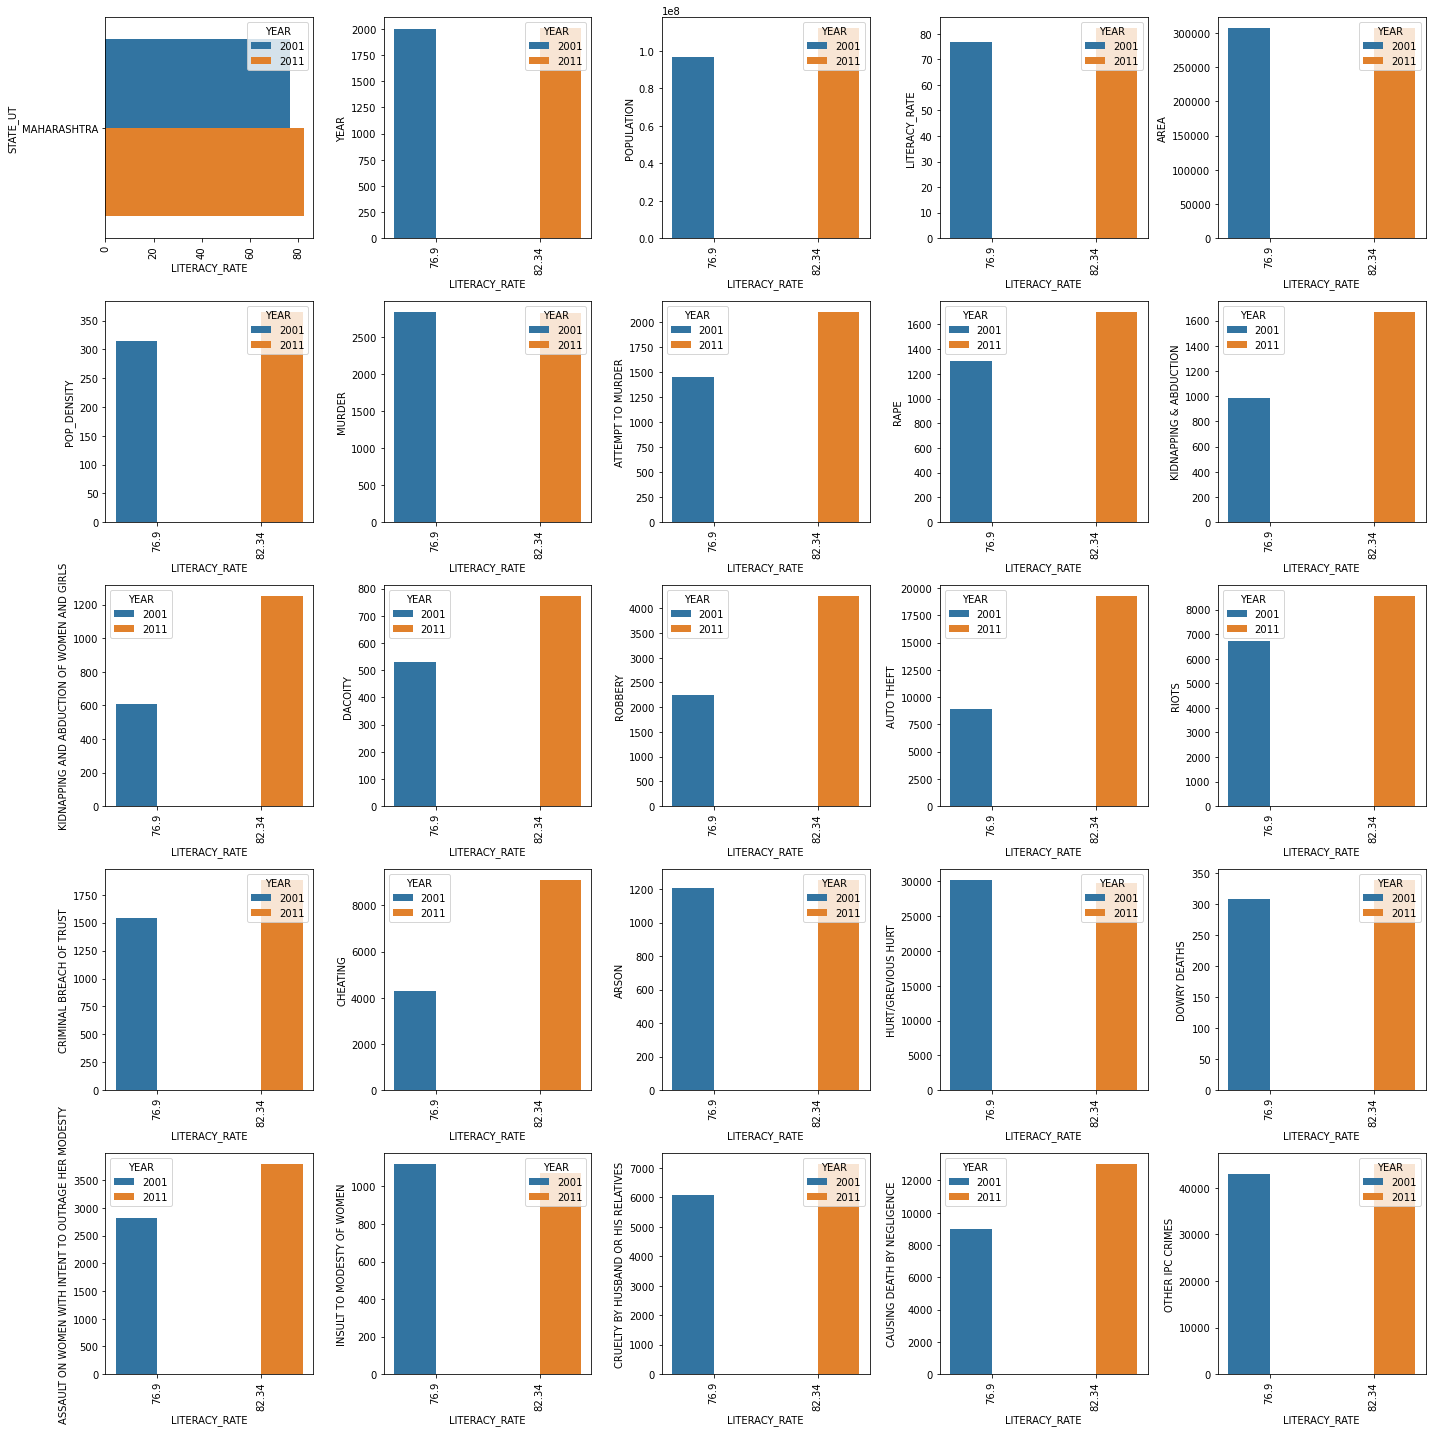

In [37]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in mh:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=mh,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy  murder cases remains same while  kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,assault on women with intent to outrage he modesty cases  have increased with increase in literacy rate in 2011  while insult to modesty of women cases slightly decrease in 2011.
- Crimes related to  dacoity, robbery ,Riots, auto theft,criminal breach of trust, cheating, arson, causing death by negligence have increased with increase in literacy rate while hurt cases almost same in 2011 as compared to 2001.

**MANIPUR**

In [38]:
manipur=df[df['STATE_UT']=='MANIPUR']
manipur.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
15  MANIPUR  2001     2293896          70.50  22327          103     209   
50  MANIPUR  2011     2721756          79.21  22327          122      78   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
15                168    20                      94  ...   
50                245    53                     169  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
15                        33        66     64                 201   
50                        42       126     99                 292   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
15             0                                                 21     
50             1                                                 38     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
15                           0                                    5   
50                           0                                   39   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
15                            7              1097  
50                            2              1015  

[2 rows x 25 columns]

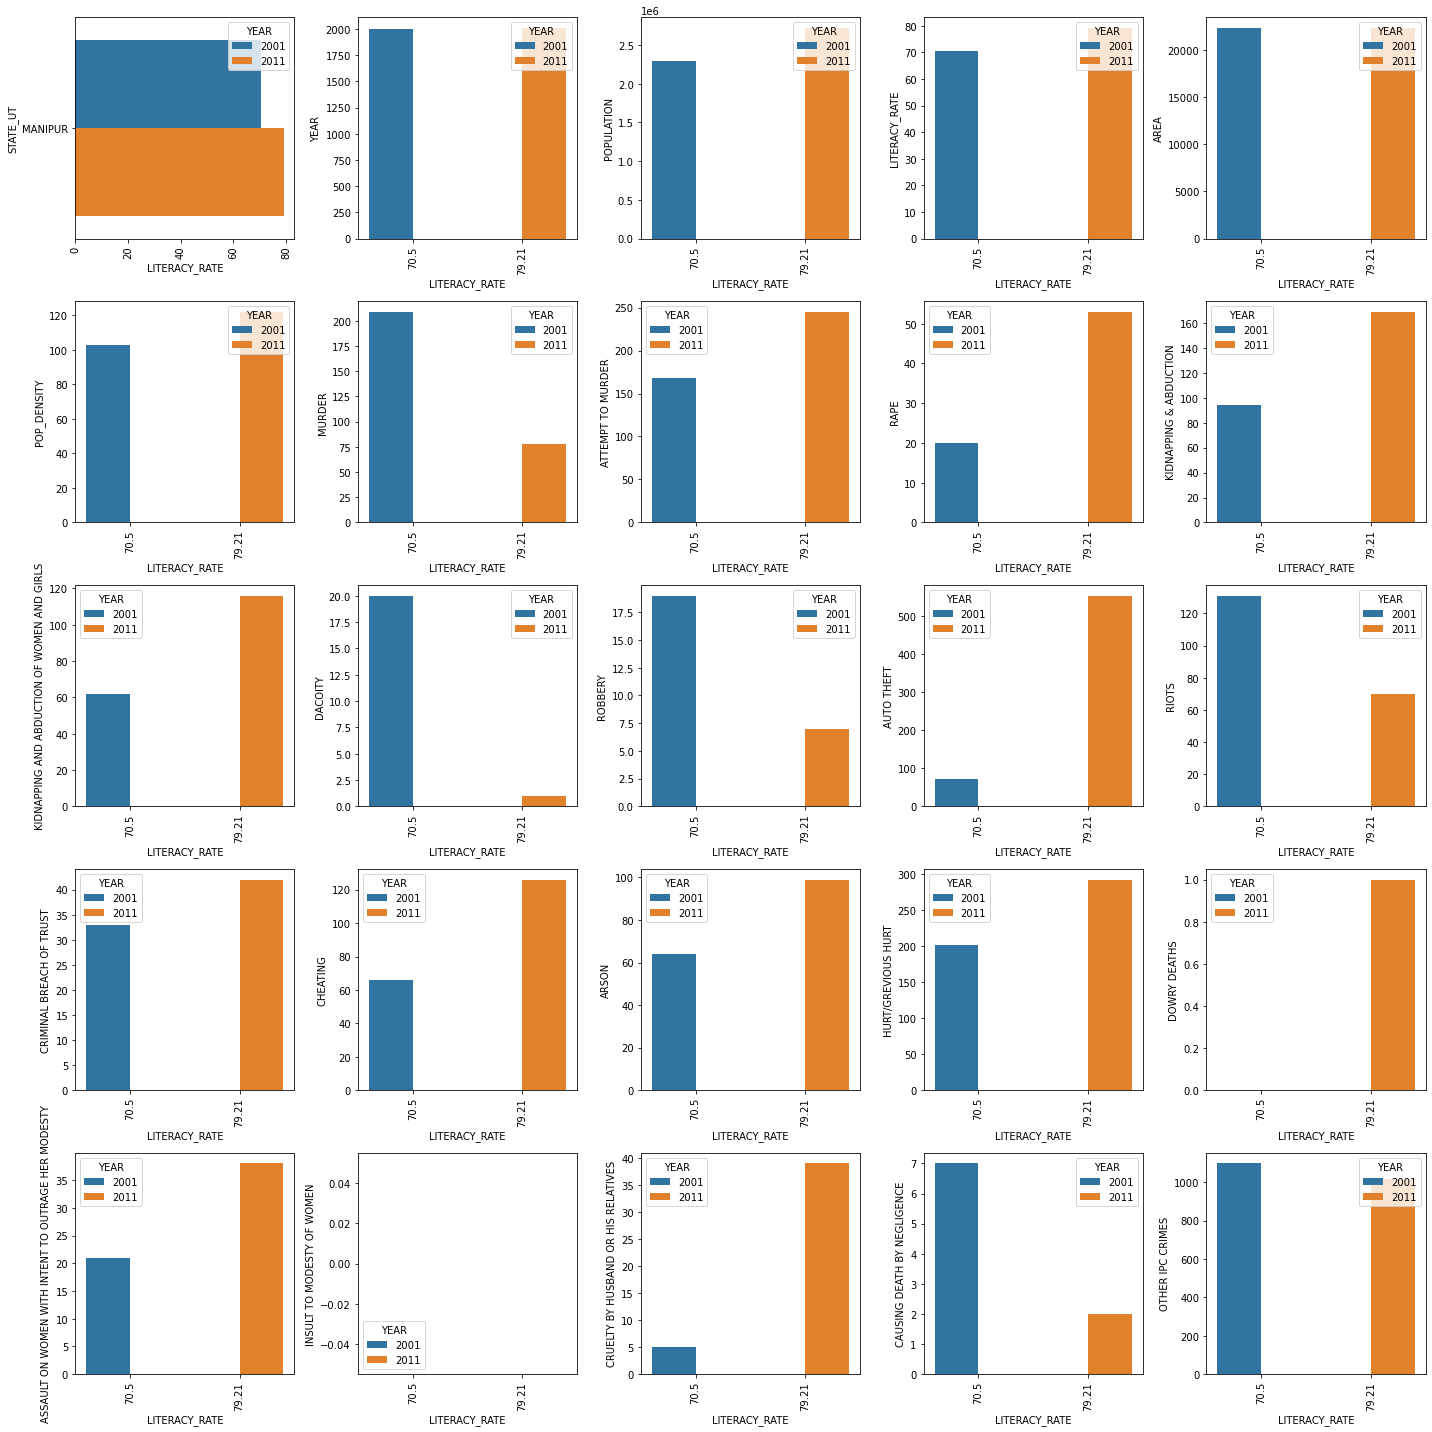

In [39]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in manipur:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=manipur,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy   murder cases decreases while  kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,assault on women with intent to outrage he modesty cases  have increased with increase in literacy rate in 2011.
- Crimes related to auto theft,criminal breach of trust, cheating, arson,hurt,  have increased with increase in literacy rate while dacoity, robbery, Riots, causing death by negligence  cases decreased in 2011 as compared to 2001.

**MEGHALAYA**

In [40]:
meghalaya=df[df['STATE_UT']=='MEGHALAYA']
meghalaya.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
16  MEGHALAYA  2001     2318822          62.50  22429          103     164   
51  MEGHALAYA  2011     2966889          74.43  22429          132     170   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
16                 47    26                      55  ...   
51                 51   130                      87  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
16                        19        29     26                 102   
51                        52       166     34                 197   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
16             0                                                 25     
51             1                                                 74     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
16                           0                                    4   
51                           1                                   21   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
16                            0               511  
51                           90               701  

[2 rows x 25 columns]

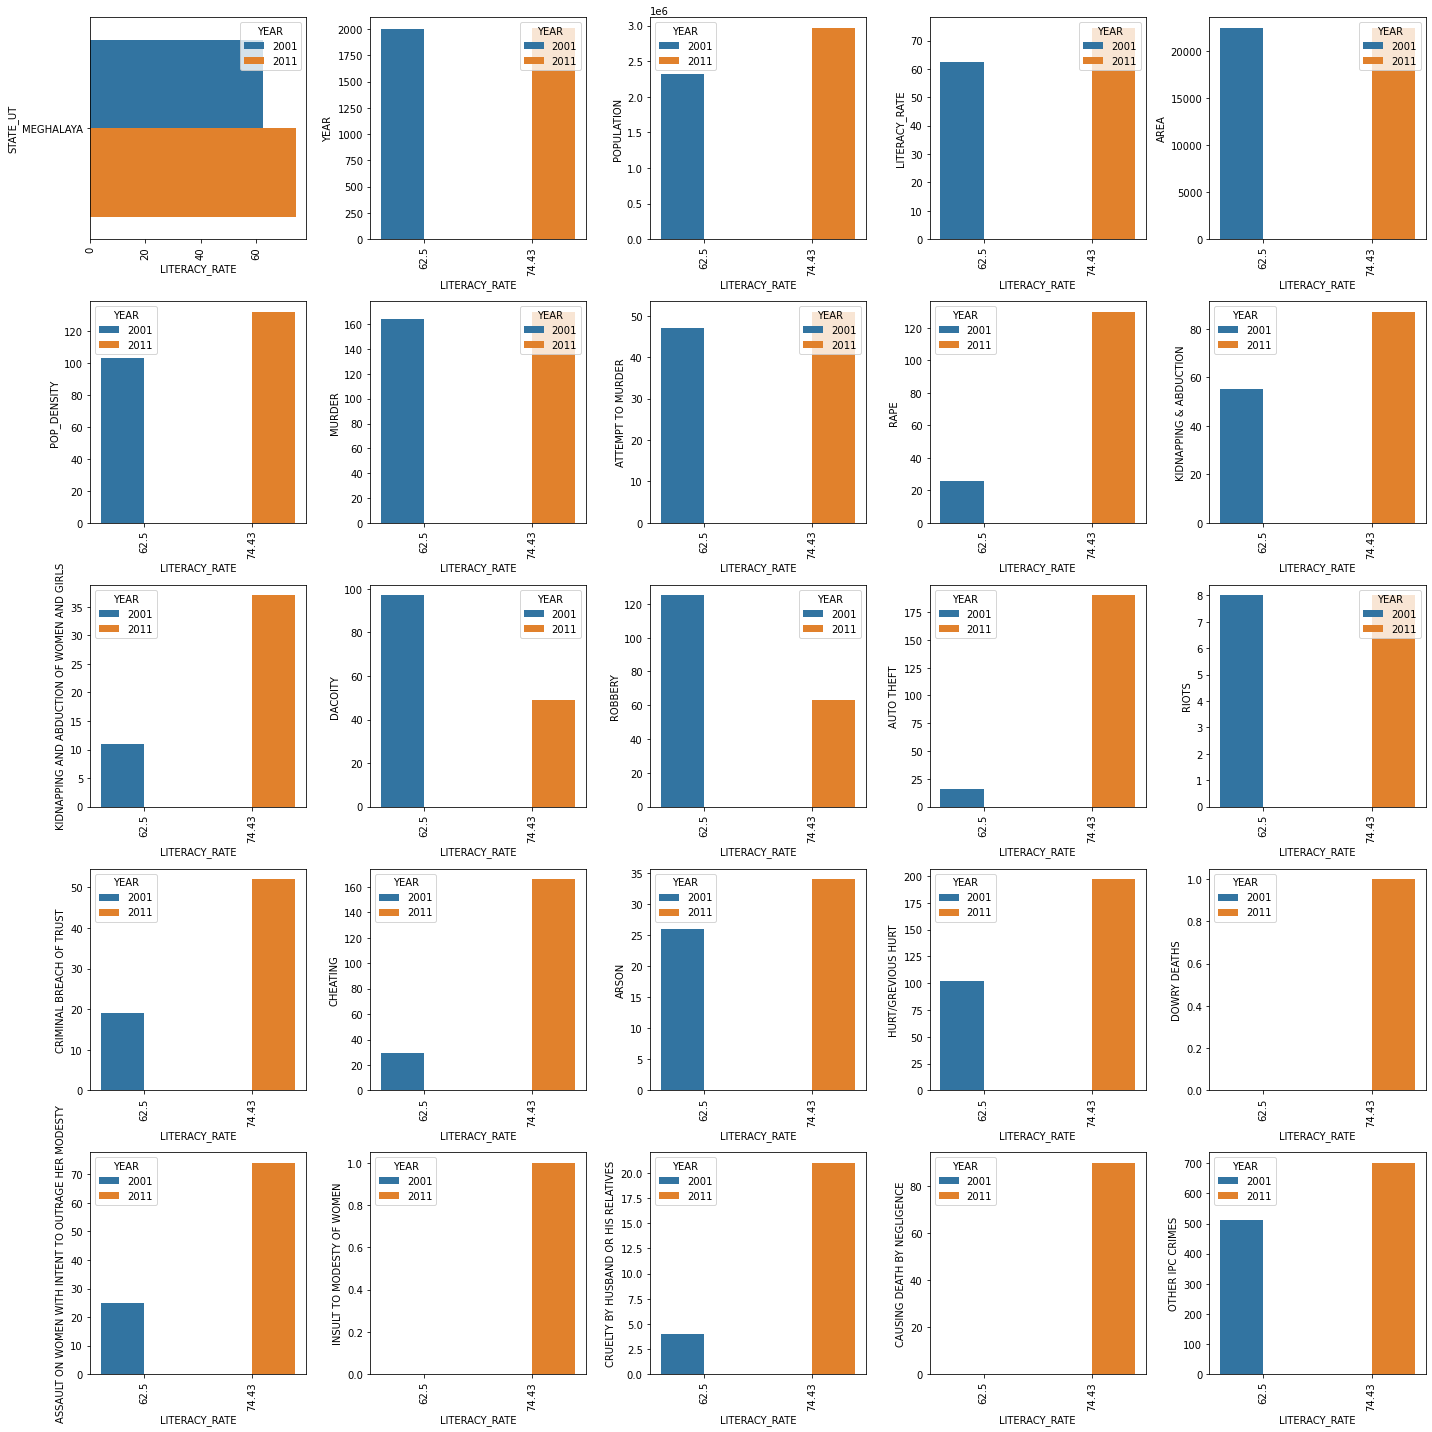

In [41]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in meghalaya:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=meghalaya,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder cases, kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,assault on women with intent to outrage he modesty cases  have increased with increase in literacy rate in 2011.
- Crimes related to auto theft,criminal breach of trust, cheating, arson,hurt, causing death by negligence have increased with increase in literacy rate while dacoity, robbery cases decreased in 2011 as compared to 2001.

**MIZORAM**

In [42]:
mizo=df[df['STATE_UT']=='MIZORAM']
mizo.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
17  MIZORAM  2001      888573          88.80  21081           42      31   
52  MIZORAM  2011     1097206          91.33  21081           52      26   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
17                 15    52                       2  ...   
52                 24    77                       6  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
17                        23        71     24                  94   
52                        21        66     19                  97   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
17             0                                                 52     
52             0                                                 72     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
17                           0                                   16   
52                           1                                    9   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
17                           23               499  
52                           37               279  

[2 rows x 25 columns]

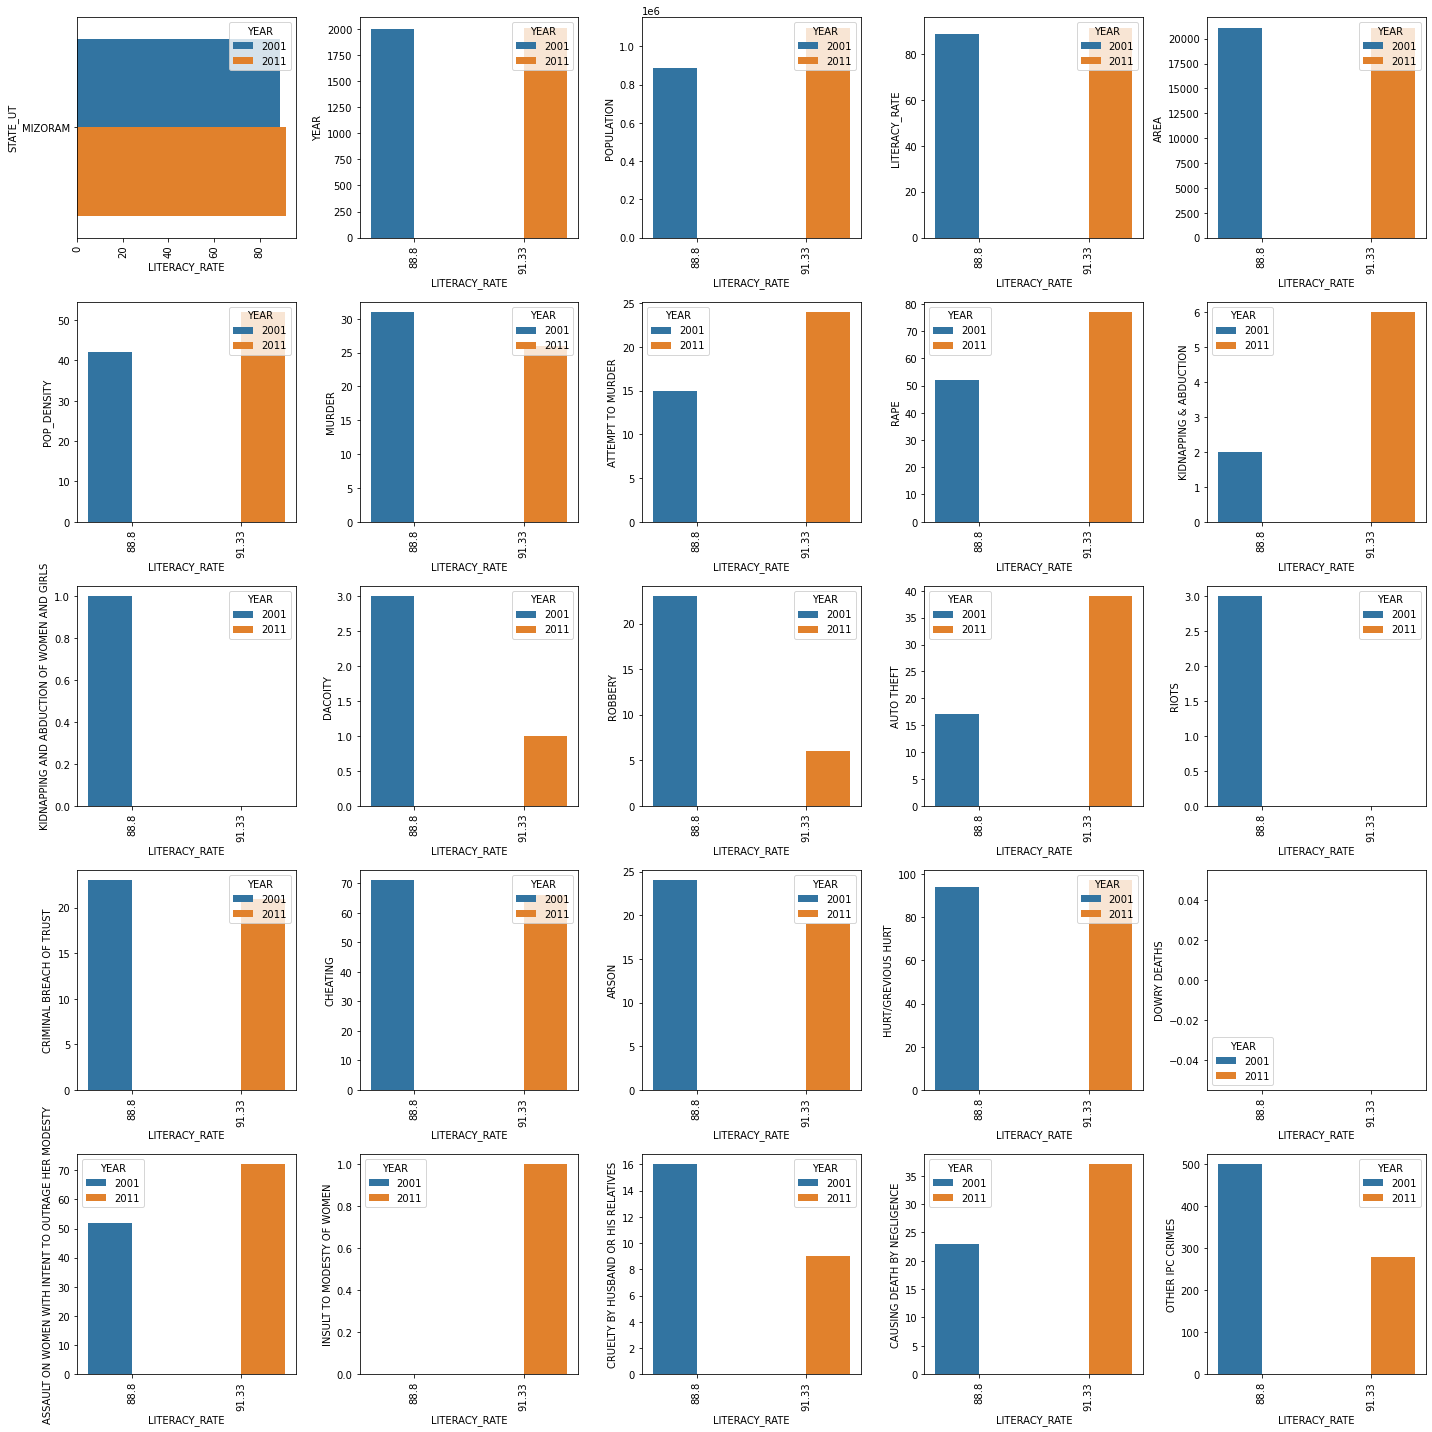

In [43]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in mizo:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=mizo,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder cases decrease while kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape, ,assault on women with intent to outrage he modesty cases  have increased with increase while cruelty by husband and family cases decreases in literacy rate in 2011.
- Crimes related to auto theft, hurt, causing death by negligence have increased with increase in literacy rate while dacoity, robbery,criminal breach of trust, cheating, arson cases decreased in 2011 as compared to 2001.

**NAGALAND**

In [44]:
nagaland=df[df['STATE_UT']=='NAGALAND']
nagaland.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
18  NAGALAND  2001     1990036          66.60  16579          120     101   
53  NAGALAND  2011     1978502          79.55  16579          119      46   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
18                 39    17                      23  ...   
53                 43    23                      34  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
18                        20        34      1                  37   
53                        16        31      2                  55   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
18             0                                                  6     
53             0                                                  9     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
18                           0                                    0   
53                           0                                    1   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
18                           19               363  
53                           15               292  

[2 rows x 25 columns]

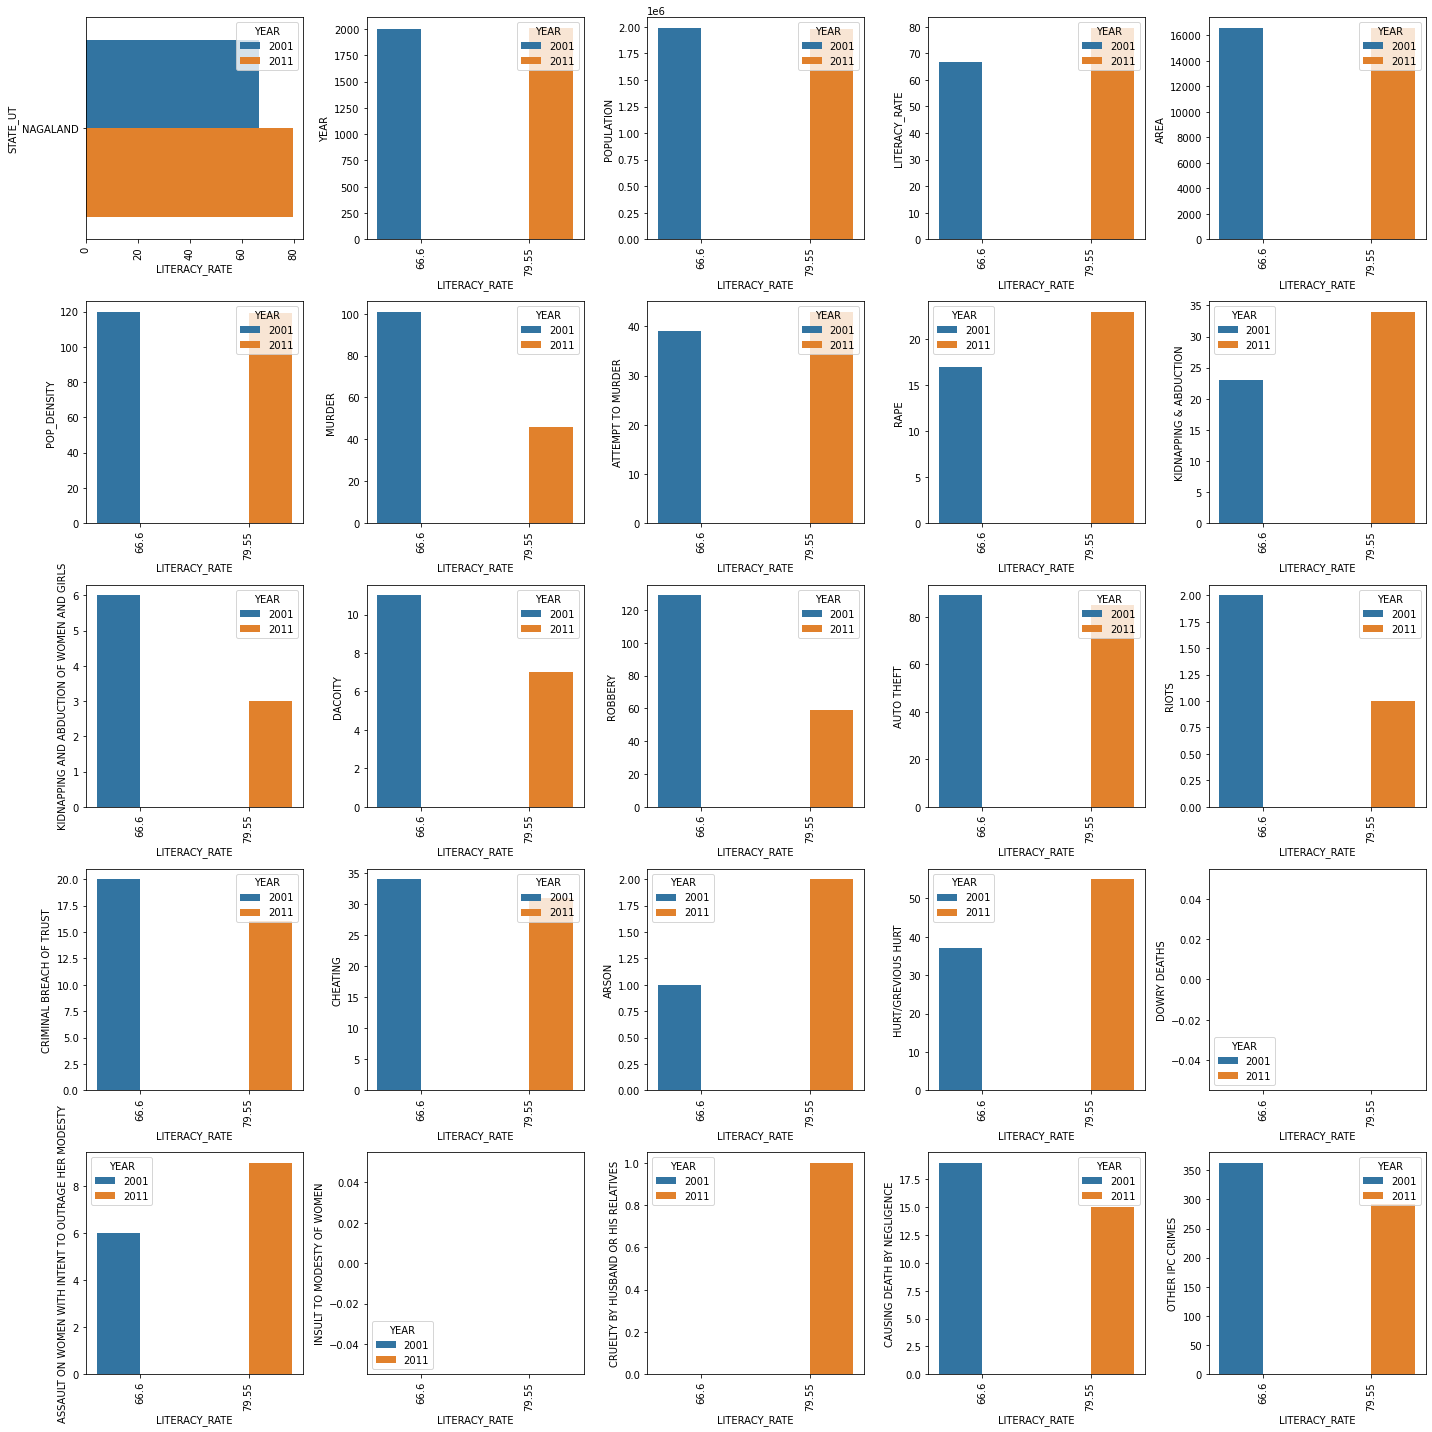

In [45]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in nagaland:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=nagaland,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder cases decreases while kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape,  cruelty by husband and family cases  have increased with increase in literacy rate while kidnapping and abduction of women and girls cases decreased with increase in literacy rate in 2011.
- Crimes related to dacoity, robbery, auto theft arson,hurt have increased with increase in literacy rate while ,riots, criminal breach of trust, cheating and causing death by negligence  cases decreased in 2011 as compared to 2001.

**ODISHA**

In [46]:
odisha=df[df['STATE_UT']=='ODISHA']
odisha.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
19   ODISHA  2001    36804660          63.10  155707          236     987   
54   ODISHA  2011    41974218          72.87  155707          269    1477   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
19               1151   790                     522  ...   
54               1621  1112                    1139  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
19                       285       681    423                4367   
54                       250      1391    423                7894   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
19           294                                               1655     
54           465                                               3207     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
19                         458                                 1266   
54                         235                                 2320   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
19                         1589             20810  
54                         3778             20509  

[2 rows x 25 columns]

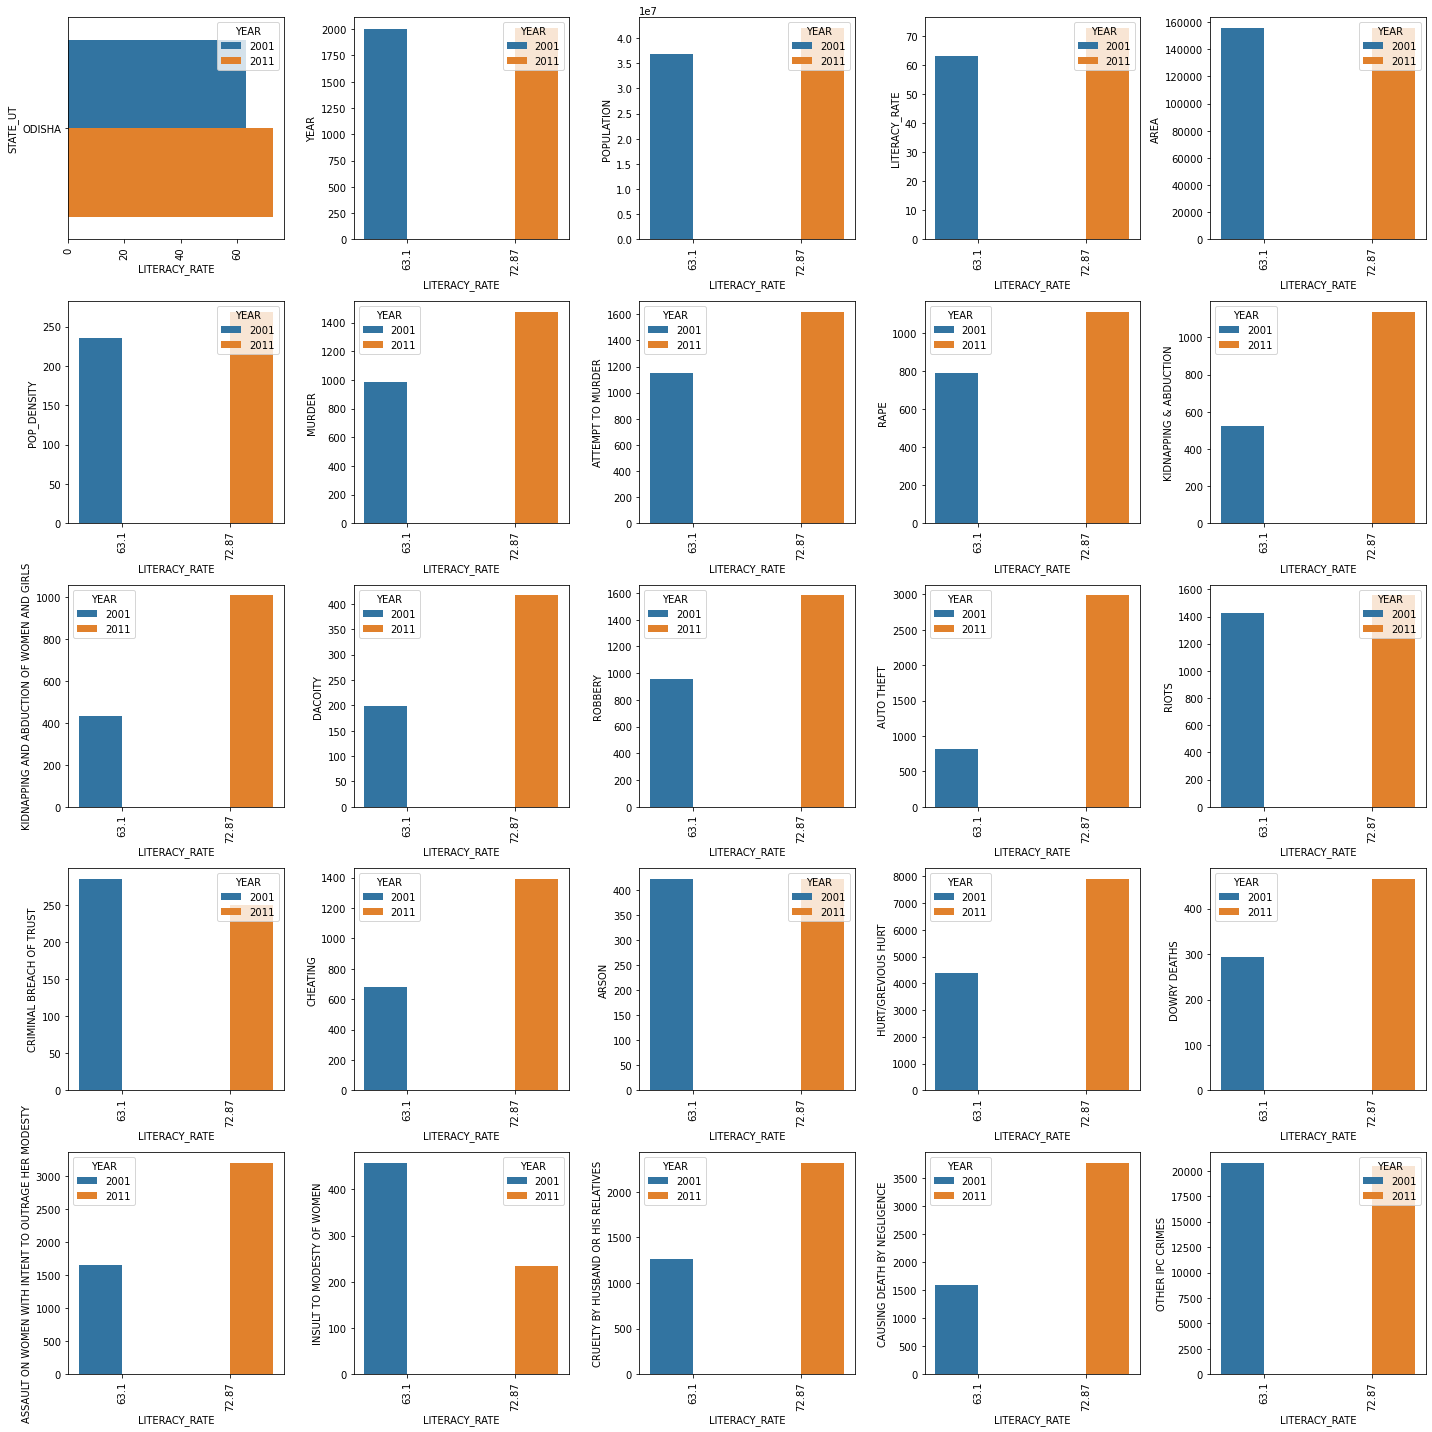

In [47]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in odisha:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=odisha,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape, ,dowry deaths,kidnapping and abduction of women and girls, cruelty by husband and family,assault on women with intent to outrage he modesty cases  have increased while insult to modesty of women is decreased with increase in literacy rate in 2011.
- Crimes related to dacoity,robbery, auto theft,riots, , cheating, arson,hurt, causing death by negligence have increased with increase in literacy rate while criminal breach of trust cases have decreased in 2011 as compared to 2001.Cases related to ARSON remained same in 2001 and 2011.

**PUNJAB**

In [48]:
pb=df[df['STATE_UT']=='PUNJAB']
pb.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
20   PUNJAB  2001    24358999          69.70  50362          484     738   
55   PUNJAB  2011    27743338          75.84  50362          550     842   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
20                789   298                     513  ...   
55                997   479                     681  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
20                       368      2621     63                3996   
55                       281      3571     83                4757   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
20           159                                                372     
55           143                                                282     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
20                          47                                 1128   
55                          31                                 1136   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
20                         2154              9204  
55                         3576             10175  

[2 rows x 25 columns]

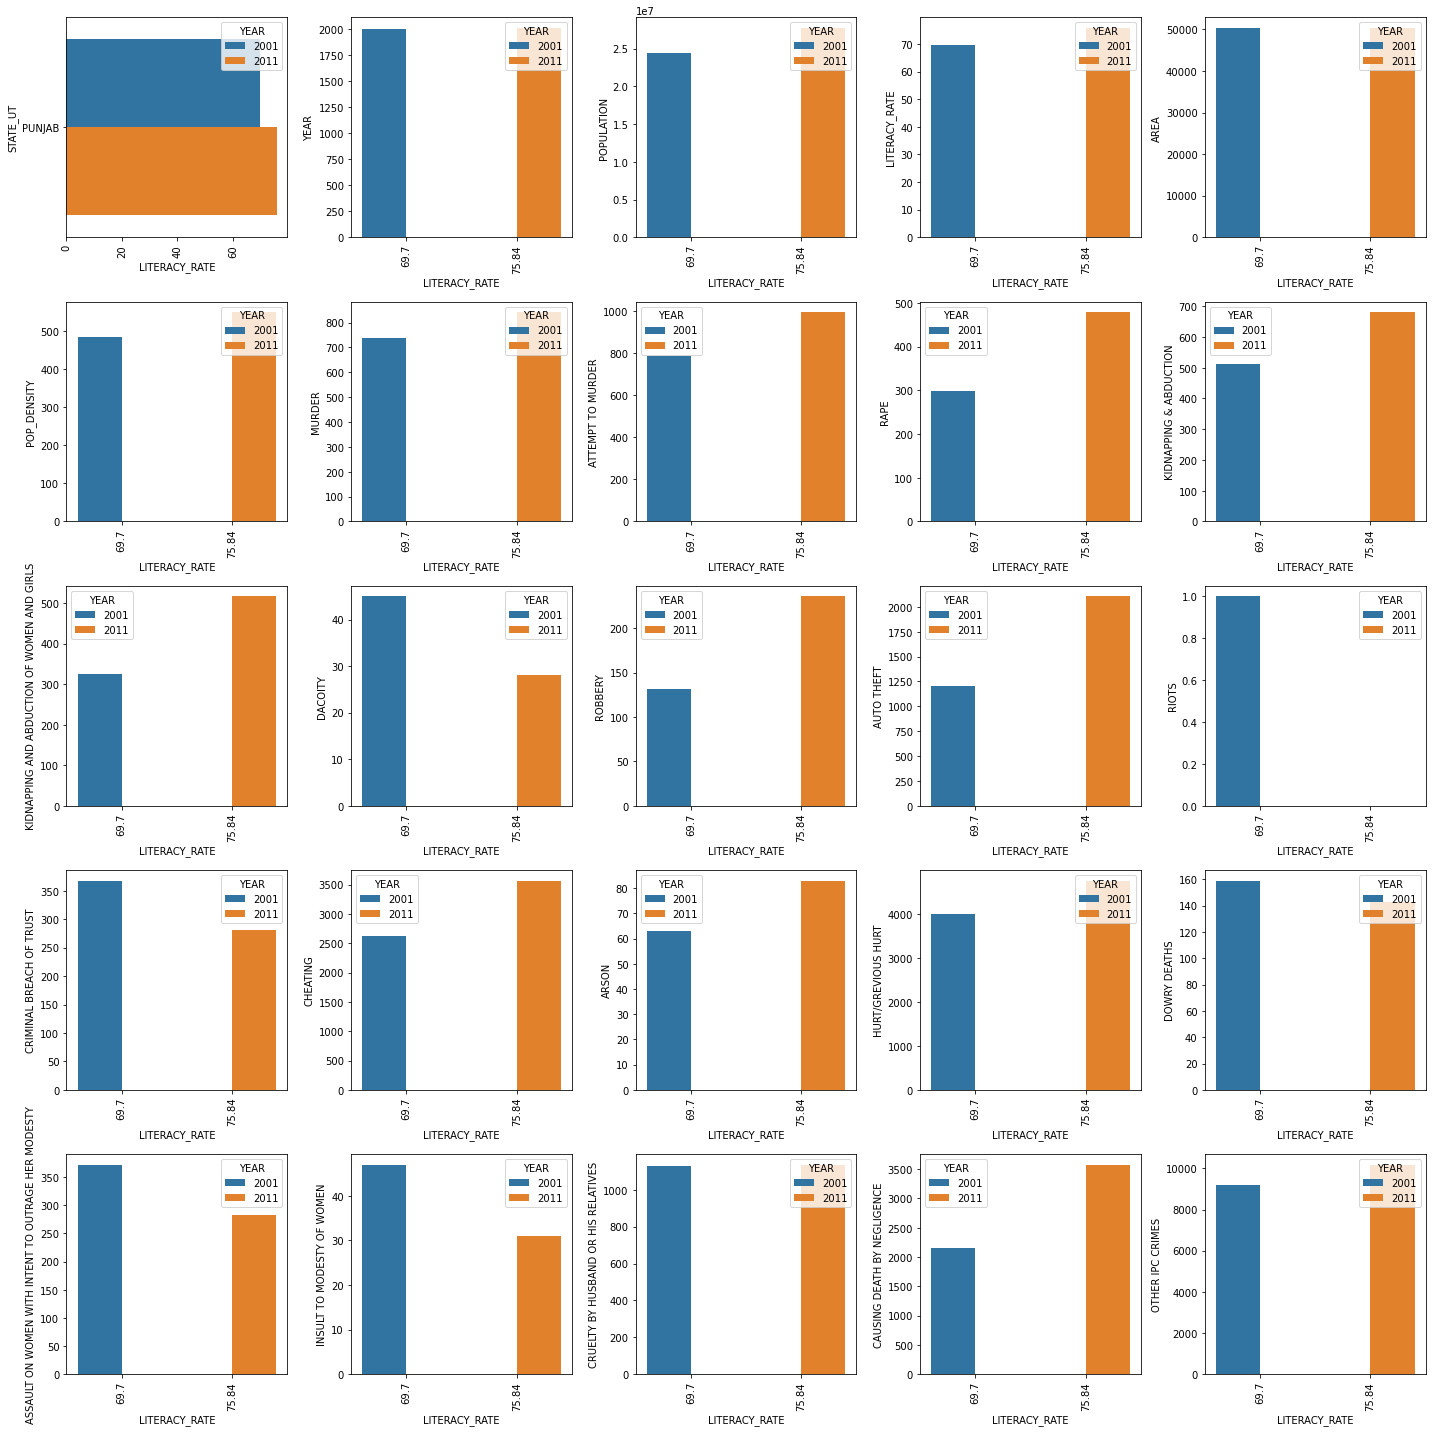

In [49]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in pb:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=pb,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, kidnapping and abduction and attempt to murder cases increases in 2011.
- Crimes on women and children such as Rape,kidnapping and abduction of women and girls  have increased with increase in literacy rate while dowry deaths,assault on women with intent to outrage he modesty, insult to modesty of women cases decreased with decrease in literacy rate in 2011 while cruelty by husband and family remains same in 2011.
- Crimes related to robbery, auto theft,, cheating, arson,hurt, causing death by negligence have increased with increase in literacy rate while dacoity, criminal breach of trust  cases decreased in 2011 as compared to 2001.

**RAJASTHAN**

In [50]:
rj=df[df['STATE_UT']=='RAJASTHAN']
rj.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
21  RAJASTHAN  2001    56507188          60.10  342239          165    1259   
56  RAJASTHAN  2011    68548437          66.11  342239          201    1461   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
21               1923  1049                    2718  ...   
56               1566  1800                    3204  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
21                      1026      6644   1092               27485   
56                       741     17497    473               17977   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
21           376                                               2878     
56           514                                               2447     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
21                          56                                 5532   
56                           9                                12218   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
21                         4221             62347  
56                         8122             70250  

[2 rows x 25 columns]

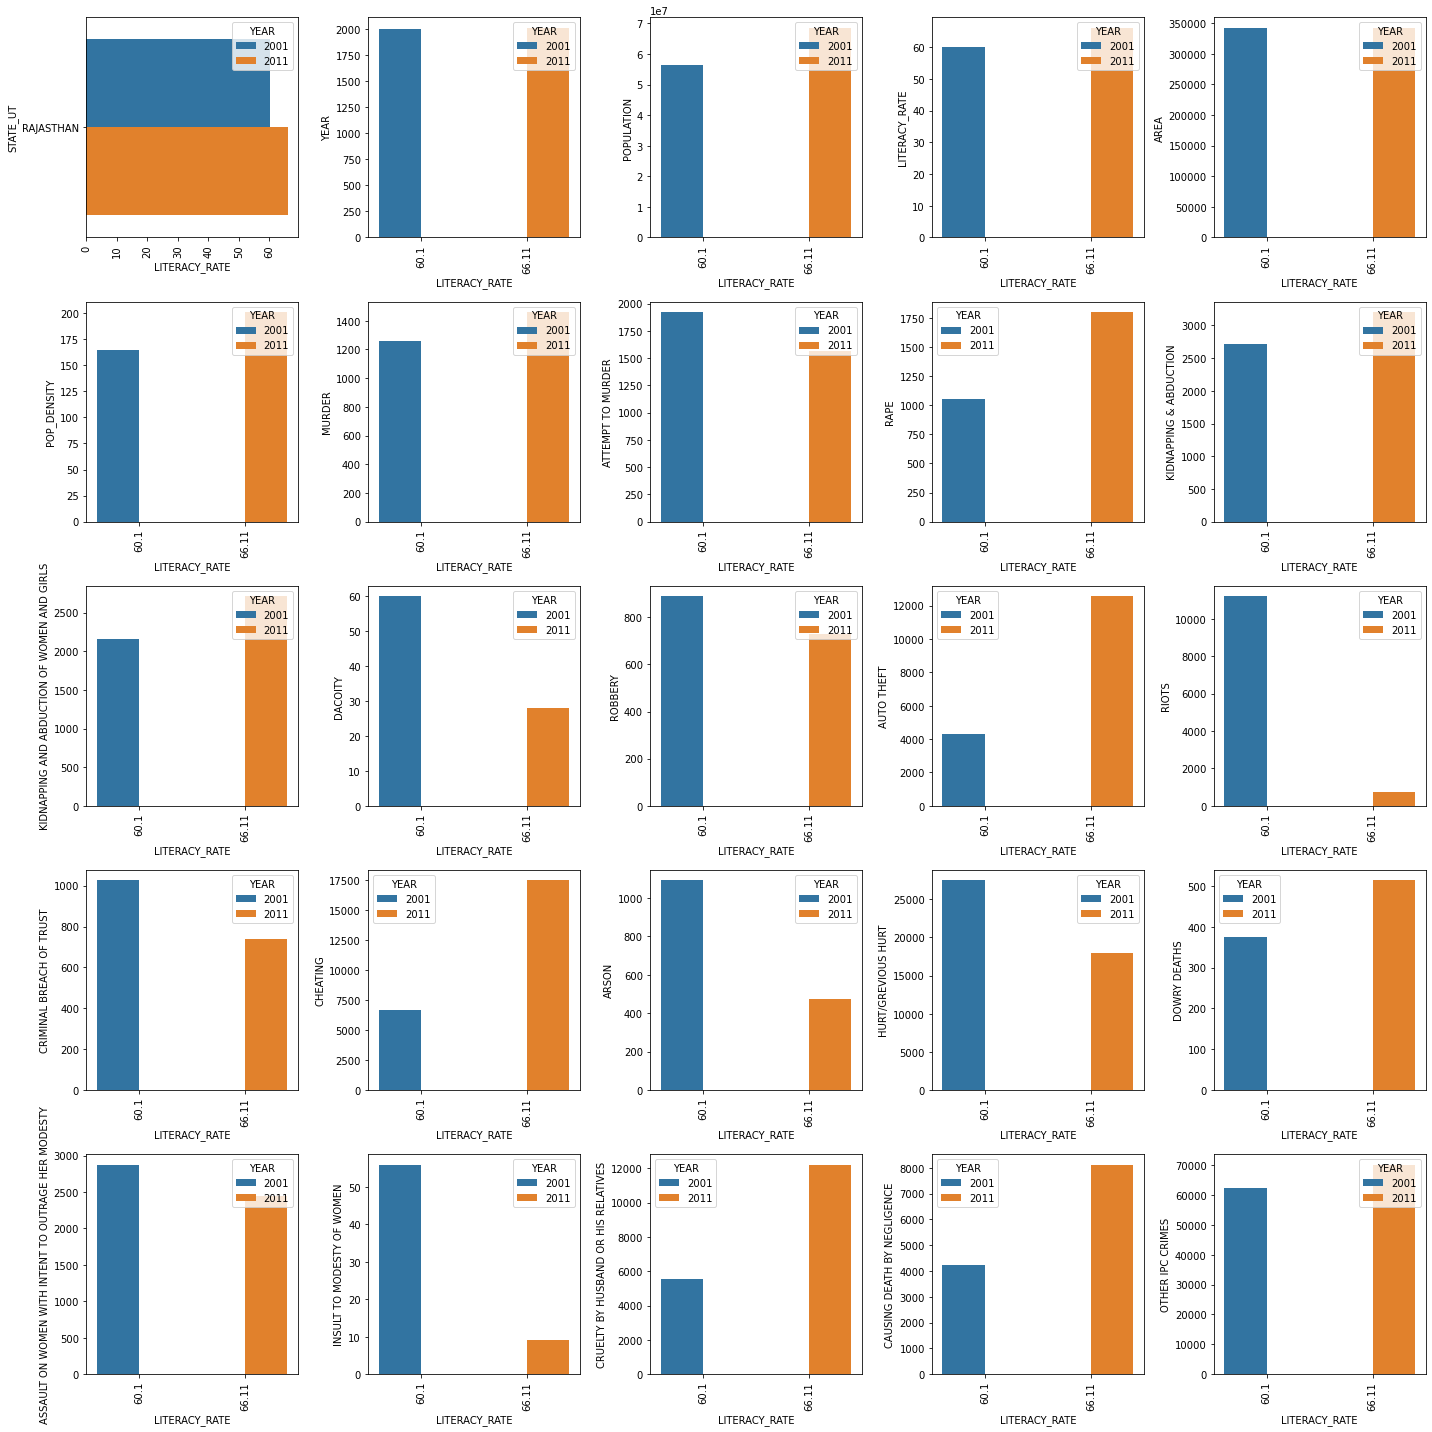

In [51]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in rj:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=rj,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder cases and kidnapping and abduction increases while  attempt to murder cases decreases in 2011.
- Crimes on women and children such as Rape, ,dowry deaths, kidnapping and abduction of women and girls, cruelty by husband and family  have increased with increase in literacy rate while assault on women with intent to outrage he modesty and insult to modesty of women cases decreased with increase in literacy rate in 2011.
- Crimes related to auto theft, cheating,  causing death by negligence have increased with increase in literacy rate while dacoity, robbery,riots,criminal breach of trust,arson,hurt cases decreased in 2011 as compared to 2001.

**SIKKIM**

In [52]:
sikkim=df[df['STATE_UT']=='SIKKIM']
sikkim.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
22   SIKKIM  2001      540851          68.80  7096           76      19   
57   SIKKIM  2011      610577          81.42  7096           86      14   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
22                 11     8                       6  ...   
57                  7    16                      10  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
22                         1        13      1                  35   
57                         4        31      4                  75   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
22             0                                                  0     
57             0                                                 24     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
22                          14                                    0   
57                           0                                    4   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
22                            7               166  
57                           57               177  

[2 rows x 25 columns]

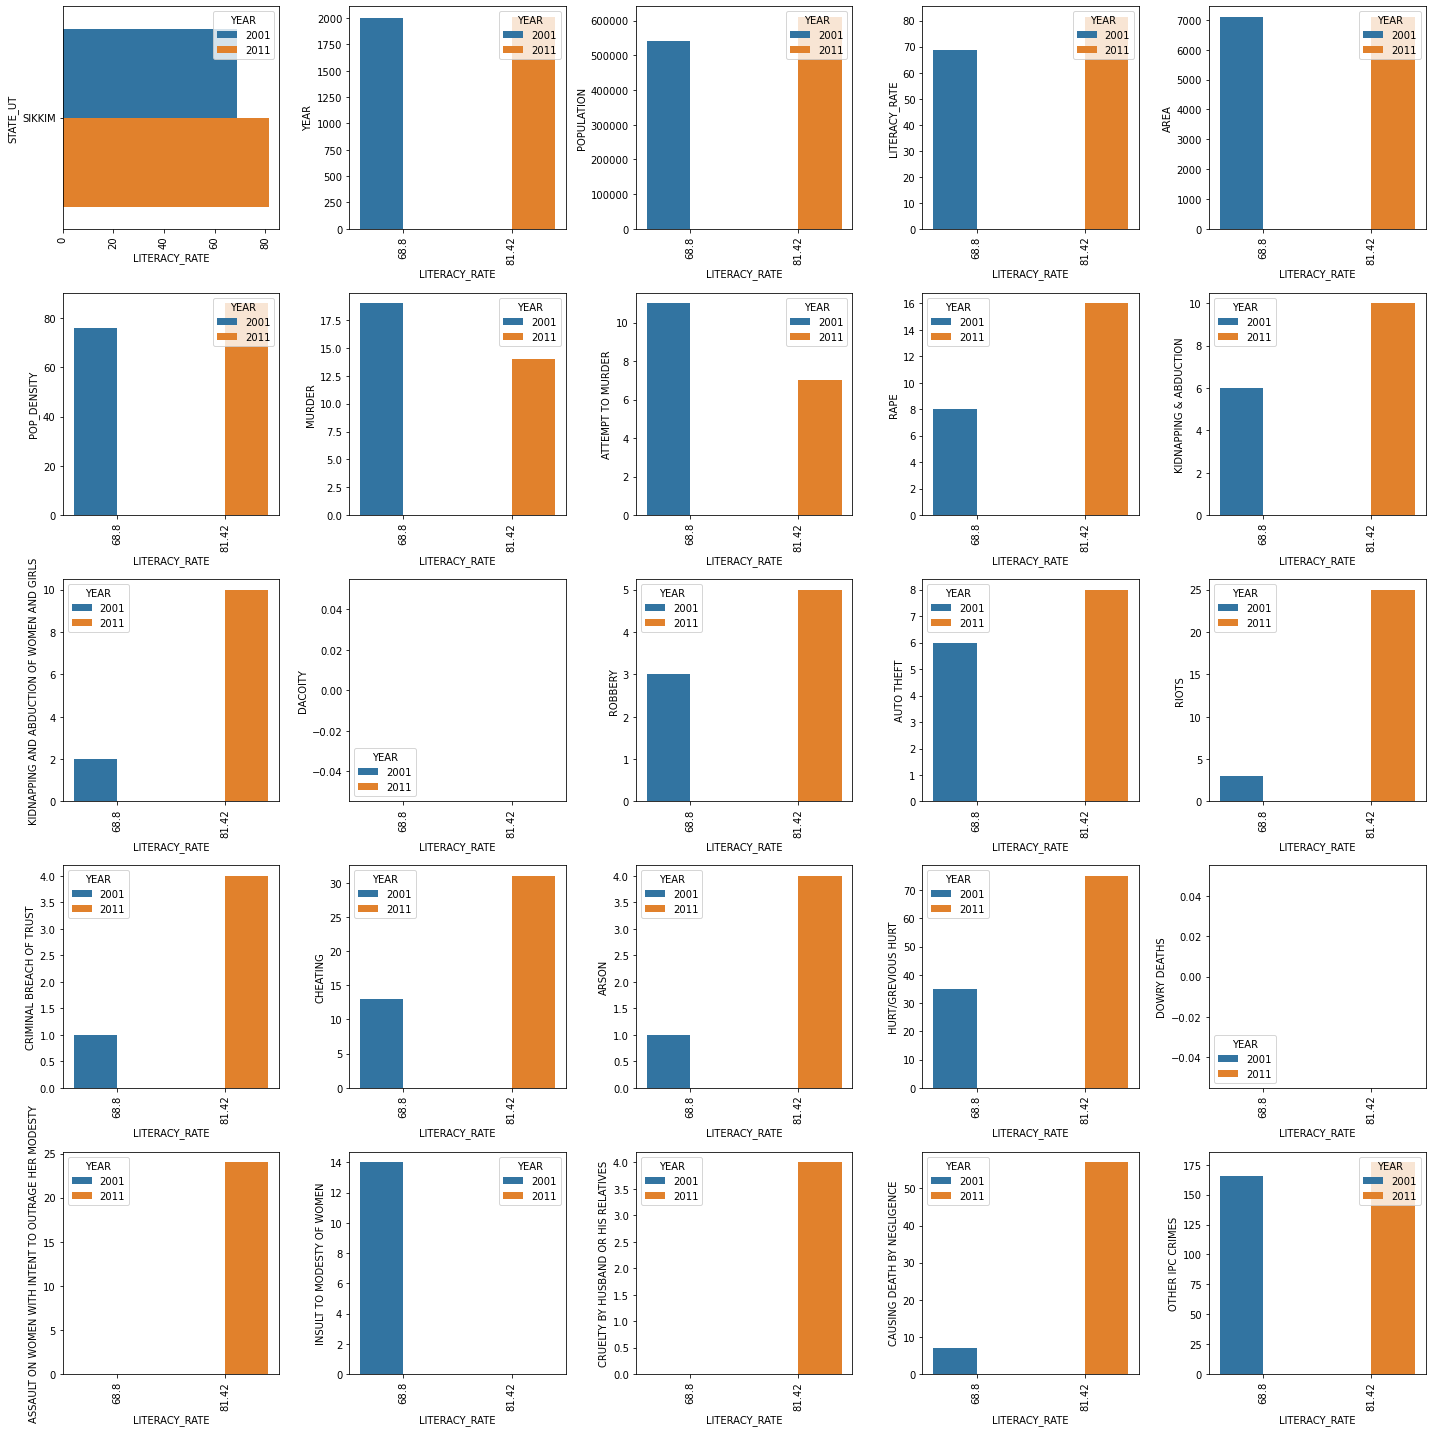

In [53]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in sikkim:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=sikkim,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder and attempt to murder decreases while kidnapping and abduction cases increases in 2011.
- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls, cruelty by husband and family and assault on women with intent to outrage he modesty cases have increased with increase in literacy rate while insult to modesty of women cases decreased with increase in literacy rate in 2011.
- Crimes related to robbery, auto theft, riots,criminal breach of trust, cheating,,arson,hurt, causing death by negligence have increased with increase in literacy rate.

**TAMIL NADU**

In [54]:
tamil=df[df['STATE_UT']=='TAMIL NADU']
tamil.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  MURDER  \
23  TAMIL NADU  2001    62405679          73.50  130058          480    1662   
58  TAMIL NADU  2011    72147030          80.09  130058          555    1877   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
23               2204   423                     952  ...   
58               2962   677                    1984  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
23                       360      2139    980               28429   
58                       238      3872    706               21167   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
23           191                                               1773     
58           152                                               1467     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
23                        1012                                  815   
58                         464                                 1812   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
23                         8550             76468  
58                        16076            115163  

[2 rows x 25 columns]

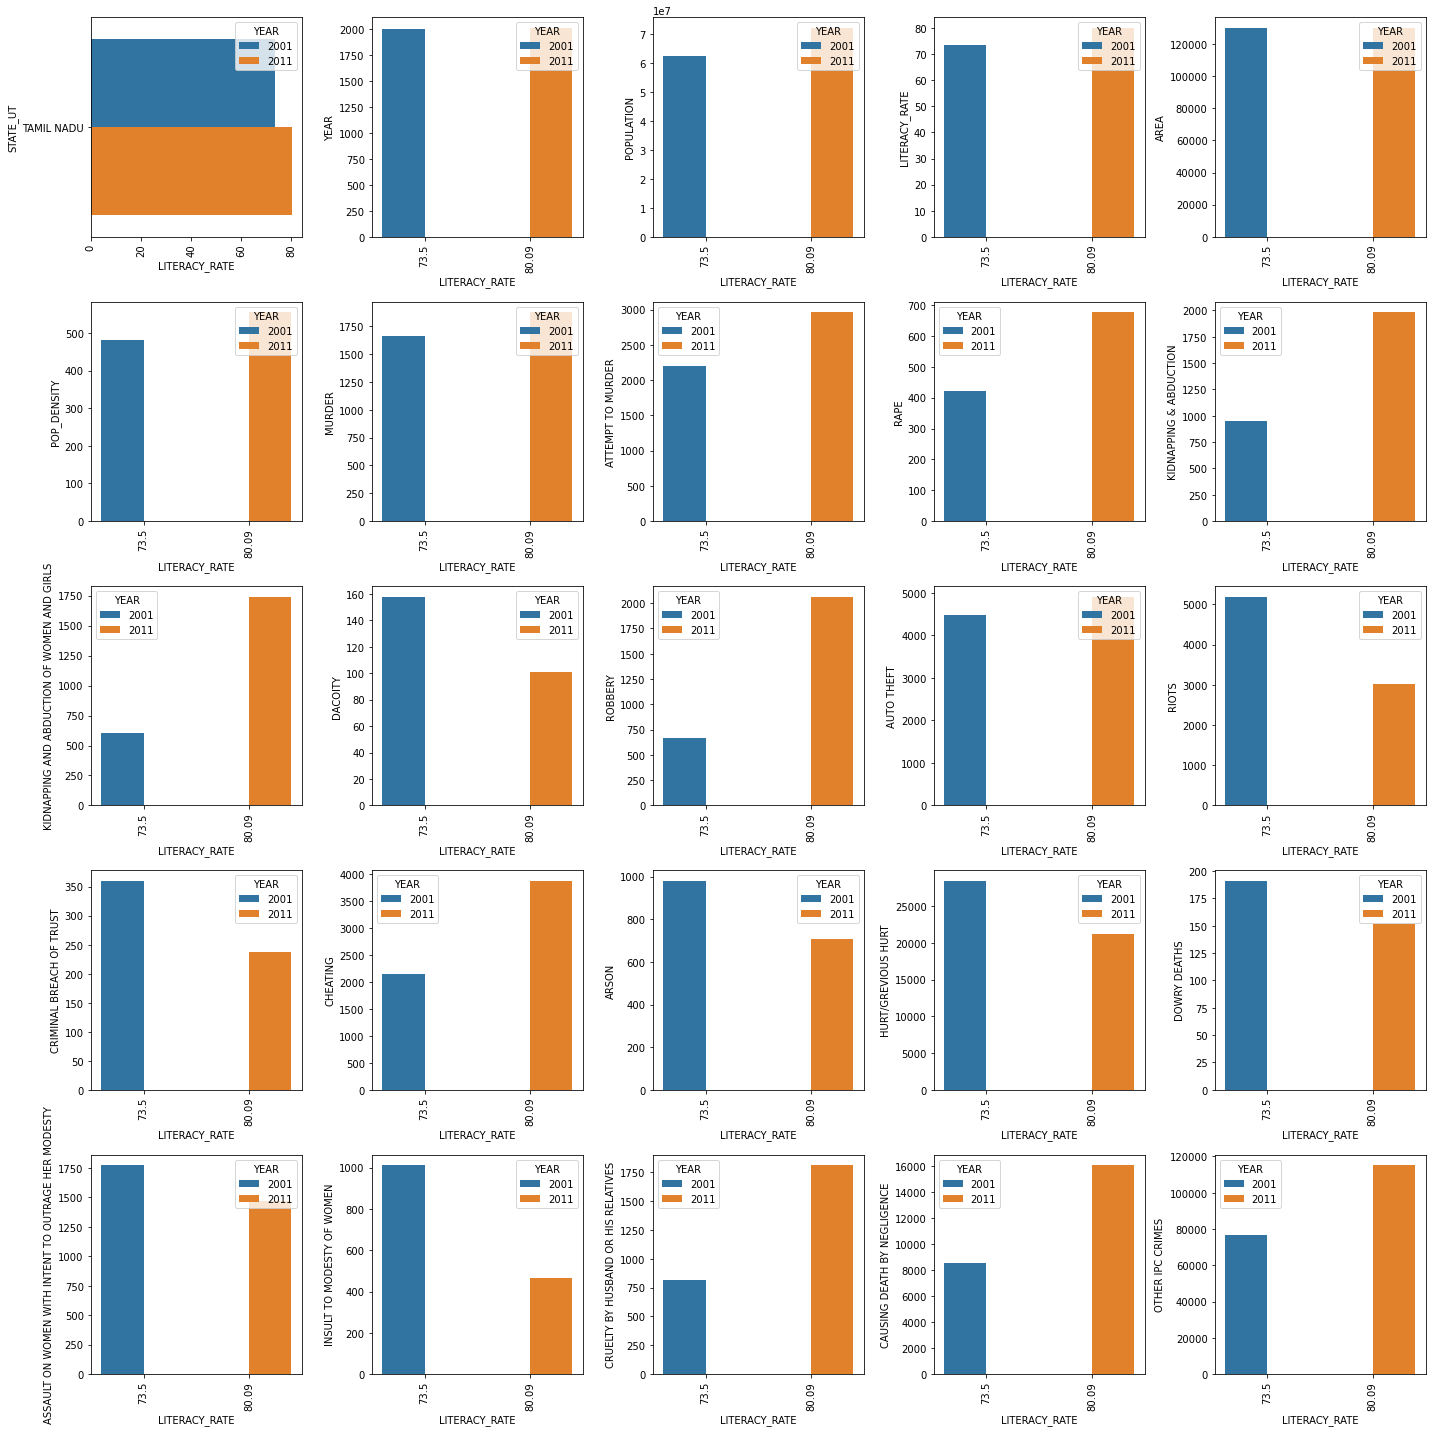

In [55]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in tamil:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=tamil,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder decreases and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls, cruelty by husband and family  cases have increased with increase in literacy rate while insult to modesty of women,dowry deaths,assault on women with intent to outrage her modesty cases decreased with increase in literacy rate in 2011.

- Crimes related to robbery, auto theft, cheating causing death by negligence have increased with increase in literacy rate and dacoity,riots,criminal breach of trust, arson,hurt cases have been drcreased with increase in literacy rate.

**TRIPURA**

In [56]:
tripura=df[df['STATE_UT']=='TRIPURA']
tripura.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
24  TRIPURA  2001     3199203          73.20  10486          305     240   
59  TRIPURA  2011     3673917          87.22  10486          350     163   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
24                 25   102                      93  ...   
59                 75   205                     154  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
24                         4        17     31                 412   
59                        54        99     58                1340   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
24            16                                                 58     
59            30                                                294     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
24                           0                                  227   
59                           9                                  702   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
24                           31               855  
59                           14              1640  

[2 rows x 25 columns]

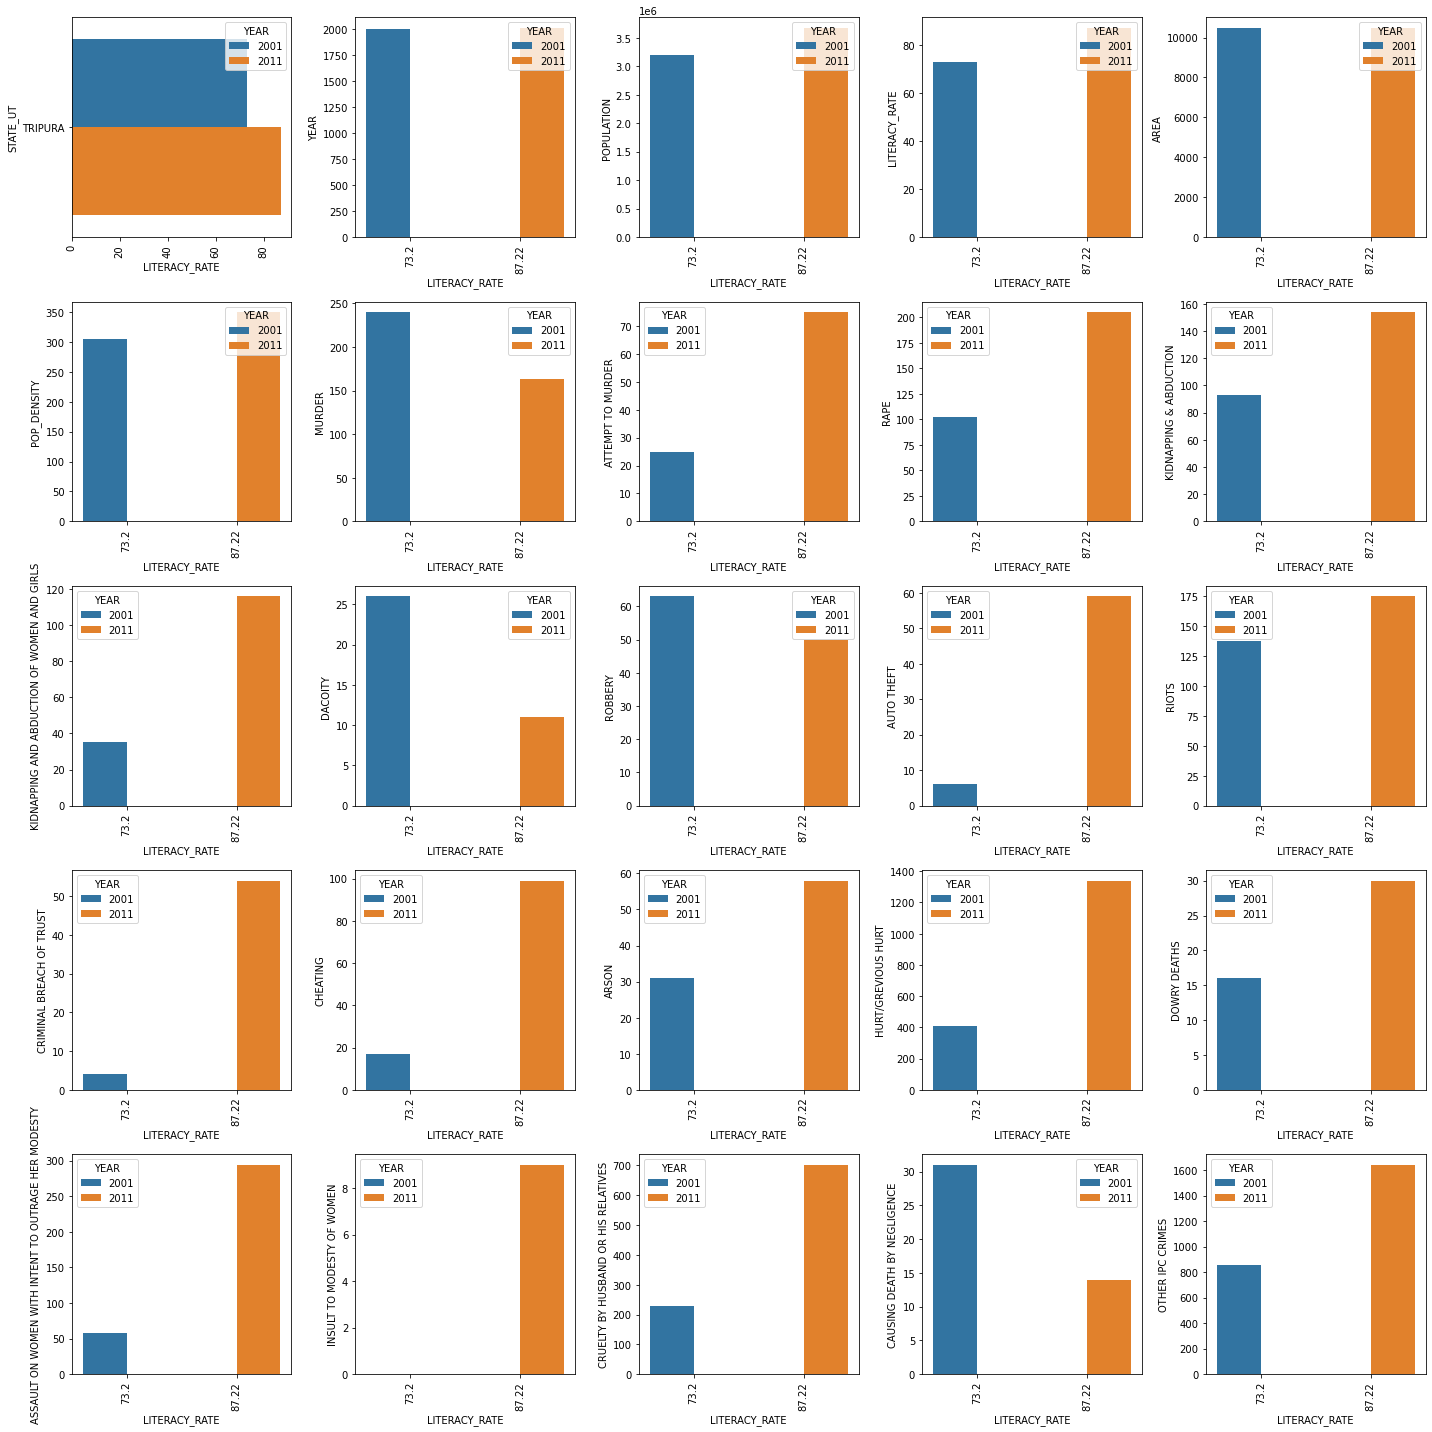

In [57]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in tripura:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=tripura,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate   murder cases decreases and kidnapping and abduction and attempt to murder cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls, cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women and dowry deaths cases have increased with increase in literacy rate.

- Crimes related to , auto theft,riots, criminal breach of trust, cheating, arson, hurt cases have increased with increase in literacy rate and dacoity,robbery, causing death by negligence  cases have been decreased with increase in literacy rate.

**UTTAR PRADESH**

In [58]:
up=df[df['STATE_UT']=='UTTAR PRADESH']
up.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE    AREA  POP_DENSITY  \
25  UTTAR PRADESH  2001   166197921          56.30  240928          690   
60  UTTAR PRADESH  2011   199812341          67.68  240928          828   

    MURDER  ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
25    7601               7964  1958                    4330  ...   
60    4951               4653  2042                    8500  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
25                      3430      5363    812               17816   
60                      3721      9941    477               12234   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
25          2211                                               2870     
60          2322                                               3455     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
25                        2575                                 7365   
60                           3                                 7121   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
25                         7129             57839  
60                        14380             68575  

[2 rows x 25 columns]

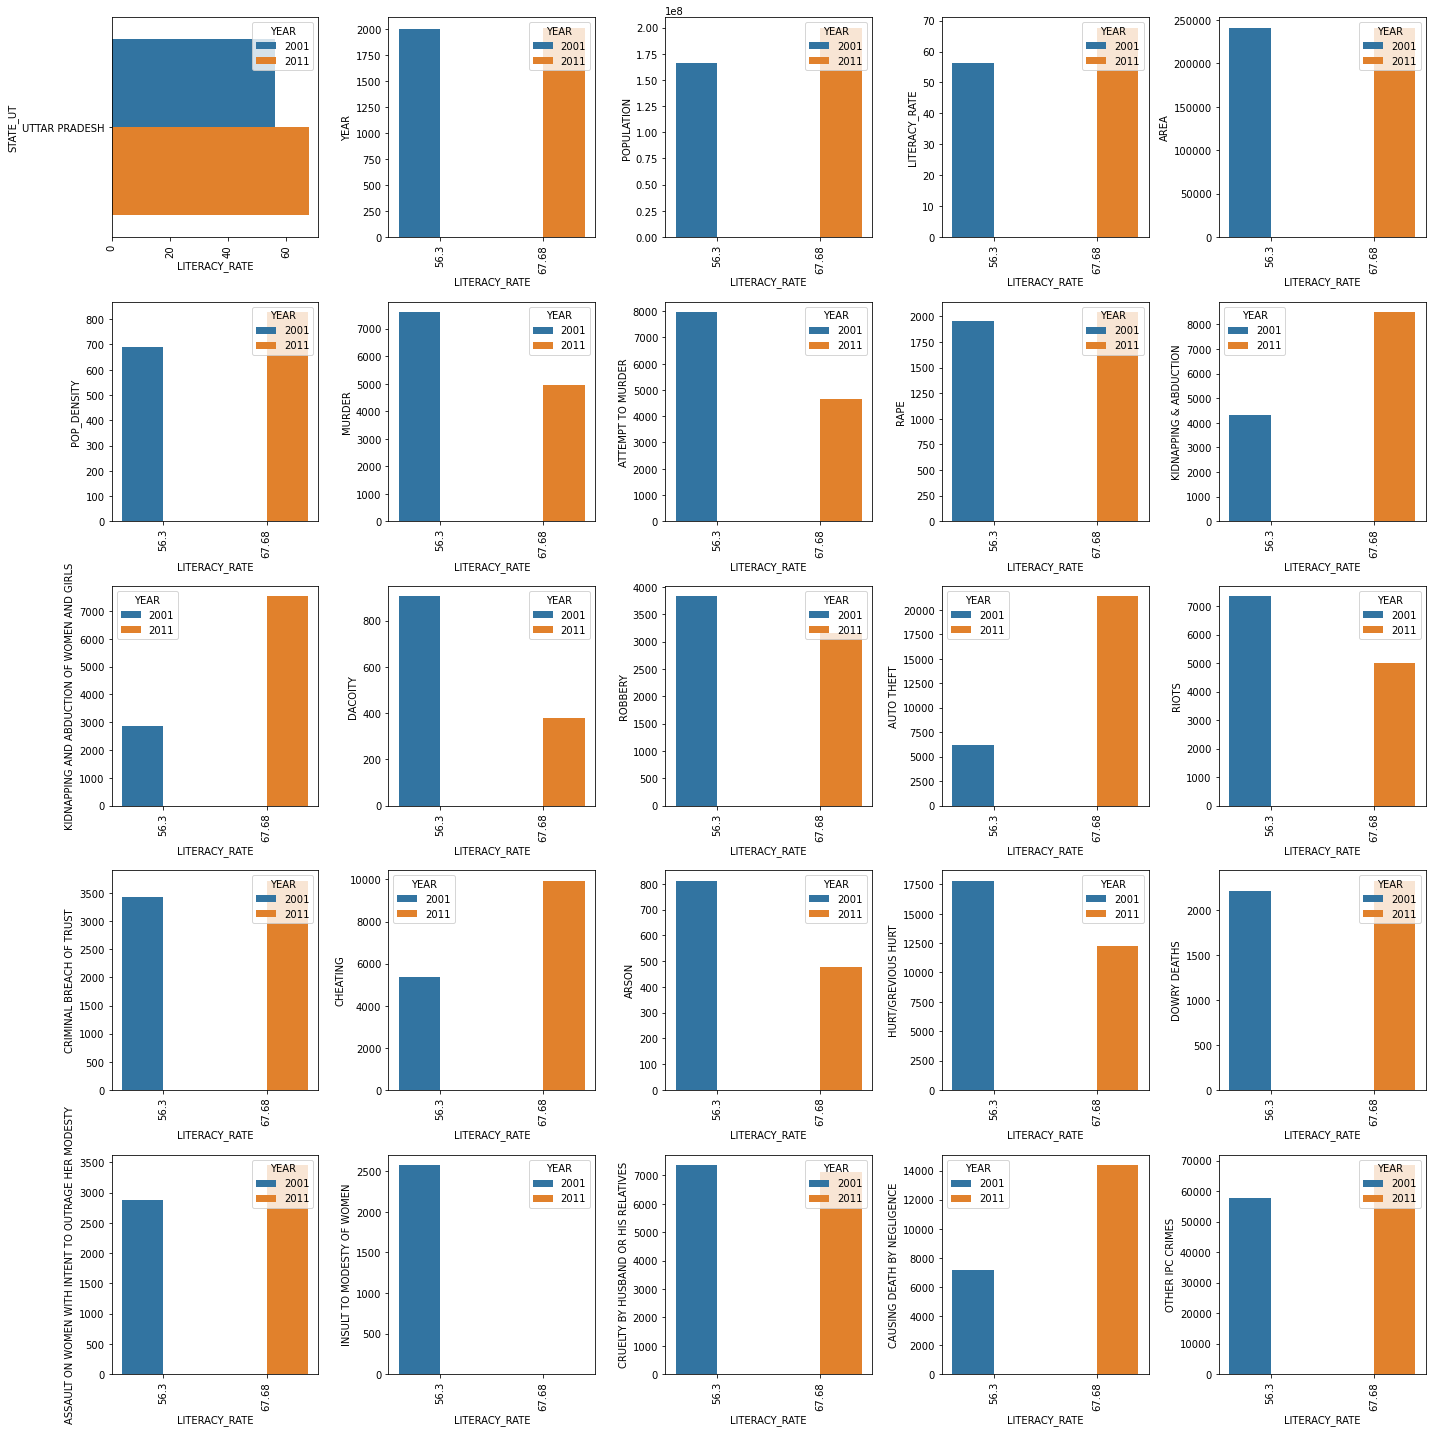

In [59]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in up:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=up,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder and attempt to murder cases decreases and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls,dowry deaths cases have increased with increase in literacy rate while  cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women decreased with increase in literacy rate in 2011.

- Crimes related to , auto theft,, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate and dacoity,robbery,riots, arson, hurt  cases have been decreased with increase in literacy rate.

**UTTARAKHAND**

In [60]:
uk=df[df['STATE_UT']=='UTTARAKHAND']
uk.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
26  UTTARAKHAND  2001     8489349          71.60  53483          159     316   
61  UTTARAKHAND  2011    10086292          79.63  53483          189     178   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
26                279    74                     183  ...   
61                189   129                     314  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
26                       171       318     30                 830   
61                       115       519     17                 852   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
26            56                                                103     
61            83                                                116     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
26                          84                                  301   
61                          72                                  307   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
26                          441              2227  
61                          696              2078  

[2 rows x 25 columns]

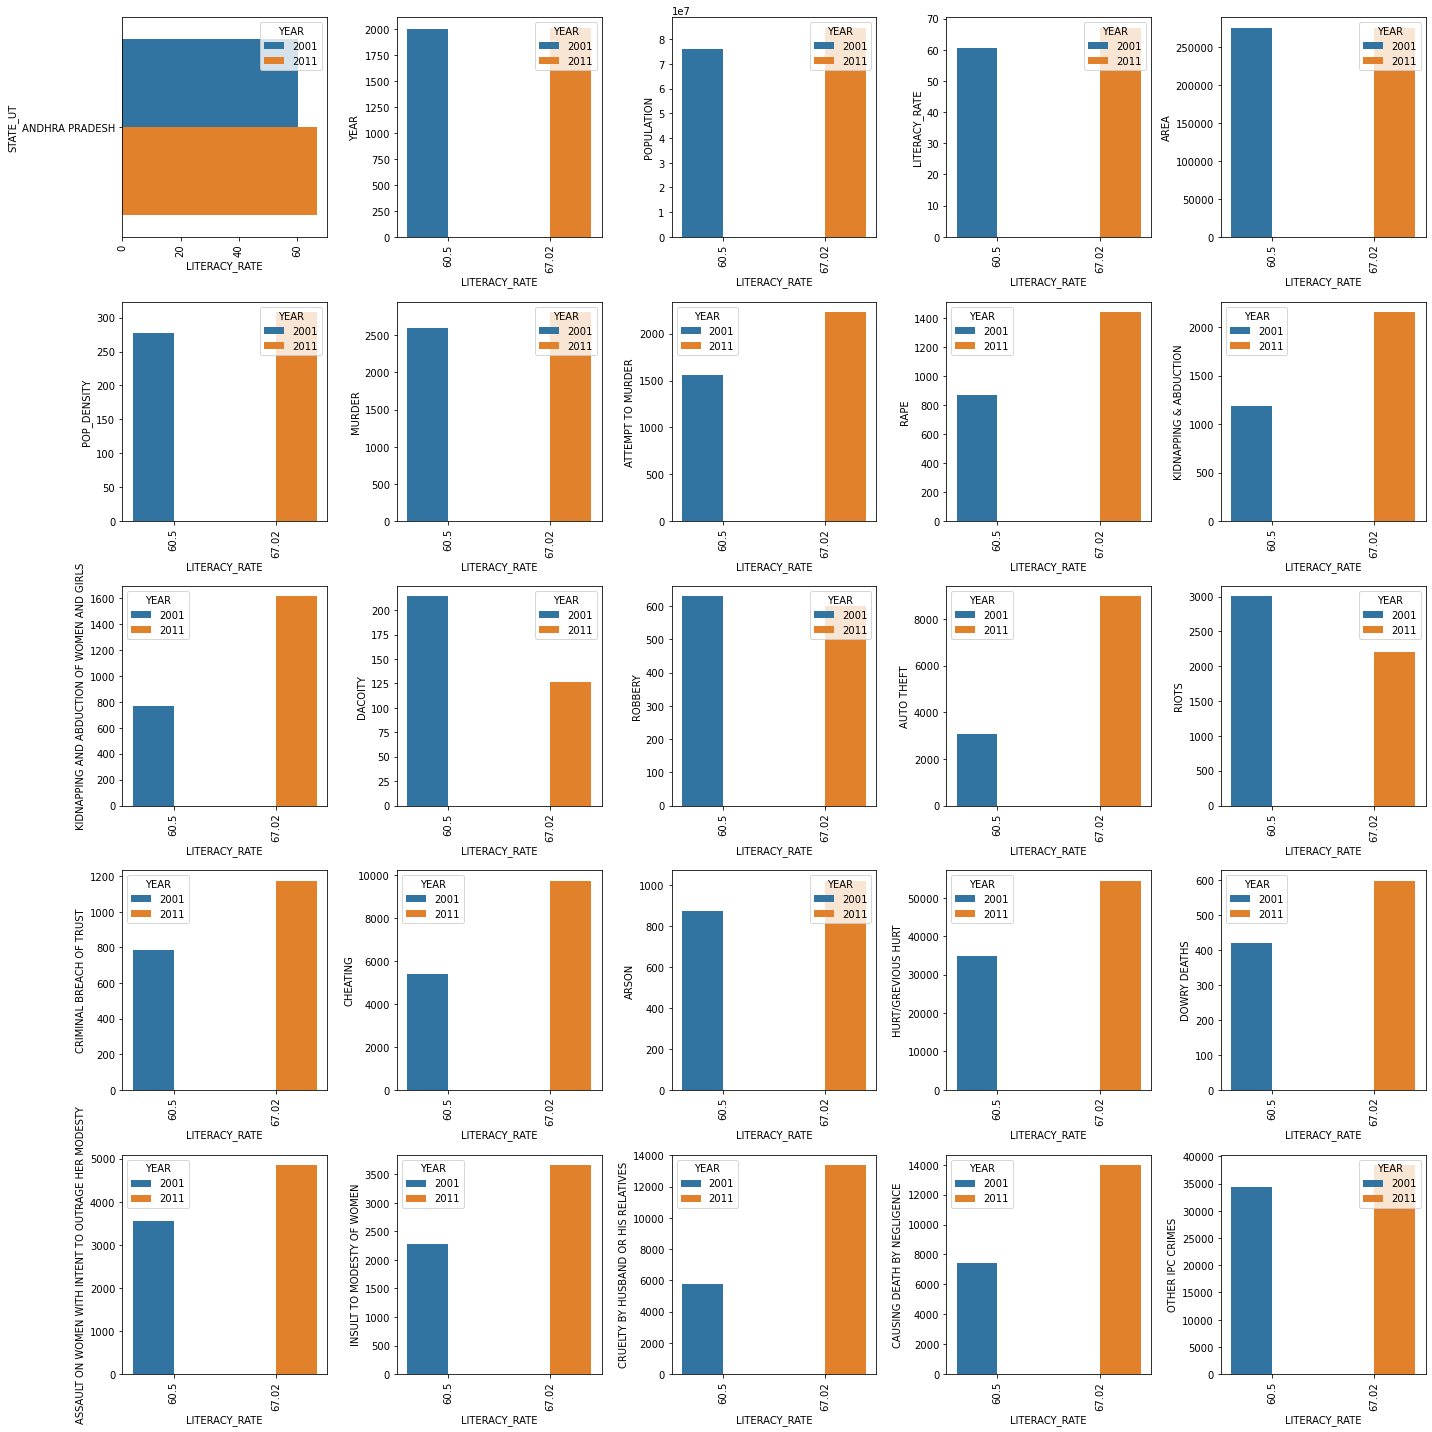

In [61]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in uk:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=andhra,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls,dowry deaths,cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women cases have increased with increase in literacy rate in 2011.

- Crimes related to  auto theft,, criminal breach of trust, cheating, arson, hurt, causing death by negligence cases have increased with increase in literacy rate and dacoity, robbery, riots cases have been decreased with increase in literacy rate.

**WEST BENGAL**

In [62]:
wb=df[df['STATE_UT']=='WEST BENGAL']
wb.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE   AREA  POP_DENSITY  MURDER  \
27  WEST BENGAL  2001    80176197          68.60  88752          903    1594   
62  WEST BENGAL  2011    91276115          76.26  88752         1030    2109   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
27                449   709                     875  ...   
62               2242  2363                    4285  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
27                       486      1216    102                3658   
62                      1264      4171    413               13094   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
27           265                                                954     
62           510                                               2363     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
27                          48                                 3859   
62                         200                                19772   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
27                         2281             25260  
62                         3249             56614  

[2 rows x 25 columns]

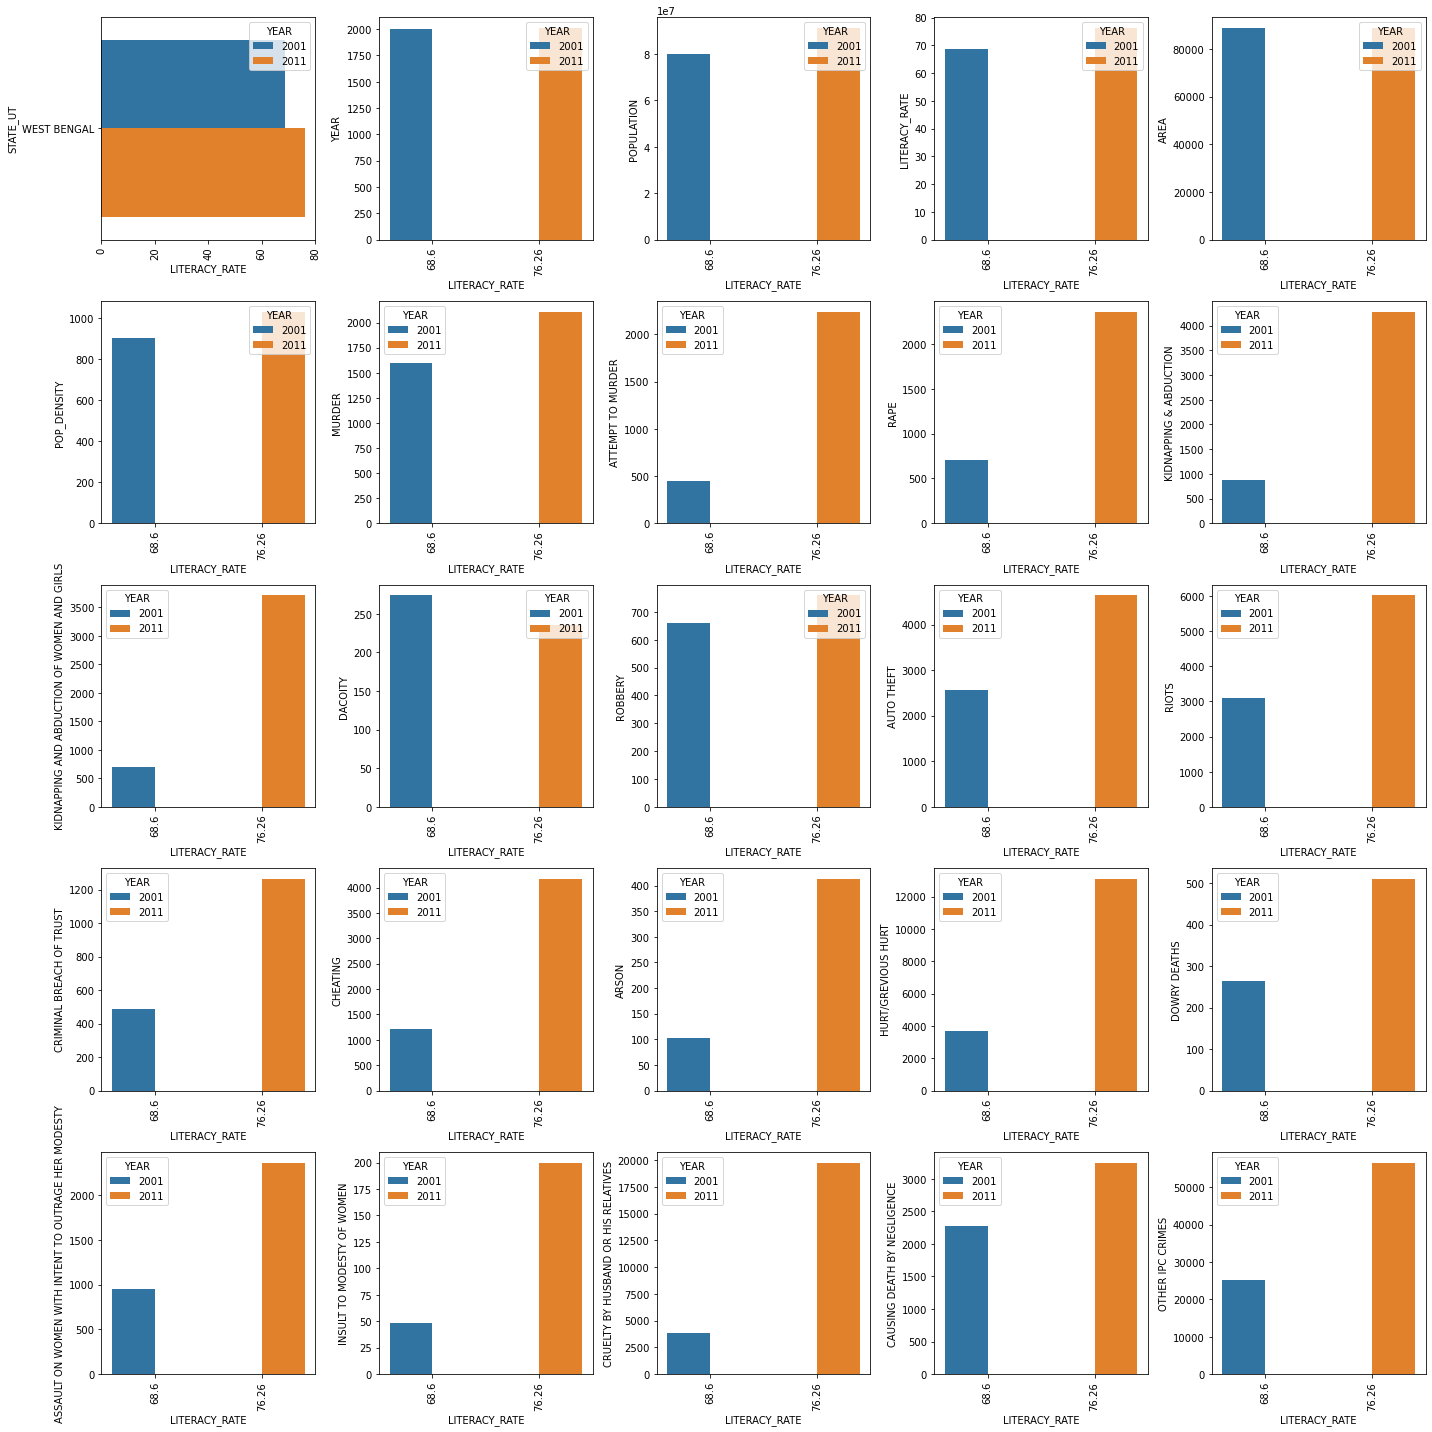

In [63]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in wb:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=wb,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls,dowry deaths cases have increased with increase in literacy rate while  cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women decreased with increase in literacy rate in 2011.

- Crimes related to  auto theft,robbery,riots, criminal breach of trust, cheating,arson, hurt causing death by negligence cases have increased with increase in literacy rate and dacoity cases have been decreased with increase in literacy rate.

**A & N ISLANDS**

In [64]:
AN=df[df['STATE_UT']=='A & N ISLANDS']
AN.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
28  A & N ISLANDS  2001      356152          86.70  8249           43      13   
63  A & N ISLANDS  2011      380581          86.63  8249           46      14   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
28                  0     3                       2  ...   
63                  6    13                      15  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
28                        10         8      4                 118   
63                         3        32      6                  81   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
28             0                                                 19     
63             0                                                 15     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
28                           1                                    9   
63                           3                                    5   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
28                            0               323  
63                            6               392  

[2 rows x 25 columns]

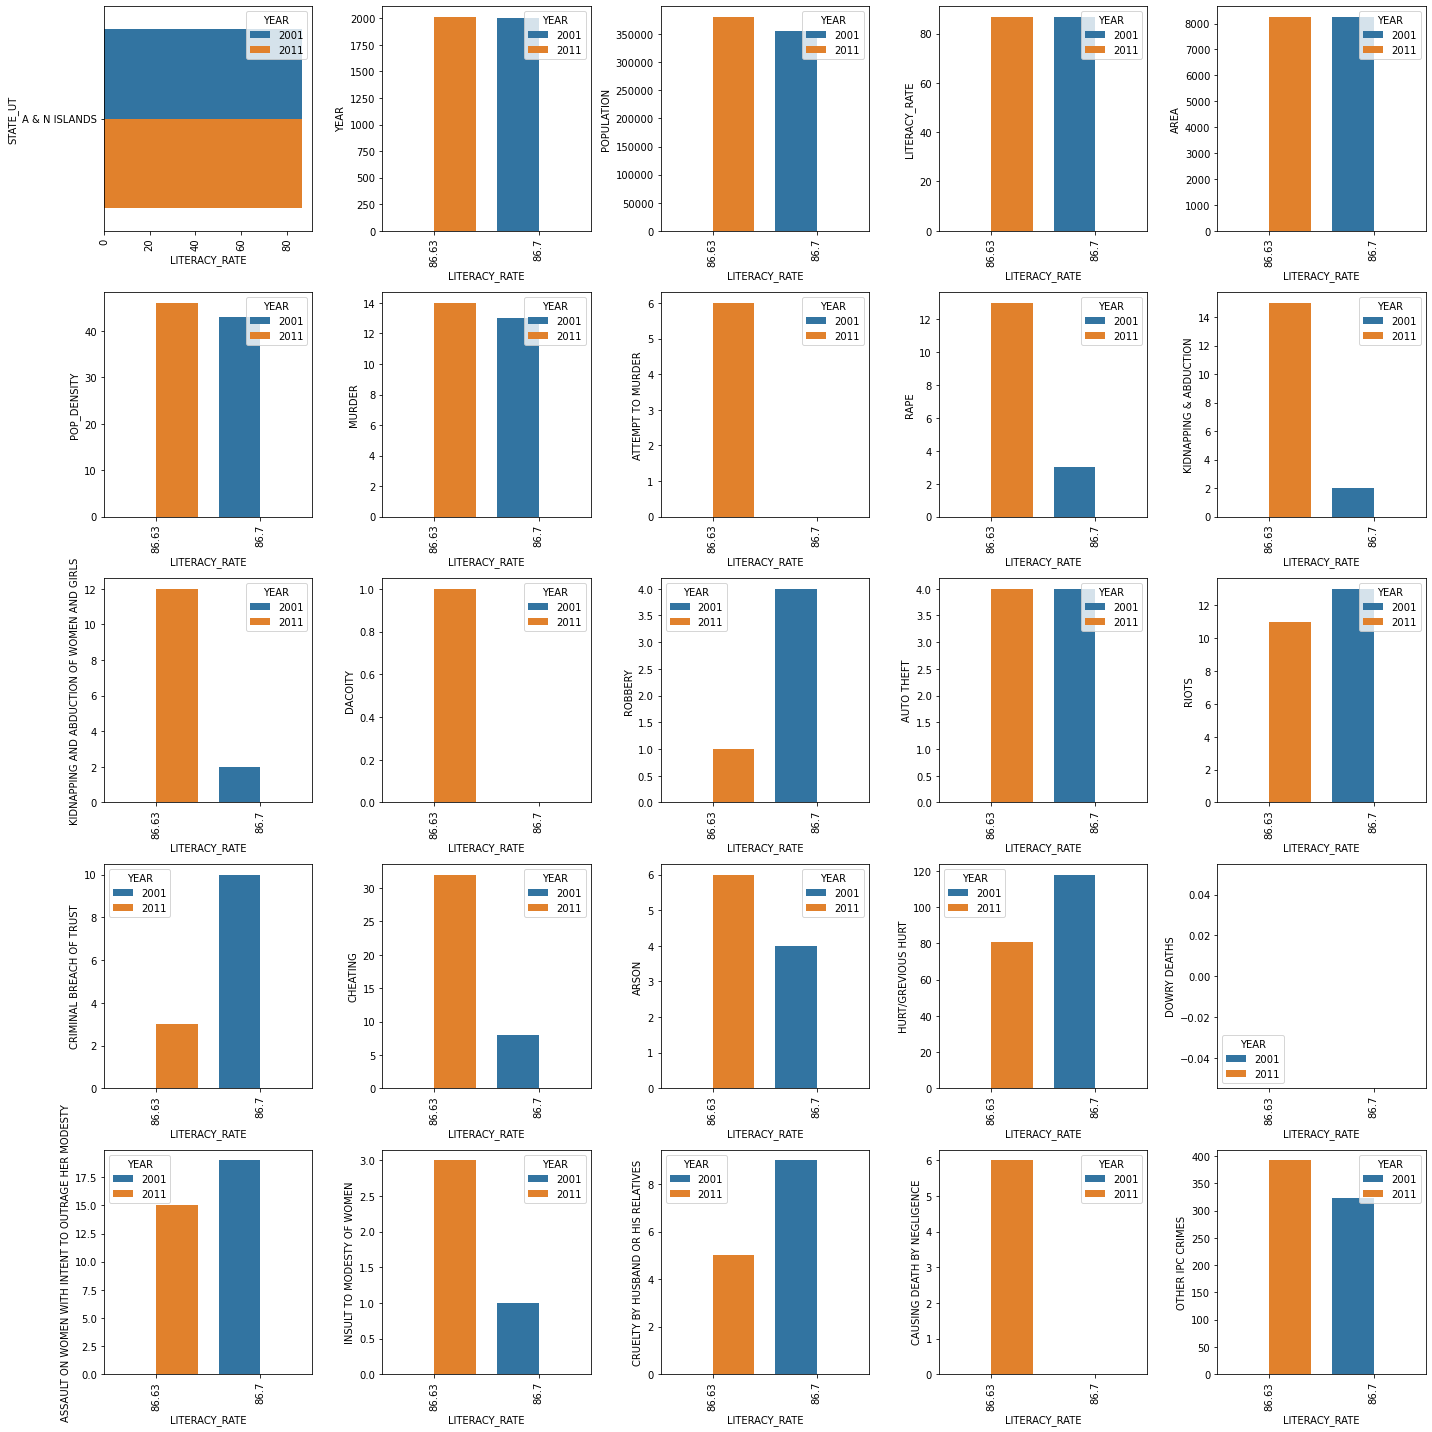

In [65]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in AN:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=AN,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder and kidnapping and abduction cases decreases in 2011.

- Crimes on women and children such as assault on women with intent to outrage her modesty and cruelty by husband and family  cases have increased with increase in literacy rate while  Rape,  kidnapping and abduction of women and girls, insult to modesty of women decreased with increase in literacy rate in 2011.

- Crimes related to robbery, auto theft,riots, criminal breach of trust,hurt  cases have increased with increase in literacy rate and dacoity,cheating ,causing death by negligence, arson  cases have been decreased with increase in literacy rate.

**CHANDIGARH**

In [66]:
chandigarh=df[df['STATE_UT']=='CHANDIGARH']
chandigarh.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
29  CHANDIGARH  2001      900635          81.90   114         7900      15   
64  CHANDIGARH  2011     1055450          86.05   114         9252      24   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
29                 10    18                      56  ...   
64                 40    27                      58  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
29                        26       155      5                  95   
64                        25       255      9                  45   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
29             3                                                 24     
64             2                                                 21     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
29                          15                                   36   
64                          12                                   46   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
29                            6               914  
64                            7              1036  

[2 rows x 25 columns]

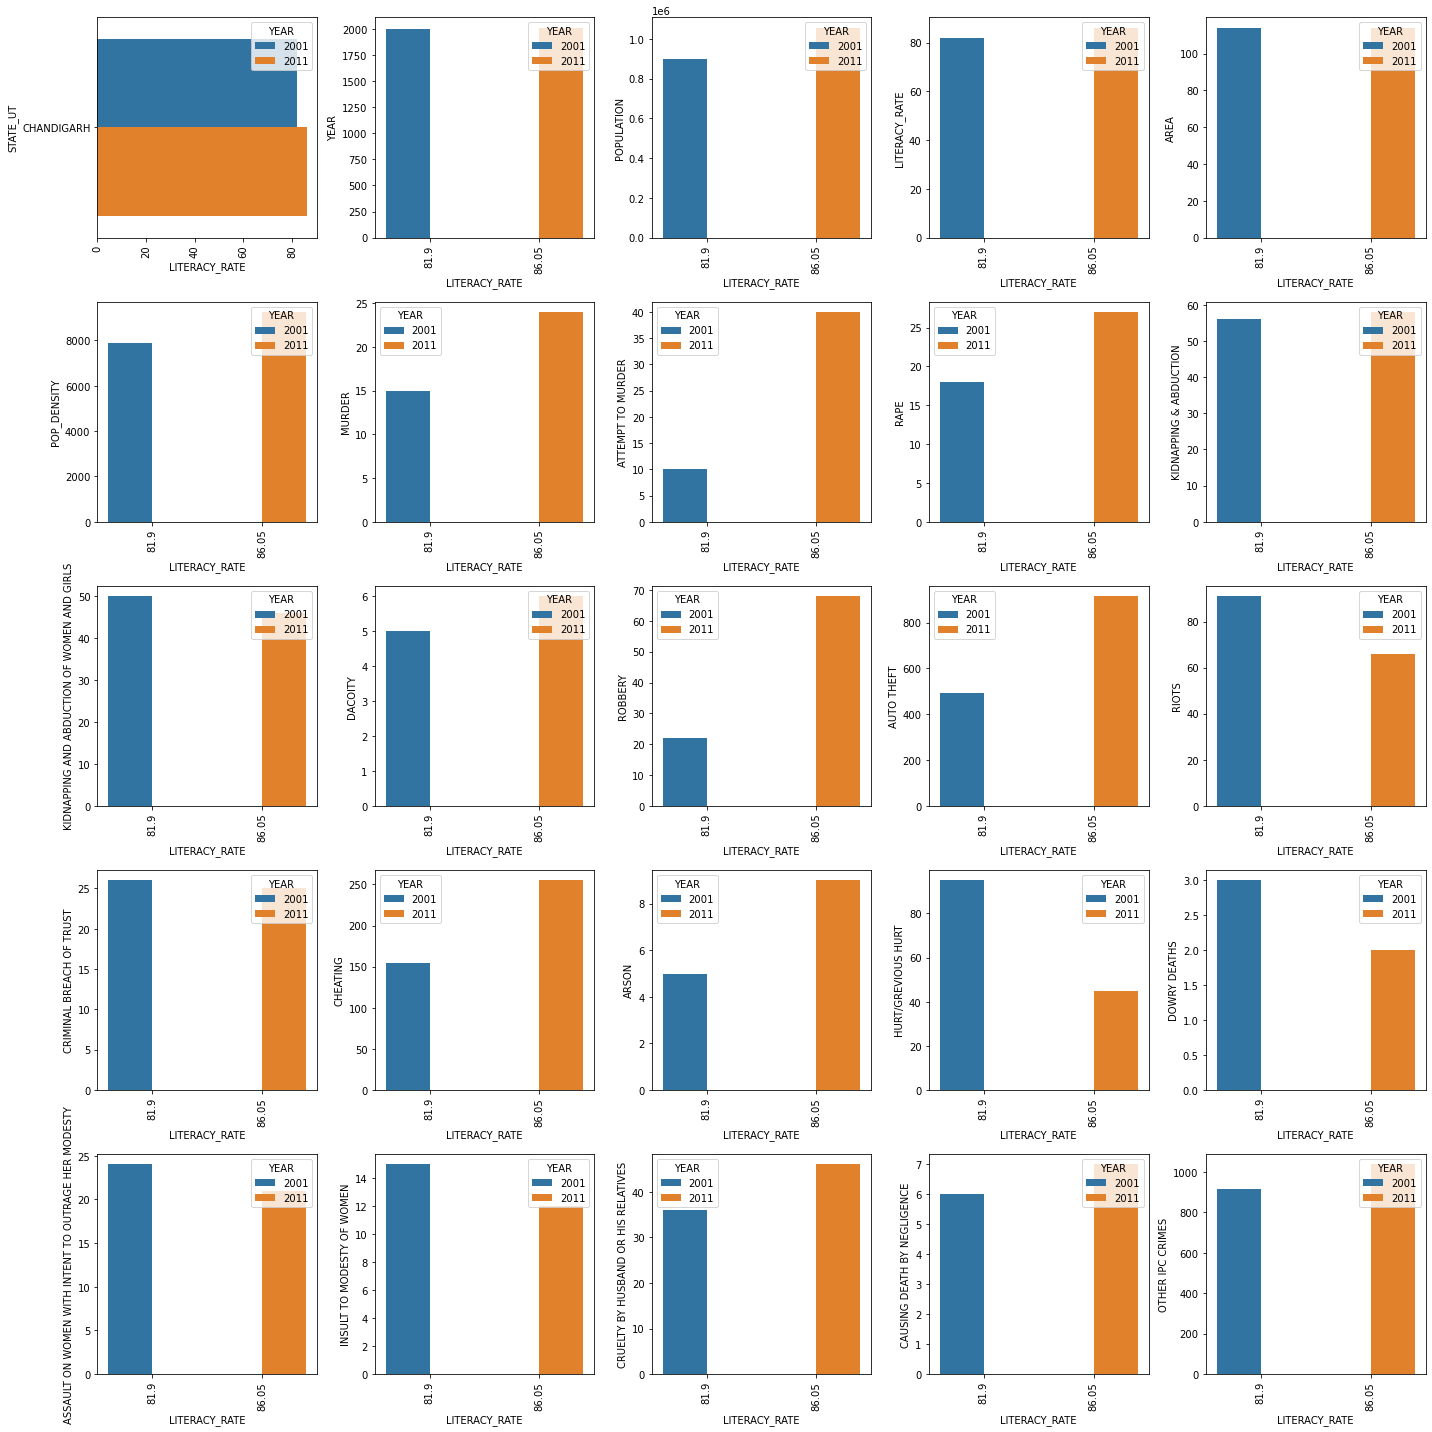

In [67]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in chandigarh:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=chandigarh,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  , cases have increased with increase in literacy rate while  cruelty by husband and familyincreased with increase in literacy rate while kidnapping and abduction of women and girls, insult to modesty of women, dowry deaths, assault on women with intent to outrage her modesty decreased with increase in literacy rate in 2011.

- Crimes related to dacoity, robbery, auto theft,arson, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate and riots and  hurt  cases have been decreased with increase in literacy rate.

**D & N HAVELI'**

In [68]:
D_haveli=df[df['STATE_UT']=='D & N HAVELI']
D_haveli.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
30  D & N HAVELI  2001      220490          57.60   491          449       3   
65  D & N HAVELI  2011      343709          76.24   491          698      14   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
30                  2     6                       4  ...   
65                  2     4                       9  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
30                        13        12      1                  29   
65                        10        18      5                  25   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
30             0                                                  7     
65             0                                                  2     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
30                           0                                    4   
65                           0                                    3   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
30                            0               183  
65                           24               134  

[2 rows x 25 columns]

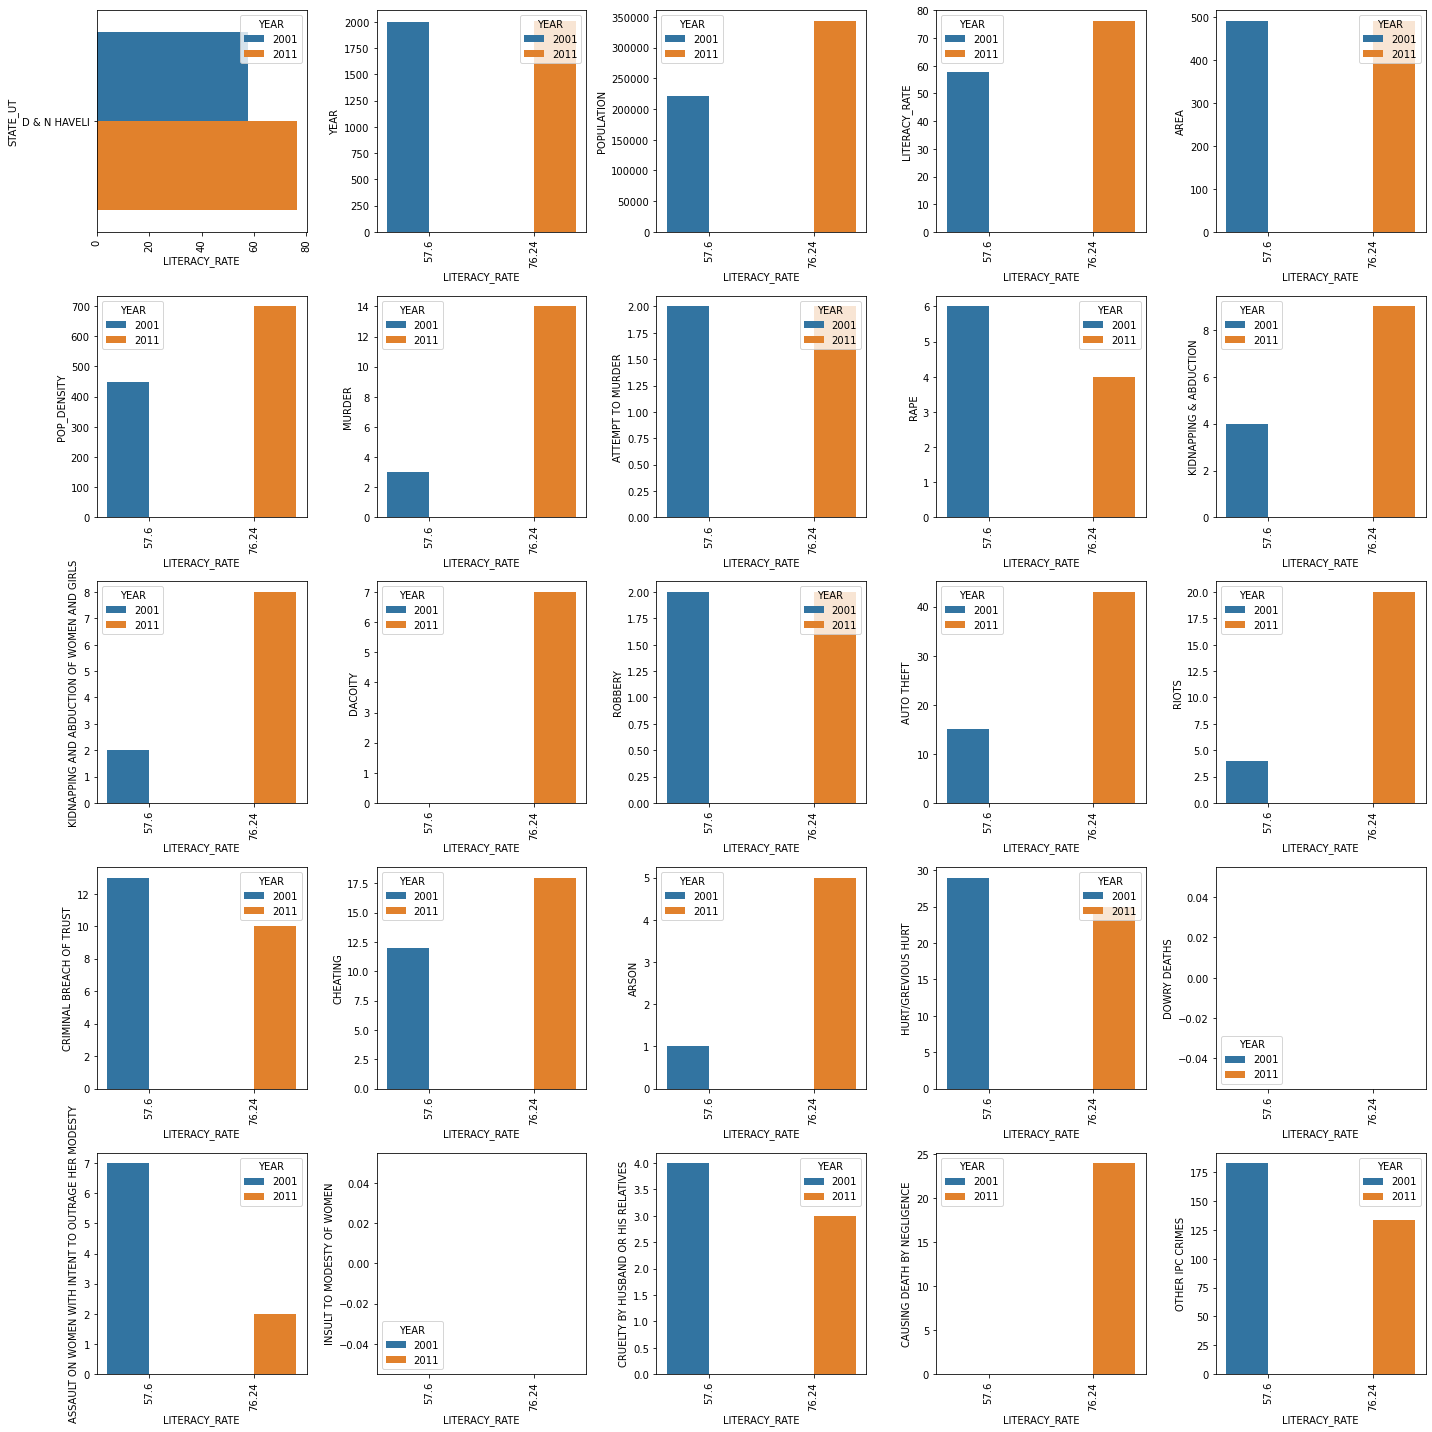

In [69]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in D_haveli:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=D_haveli,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder and kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as  kidnapping and abduction of women and girls cases have increased with increase in literacy rate while  Rape, cruelty by husband and family, assault on women with intent to outrage her modesty cases decreased with increase in literacy rate in 2011.

- Crimes related to riots, auto theft,dacoity, , cheating,arson , causing death by negligence cases have increased with increase in literacy rate and criminal breach of trust and hurt  cases have been decreased with increase in literacy rate.

**DAMAN & DIU**

In [70]:
dd=df[df['STATE_UT']=='DAMAN & DIU']
dd.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
31  DAMAN & DIU  2001      158204           78.2   112         1413       7   
66  DAMAN & DIU  2011      243247           87.1   112         2169       6   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
31                  5     0                       5  ...   
66                  1     1                       3  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
31                         5         9      3                  21   
66                         3        10      0                  11   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
31             0                                                  0     
66             0                                                  0     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
31                           0                                    4   
66                           0                                    2   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
31                            0                73  
66                           43                35  

[2 rows x 25 columns]

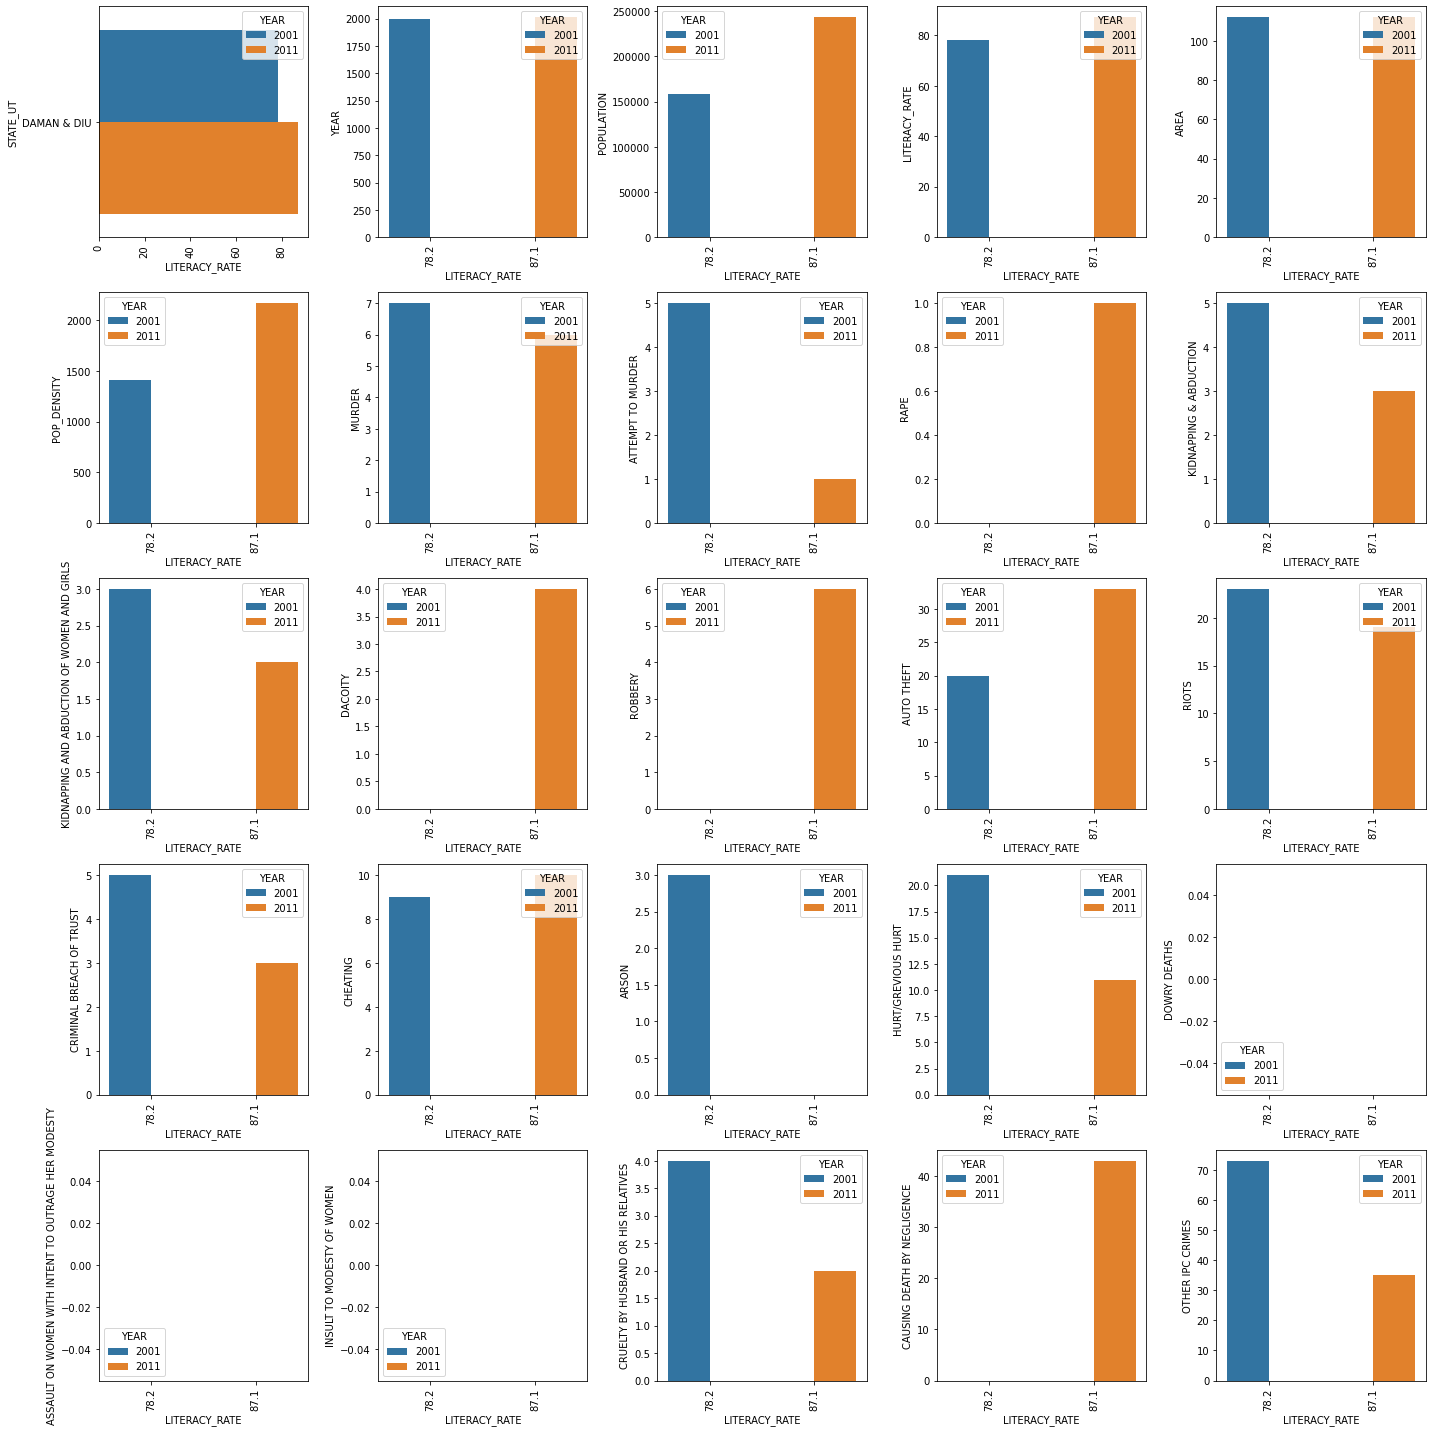

In [71]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in dd:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=dd,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder, attempt to murder and kidnapping and abduction cases decreases in 2011.

- Crimes on women and children such as  and girls cases have increased with increase in literacy rate while  kidnapping and abduction of women, cruelty by husband and family,  decreased with increase in literacy rate in 2011.

- Crimes related to dacoity,robbery, auto theft, cheating, causing death by negligence cases have increased with increase in literacy rate and criminal breach of trust,riots, arson, hurt cases have been decreased with increase in literacy rate.

**DELHI**

In [72]:
delhi=df[df['STATE_UT']=='DELHI']
delhi.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
32    DELHI  2001    13850507          81.70  1483         9340     547   
67    DELHI  2011    16787941          86.21  1484        11297     543   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
32                510   381                    1627  ...   
67                386   572                    3767  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
32                       479      2183     50                2011   
67                       337      2590     42                1946   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
32           113                                                502     
67           142                                                657     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
32                          90                                  138   
67                         162                                 1575   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
32                          432             22000  
67                         1168             14363  

[2 rows x 25 columns]

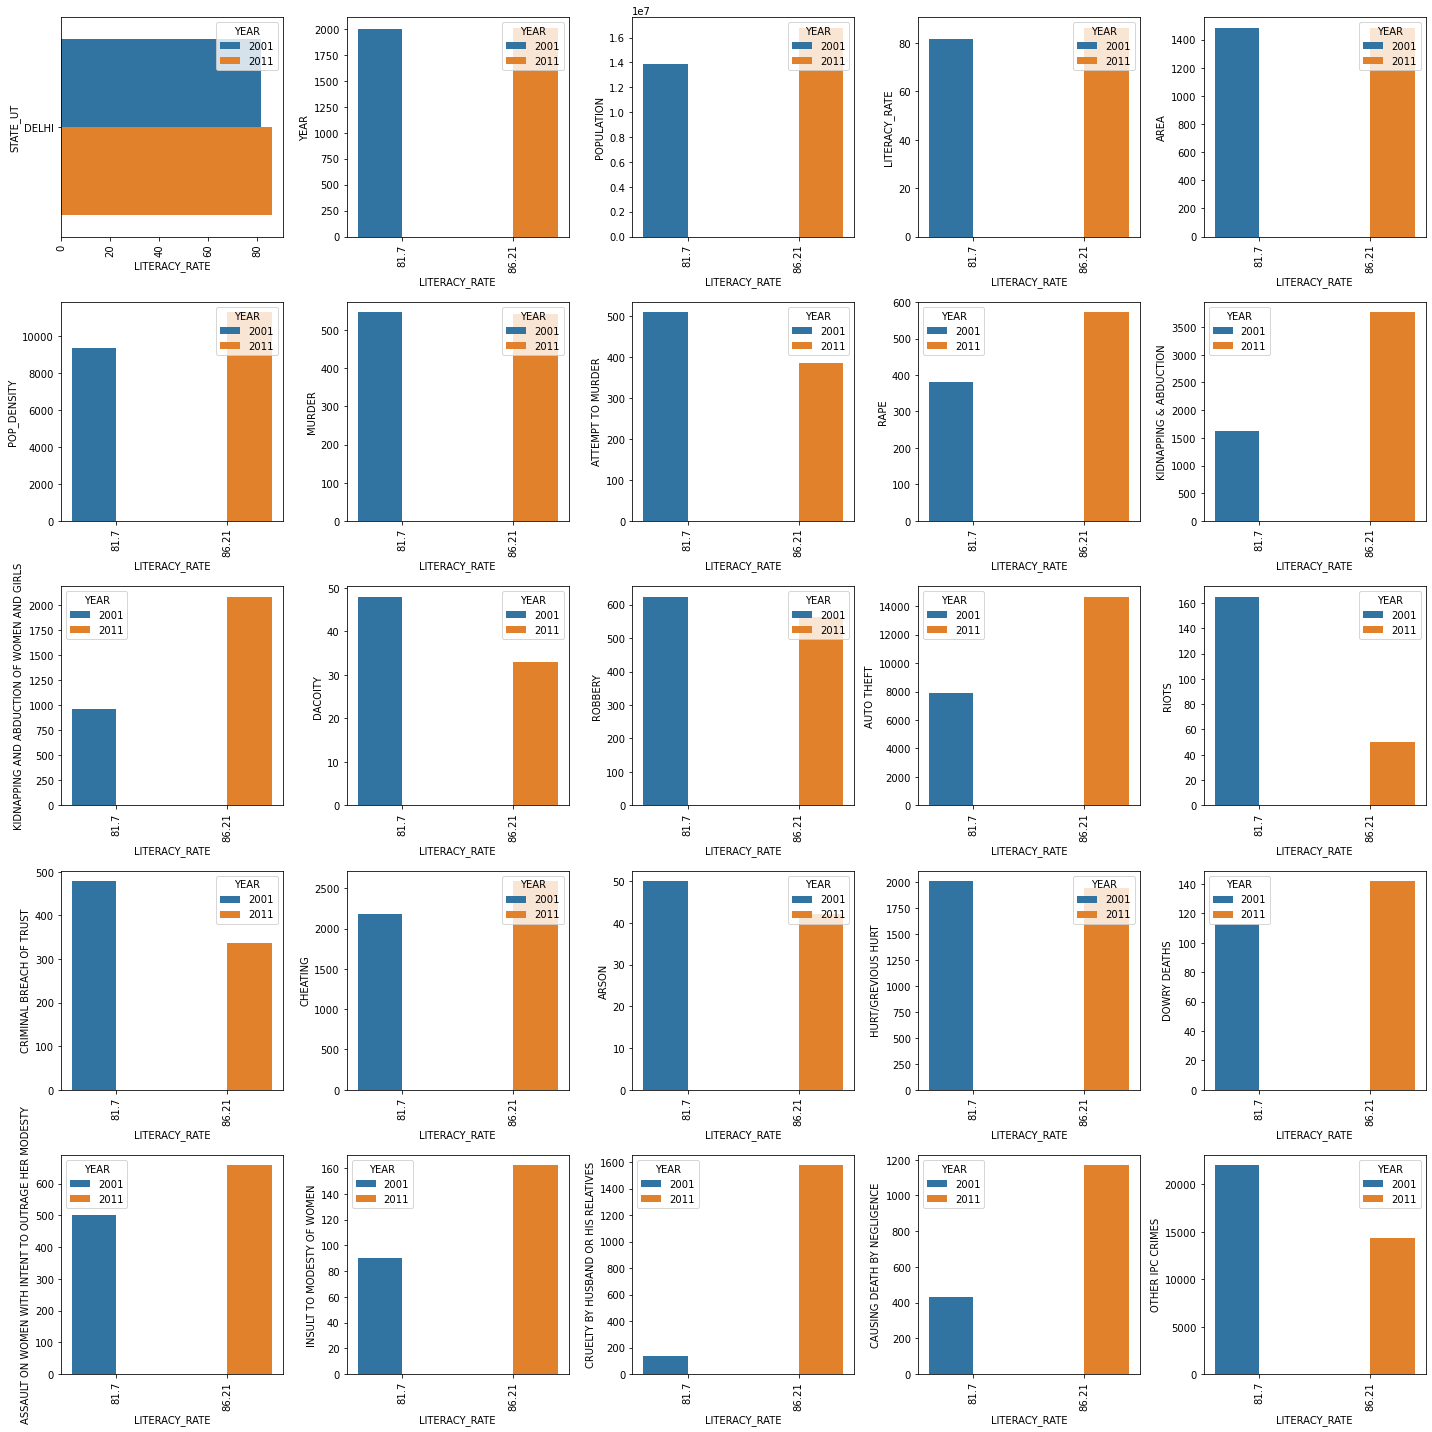

In [73]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in delhi:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=delhi,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder cases remains same, attempt to murder cases decreased while kidnapping and abduction cases increases in 2011.

- Crimes on women and children such as Rape,  kidnapping and abduction of women and girls,dowry deaths,cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women cases have increased with increase in literacy rate in 2011.

- Crimes related to  auto theft, cheating, causing death by negligence cases have increased with increase in literacy rate and dacoity,robbery,riots,criminal breach of trust, arson, hurt  cases have been decreased with increase in literacy rate.

**LAKSHADWEEP**

In [74]:
laksha=df[df['STATE_UT']=='LAKSHADWEEP']
laksha.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
33  LAKSHADWEEP  2001       60650          86.70    32         1895       1   
68  LAKSHADWEEP  2011       64473          91.85    32         2013       0   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
33                  0     0                       0  ...   
68                  1     0                       0  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
33                         1         0      2                   3   
68                         1         0      3                   3   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
33             0                                                  0     
68             0                                                  0     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
33                           0                                    0   
68                           0                                    0   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
33                            0                17  
68                            0                27  

[2 rows x 25 columns]

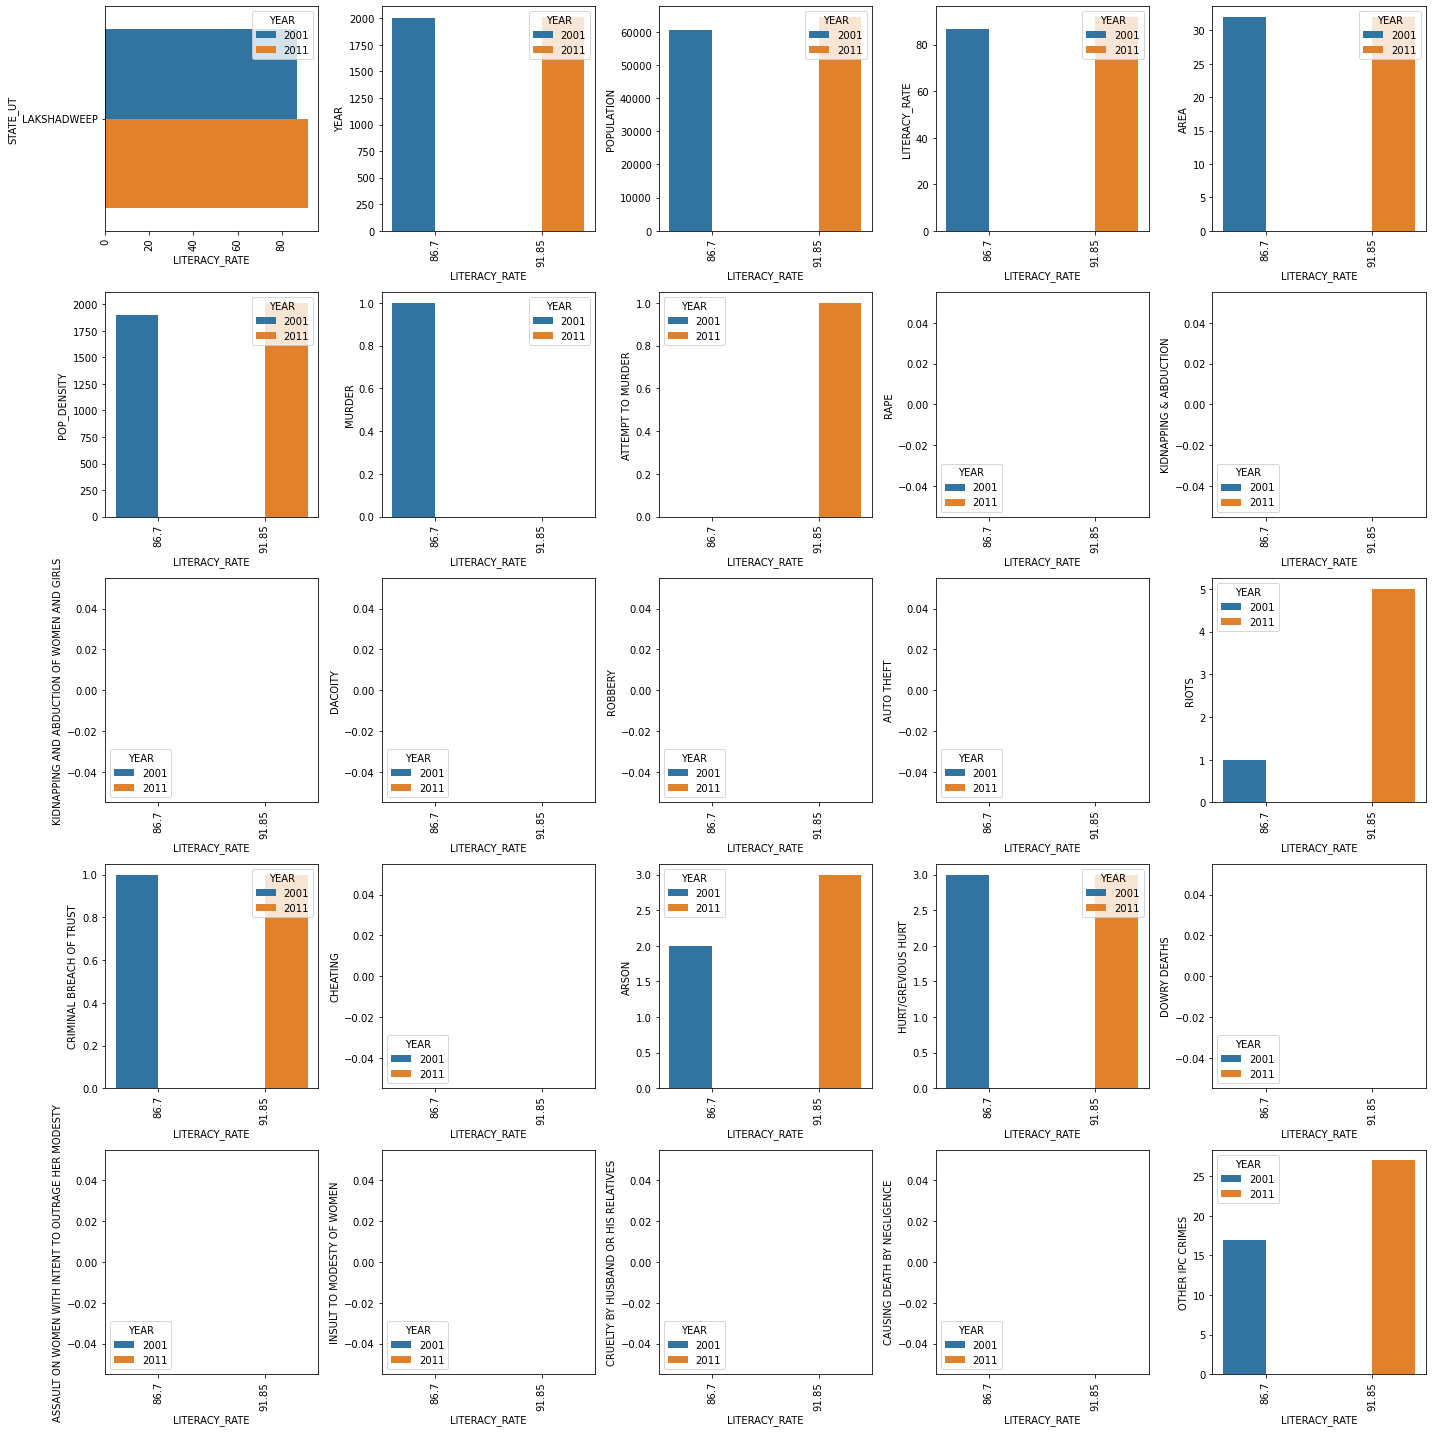

In [75]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in laksha:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=laksha,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  no murders were reported in 2011, in attempt to murder only 1 case is registered in 2011.

- Crimes related to riots,hurt, criminal breach of trust cases have increased with increase in literacy rate and arson,   cases have been decreased with increase in literacy rate.

**PUDUCHERRY**

In [76]:
pondi=df[df['STATE_UT']=='PUDUCHERRY']
pondi.head()

STATE_UT  YEAR  POPULATION  LITERACY_RATE  AREA  POP_DENSITY  MURDER  \
34  PUDUCHERRY  2001      974345          81.20   479         2034      25   
69  PUDUCHERRY  2011     1247953          85.85   479         2598      32   

    ATTEMPT TO MURDER  RAPE  KIDNAPPING & ABDUCTION  ...  \
34                 32     9                       4  ...   
69                 22     7                      12  ...   

    CRIMINAL BREACH OF TRUST  CHEATING  ARSON  HURT/GREVIOUS HURT  \
34                         5        23     31                 635   
69                         9        54     10                 853   

    DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
34             1                                                 35     
69             1                                                 35     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
34                          27                                    3   
69                          16                                   10   

    CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  
34                          166              2324  
69                          243              2119  

[2 rows x 25 columns]

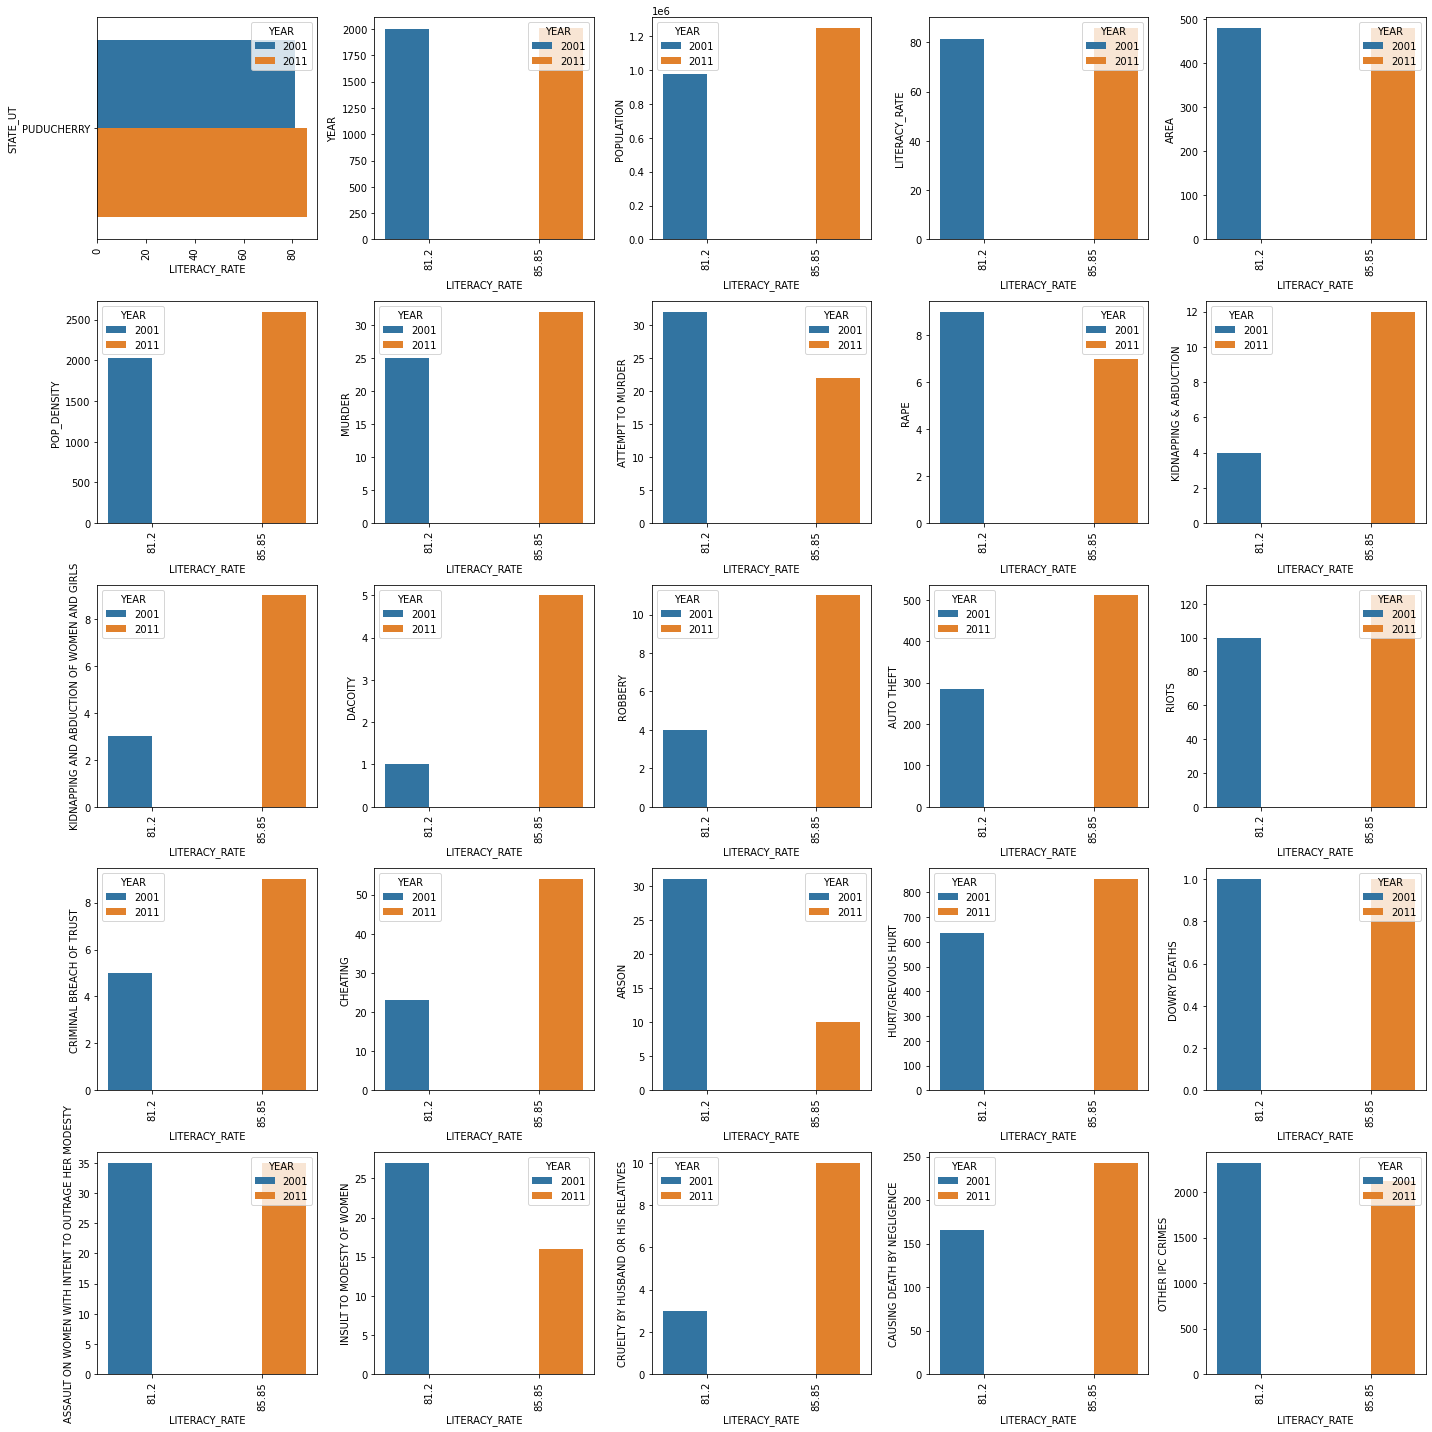

In [77]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in pondi:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.barplot(x='LITERACY_RATE',y=column,data=pondi,hue='YEAR')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

- With increase in literacy rate  murder and kidnapping and abduction cases increased in 2011 while attempt to murder cases decreased .

- Crimes on women and children such as ,cruelty by husband and family,  kidnapping and abduction of women and girls cases have increased with increase in literacy rate while  Rape, dowry deaths, insult to modesty of women cases  decreased with increase in literacy rate while assault on women with intent to outrage her modesty cases remained same in 2011.

- Crimes related to  auto theft,dacoity,robbery,riots, arson, hurt, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate.

# 2.3Analysis of year-on-year total crime rate.

Crime Rate is calculated as rate of cognizable crimes per one lakh (100,000) of population (stated in wikipedia:https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate#:~:text=Crime%20Rate%20is%20calculated%20as,SLL%3A%20Special%20%26%20Local%20Laws).This means that a crime rate is calculated by dividing the number of reported crimes by the total population. The result is then multiplied by 100,000.
- This is not possible for me as I have population data for only 2001 and 2011 so I can find crime rate only for year 2011 and 2001 as mentioned earlier census data is only available for 2001 and 2011. So finding year on year crime rate is not possible. 
- Hence instead of crime rate I will state percentage in crime change yearly. This will provide us with year on year crime change which on plots show changes in crime rate as per state.

- I will now upload a excel sheet which contains columns like state, total crimes( this is total IPC crimes column which contains all the cognizable IPC crimes that were registered in that particular year) and years and crime rate change over the years. The crime rate change is calculated as difference between the current and previous year total crimes divided by the number of total crimes of last year multiplied by 100.

In [96]:
crime_rate=pd.read_excel('crime rate change.xlsx')
crime_rate.head()

STATE_UT  YEAR  TOTAL IPC CRIMES  crime change
0  A & N ISLANDS  2001               658      0.000000
1  A & N ISLANDS  2002               608     -7.598784
2  A & N ISLANDS  2003               644      5.921053
3  A & N ISLANDS  2004               748     16.149068
4  A & N ISLANDS  2005               682     -8.823529

- The above sheet shows 0 value for year 2001 as it does not have previous year data. hence it is 0. For 2002 the crime rate change is -7.59 i.e. crime rate decreased by 7.59% in 2002 from 2001. 

**Plotting crime rate change versus states.**


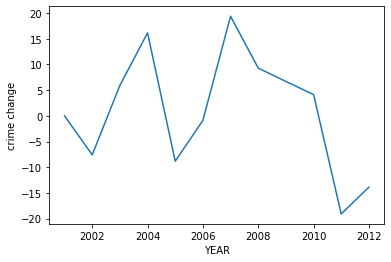

In [98]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='A & N ISLANDS'])
plt.show()

- The crime rate  in andaman has increased was high in 2004 with lowering down and reaching at highest point in 2001. the lowest crime rate was acahieved in 2011.

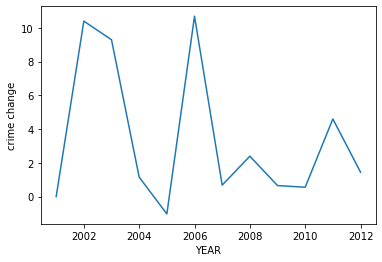

In [100]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='ANDHRA PRADESH'])
plt.show()

- The crime rate for Andhra prtadesh was higher in years 2002 and 2006 and lowest was seen in 2005.

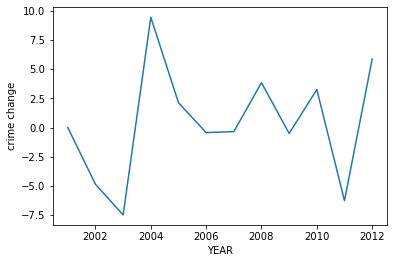

In [99]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='ARUNACHAL PRADESH'])
plt.show()

- Here the crime rate reached lowest minima in 2003 after reachng highest in the year 2004.

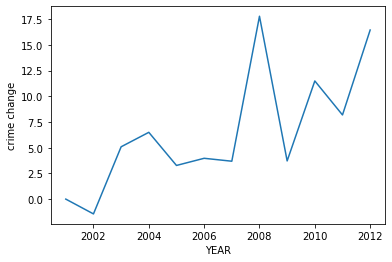

In [101]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='ASSAM'])
plt.show()

- Here the crime rate reached lowest in 2002 and its seen been increasing. Its had its highest crime rate in year 2008.

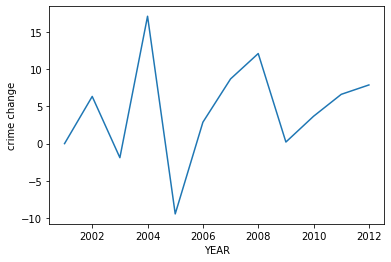

In [102]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='BIHAR'])
plt.show()

-The highest crime rate was in year 2004 followed by lowest crime rate in next year. SInce then crime rate is increasing.

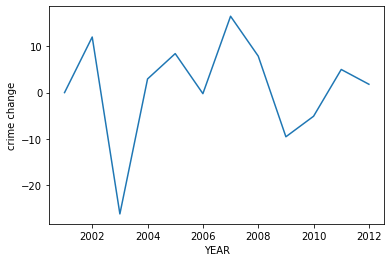

In [103]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='CHANDIGARH'])
plt.show()

- The lowest crime rate was seen in 2003 and then its started increasing reaching highest in 2007 then with sloight drop its been increasing.

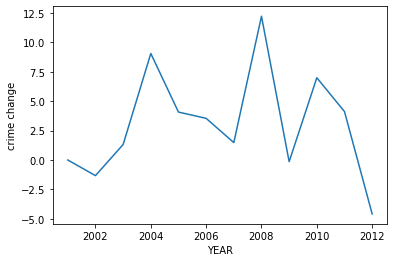

In [104]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='CHHATTISGARH'])
plt.show()

- The crime rate has been slightly increasing reaching its highest point in 2008 while with slight high it has reached its lowest in 2012.

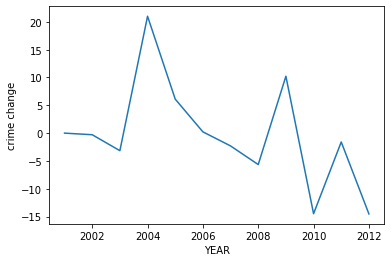

In [105]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='D & N HAVELI'])
plt.show()

- The crime rate was high in 2004 and since then its been decreasing overall.

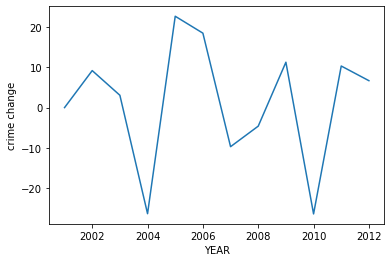

In [106]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='DAMAN & DIU'])
plt.show()

-The crime rate has reached to its lowest point in years 2004 and 2010 while after 2010 the crime rate is increasing.

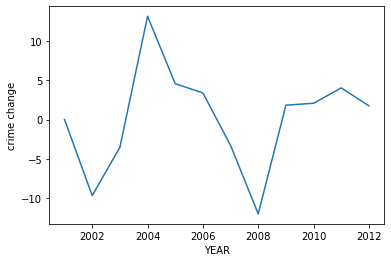

In [107]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='DELHI UT'])
plt.show()

- The crime rate was higher in year 2003 increasing highest in 2004 then decreasing and reaching lowest point in 2008 amd since then its been increasing

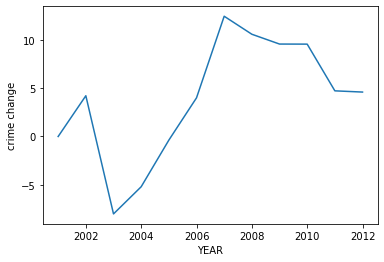

In [108]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='GOA'])
plt.show()

- The crime rate was lowest in 2003 then increasing and reaching highest in 2007 further kept on decreasing.

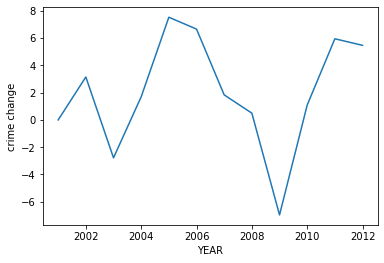

In [109]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='GUJARAT'])
plt.show()

- The crime rate was highest in 2005 then decreasing gradually and reaching lowest in 2009 and since then its increasing.

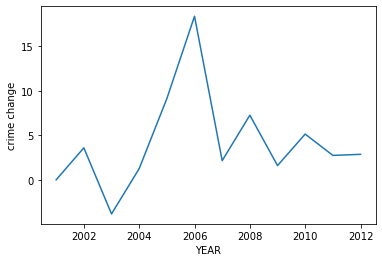

In [110]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='HARYANA'])
plt.show()

-The crime rate hit was lowest in 2003 with increasing gradually reaching highest in 2006 and since then attained avg. crime rate of 2-3.

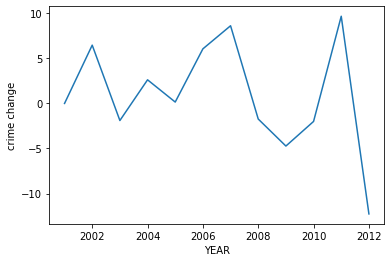

In [111]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='HIMACHAL PRADESH'])
plt.show()

- The crime rate has been decreasing mostly reaching at its highest point in 2011, next year dropping to lowest crime rate.

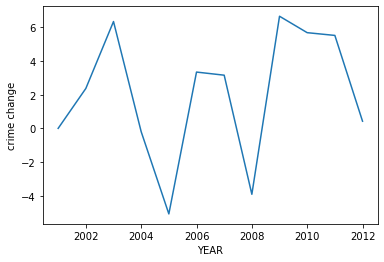

In [112]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='JAMMU & KASHMIR'])
plt.show()

- The crime rate hit high in 2003 then decreased recahing minima in 2005. Further in 2008 the crime rate was lower, next year it increased to highest and further decreasing.

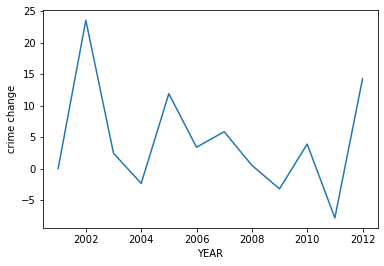

In [113]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='JHARKHAND'])
plt.show()

- The crime rate was highest in 2002 and since then its been decreasing overall

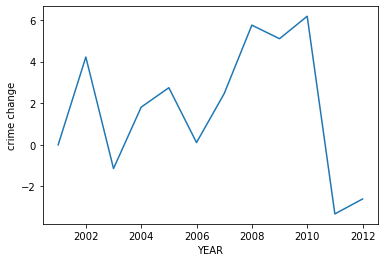

In [114]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='KARNATAKA'])
plt.show()

- The crime rate has been increasing overall reaching its highest point in 2010 and decreasing to minimum next year.

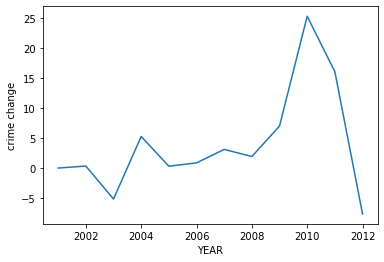

In [115]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='KERALA'])
plt.show()

- The crime rate has been gradually increasing reaching highest point in 2010 and reaching lowest point in 2012.

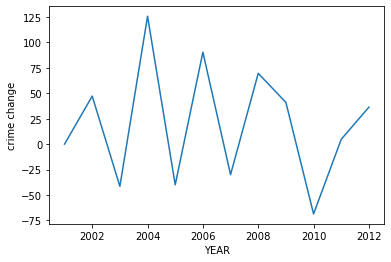

In [116]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='LAKSHADWEEP'])
plt.show()

- The crime rate reached highest in 2004 with one year high and one year low reaching lowest point in 2010.

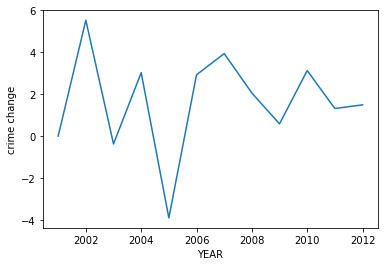

In [117]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='MADHYA PRADESH'])
plt.show()

- The crime rate reached lowest point in 2005 while its been overall increasing since then.

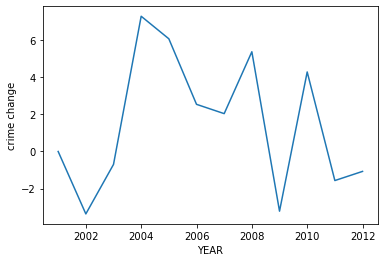

In [118]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='MAHARASHTRA'])
plt.show()

- Highest crime rate was seen in 2004 and since then its decreasing reaching its lowest point in 2009.

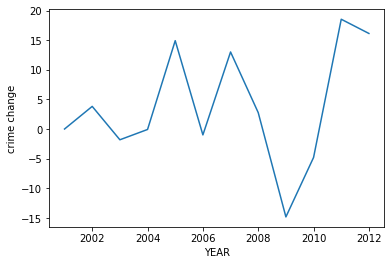

In [119]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='MANIPUR'])
plt.show()

- Overall increasing crime rate is seen with reaching lowest crime rate in year 2009 and again increasing.

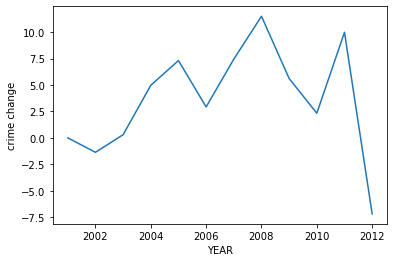

In [120]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='MEGHALAYA'])
plt.show()

- crime rate has been increasing throughout reaching its minimun in 2012.

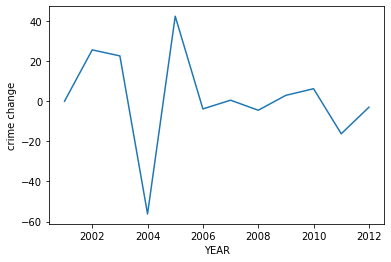

In [121]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='MIZORAM'])
plt.show()

- The crime rate reached lowest in 2004 and reaching highest in 2005 and since then its overall decreasing.

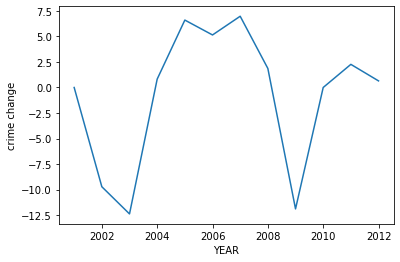

In [122]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='NAGALAND'])
plt.show()

- The crime rate reached lowest in 2003 and 2009 and highest in 2005 abd 2007.

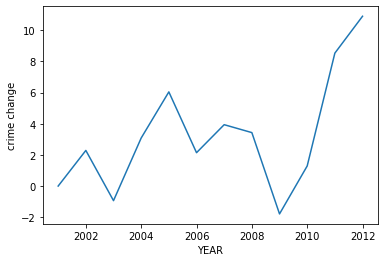

In [123]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='ODISHA'])
plt.show()

- The crime rate has been increasing throught only reaching mimimum in 2009 and then increasing.

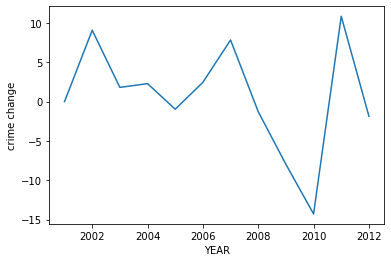

In [124]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='PUDUCHERRY'])
plt.show()

- The crime rate has been overall decreasing reaching minimum in 2010 and reaching highest next year.

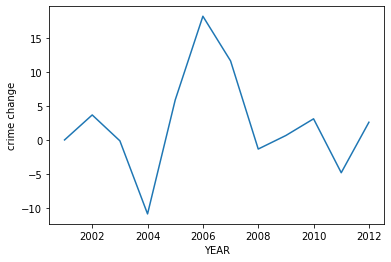

In [125]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='PUNJAB'])
plt.show()

- The crime rate was lowest in 2004 and increased to highest in 2006 and since then overally decrasing.

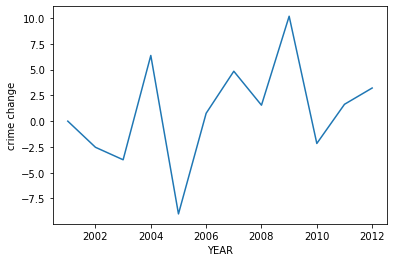

In [126]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='RAJASTHAN'])
plt.show()

- The crime rate has been overall increasing as it reached lowest in 2005 and since then increasing.

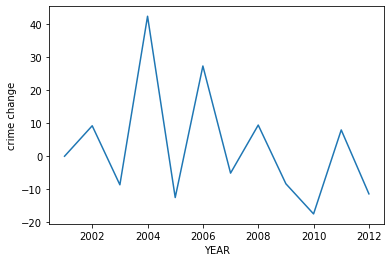

In [127]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='SIKKIM'])
plt.show()

- The crime rate reached highest in 2004 and since then its been overall decreasing.

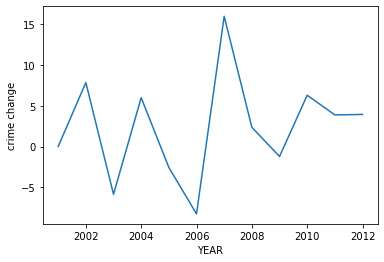

In [128]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='TAMIL NADU'])
plt.show()

- The crime rate was decreasing from 2001-2006 and since then it increased highest in 2007 and then decreasing.

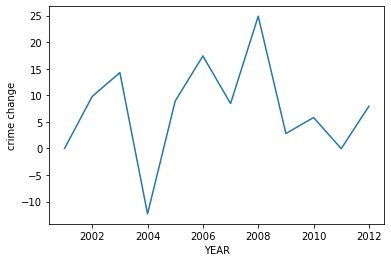

In [129]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='TRIPURA'])
plt.show()

- The crime rate reached lowest point in 2004 and its been increasing reaching highest in 2008 and since then decreasing.

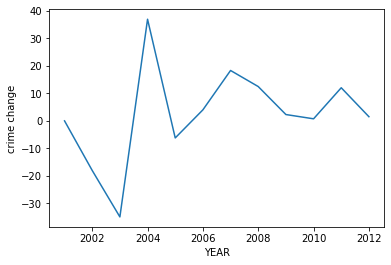

In [130]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='UTTAR PRADESH'])
plt.show()

- The crime rate was lowest in 2003 and highest in 2004.

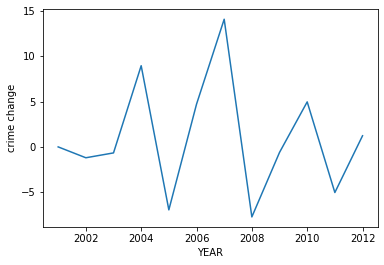

In [131]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='UTTARAKHAND'])
plt.show()

- The crime rate was lowest in 2005 and 2008 and highest in 2007.

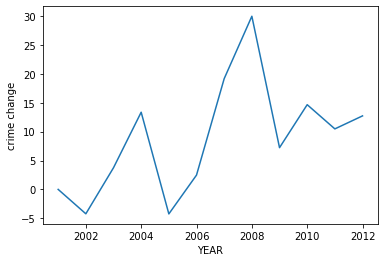

In [132]:
sns.lineplot(x='YEAR',y='crime change',data=crime_rate[crime_rate['STATE_UT']=='WEST BENGAL'])
plt.show()

- The crime rate is increasing overall reaching highest in 2008 and lowest in 2002 and 2005.

# 2.4	 Analysis of area vs overall crime

- For this I'm considering overall crimes as total IPC cases regsitered in particular state/area.
- For me area of a state is same in 2001 and 2011, hence I'm considering that no state partitions happend during this period. Due to this I can consider that from 2001 to 2012 no new states and union territories were formed, hence its area will be kept same.

In [3]:
# importing excelsheet into dataframe using pandas

area_crime=pd.read_excel('area_vs_overallcrime.xlsx')
area_crime.head()

STATE_UT  YEAR  TOTAL IPC CRIMES  AREA
0  A & N ISLANDS  2001               658  8249
1  A & N ISLANDS  2002               608  8249
2  A & N ISLANDS  2003               644  8249
3  A & N ISLANDS  2004               748  8249
4  A & N ISLANDS  2005               682  8249

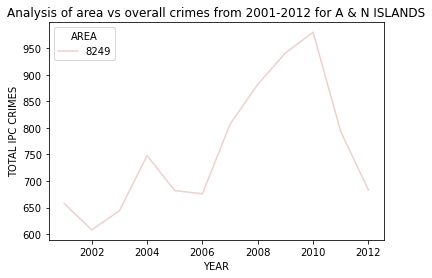

In [152]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='A & N ISLANDS'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for A & N ISLANDS')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years upto 2010 and then its decreasing.

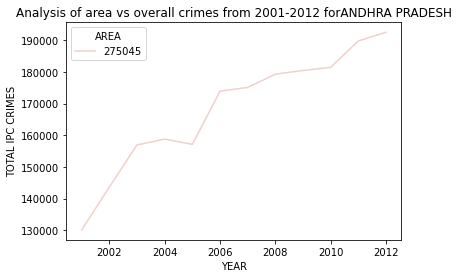

In [153]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='ANDHRA PRADESH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 forANDHRA PRADESH')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

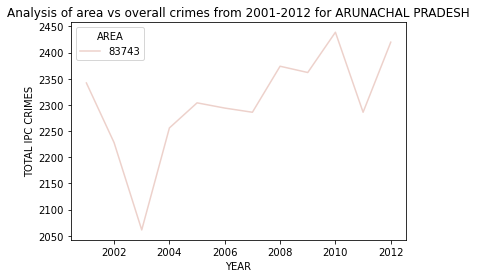

In [154]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='ARUNACHAL PRADESH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for ARUNACHAL PRADESH')
plt.show()

- The plot shows that total IPC crimes were lowest in 2003 and  have been increasing with increasing years.

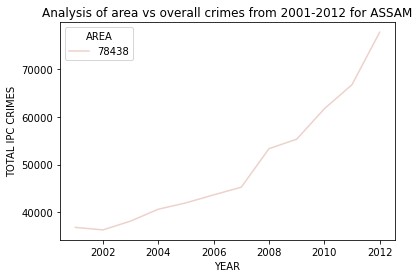

In [155]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='ASSAM'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for ASSAM')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

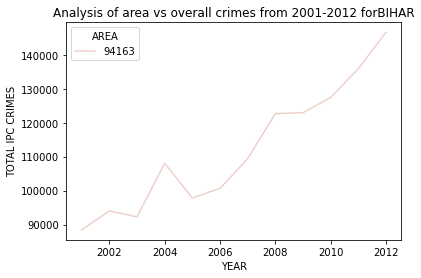

In [156]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='BIHAR'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 forBIHAR')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

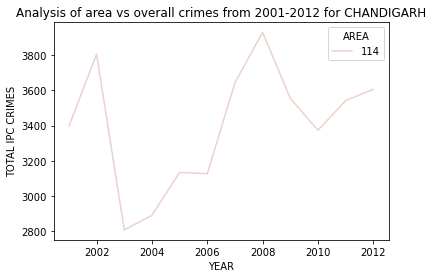

In [157]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='CHANDIGARH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for CHANDIGARH')
plt.show()

- The crimes were high in 2002 and decreased in 2003 and since then  increasing with increasing years.

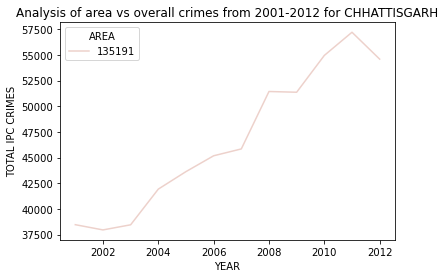

In [158]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='CHHATTISGARH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for CHHATTISGARH')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

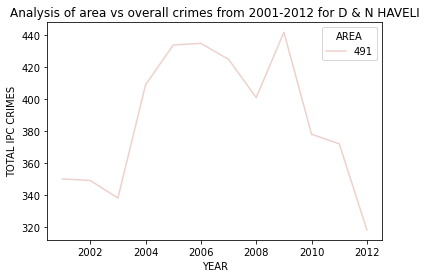

In [159]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='D & N HAVELI'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for D & N HAVELI')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years from 2003 and after reaching highest cases in 2009 its been decreasing.

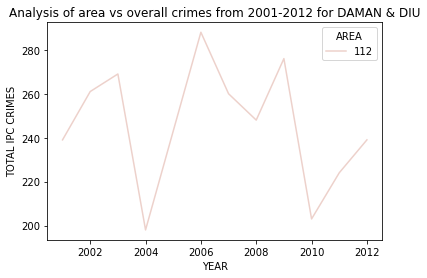

In [160]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='DAMAN & DIU'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for DAMAN & DIU')
plt.show()

- the lowest cases were seen in 2004 and 2010 with highest cases in 2006.

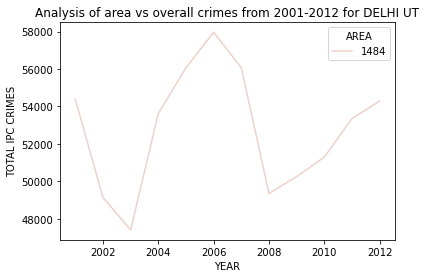

In [161]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='DELHI UT'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for DELHI UT')
plt.show()

- The plot shows that total IPC crimes were lowest in 2003 and since then have been increasing with increasing years with a drop in cases in 2008 and incresing later.

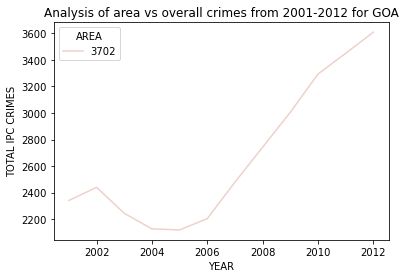

In [162]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='GOA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for GOA')
plt.show()

- - The plot shows that total IPC crimes were lower in 2005 and since then have been increasing with increasing years.

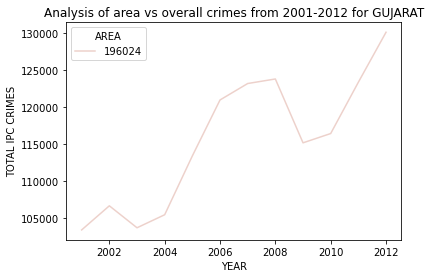

In [163]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='GUJARAT'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for GUJARAT')
plt.show()

- The plot shows that total overall IPC crimes have been increasing with increasing years with slightly less cases in 2009 and 2010.

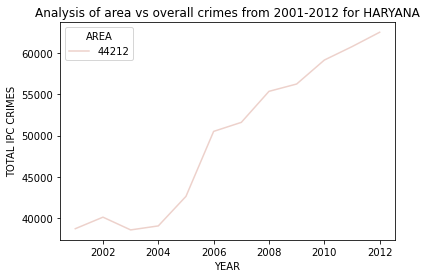

In [164]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='HARYANA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for HARYANA')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years.

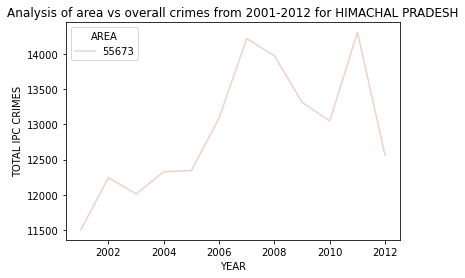

In [165]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='HIMACHAL PRADESH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for HIMACHAL PRADESH')
plt.show()

-  The plot shows that total IPC crimes were highest in 2007 abd 2011 with slight crime drop in 2010.

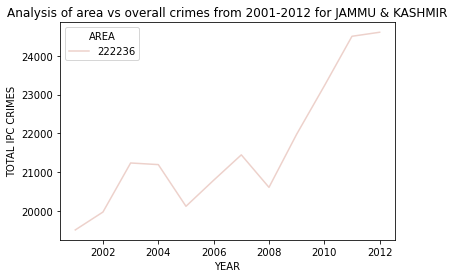

In [4]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='JAMMU & KASHMIR'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for JAMMU & KASHMIR')
plt.show()

-  The plot shows that total IPC crimes have been overall increasing with increasing years with raoid increase in 2011.

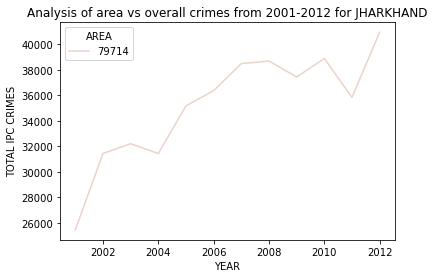

In [167]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='JHARKHAND'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for JHARKHAND')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years.

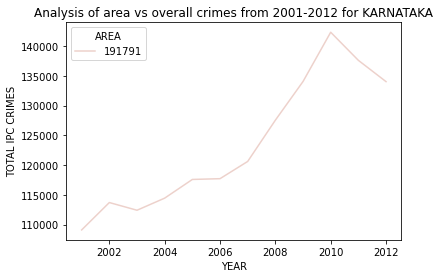

In [168]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='KARNATAKA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for KARNATAKA')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years but drop in cases seen in 2010 and kept ion decreasing

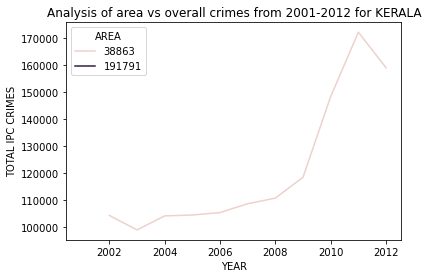

In [169]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='KERALA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for KERALA')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years and decreasing since 2011.

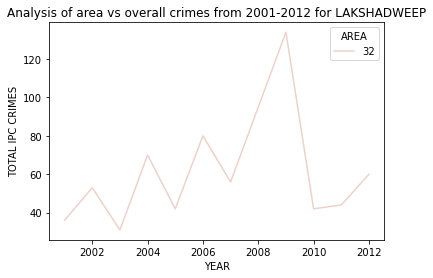

In [5]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='LAKSHADWEEP'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for LAKSHADWEEP')
plt.show()

- The plot shows that total IPC crimes have been overall increasing with highest increase in 2009 and lower in 2010.

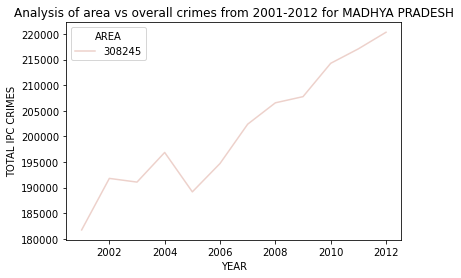

In [171]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='MADHYA PRADESH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for MADHYA PRADESH')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

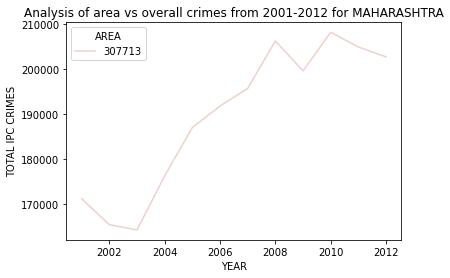

In [172]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='MAHARASHTRA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for MAHARASHTRA')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years.

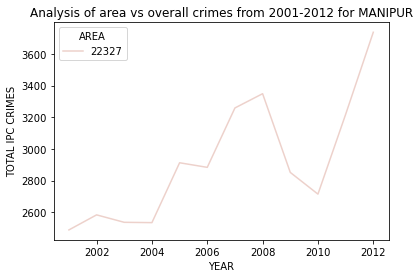

In [173]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='MANIPUR'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for MANIPUR')
plt.show()

- - The plot shows that total IPC crimes have been increasing with drop in cases in year 2010 and increasing again next years.

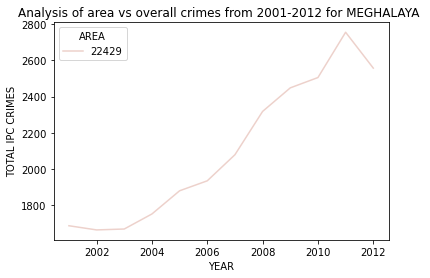

In [174]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='MEGHALAYA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for MEGHALAYA ')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years.

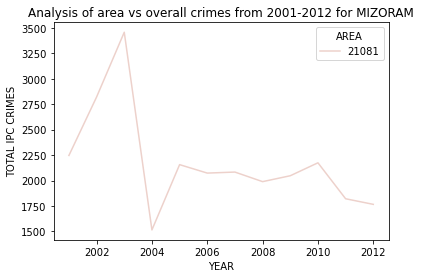

In [175]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='MIZORAM'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for MIZORAM')
plt.show()

- Highest cases were seen in 2003 and since then cases have been almost same througout the years.

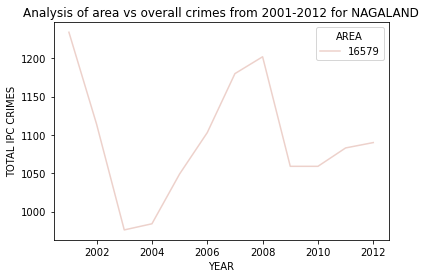

In [176]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='NAGALAND'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for NAGALAND')
plt.show()

- The ipc cases hit lowest in 2003 and started increasing upto 2008 and again decrease in crimes is seen.

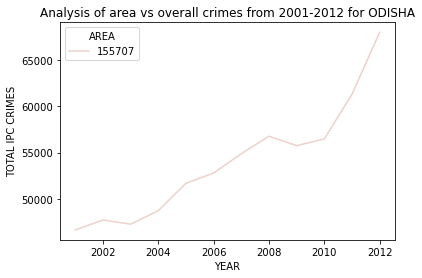

In [177]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='ODISHA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for ODISHA')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

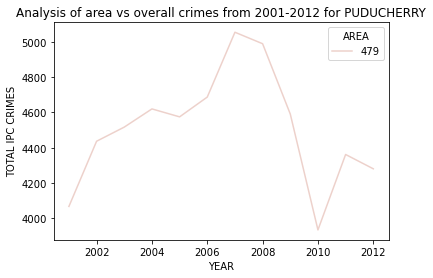

In [178]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='PUDUCHERRY'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for PUDUCHERRY')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years upto 2009 and reaching minimum cases in 2010.

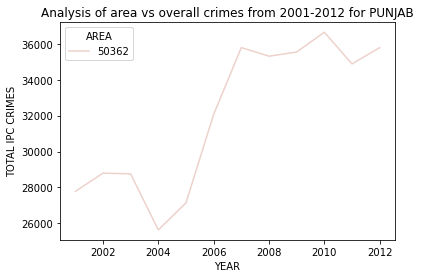

In [179]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='PUNJAB'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for PUNJAB')
plt.show()

- The lowest cases seen in year 2004 and then increasing as years increase.

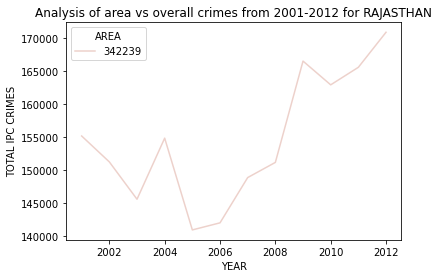

In [180]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='RAJASTHAN'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for RAJASTHAN')
plt.show()

- the cases started dropping until 2005 and  total IPC crimes have been increasing with increasing years since then.

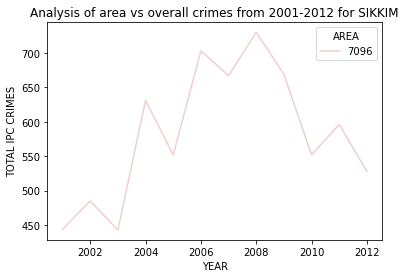

In [181]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='SIKKIM'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for SIKKIM')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years reaching highest in 2008 and then further cases started dropping.

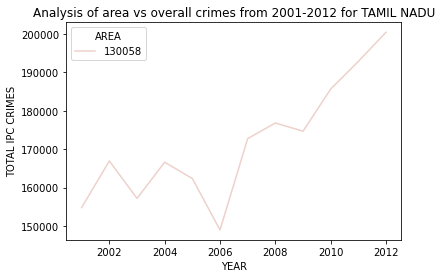

In [182]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='TAMIL NADU'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for TAMIL NADU')
plt.show()

- - The plot shows that total IPC crimes reached minimum in 2006 and since then have been increasing with increasing years.

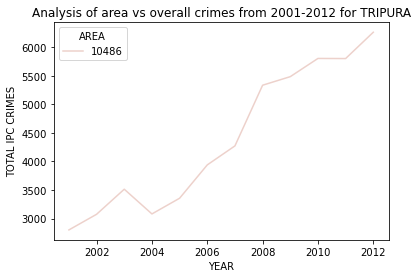

In [183]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='TRIPURA'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for TRIPURA')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

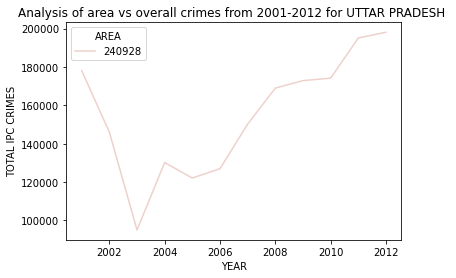

In [184]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='UTTAR PRADESH'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for UTTAR PRADESH ')
plt.show()

- - The plot shows that total IPC crimes were lowest in 2003 and since then have been increasing with increasing years.

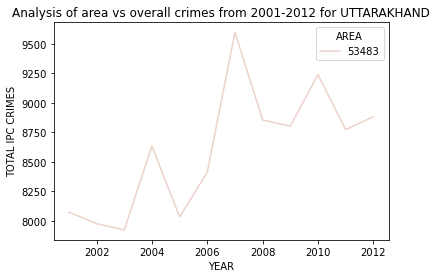

In [185]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='UTTARAKHAND'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for UTTARAKHAND')
plt.show()

- - The plot shows that total IPC crimes have been increasing with increasing years upto 2007 and later decreasing with slight increase.

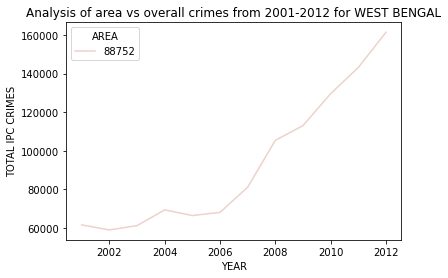

In [186]:
sns.lineplot(x='YEAR',y='TOTAL IPC CRIMES',data=area_crime[area_crime['STATE_UT']=='WEST BENGAL'],hue='AREA')
plt.title('Analysis of area vs overall crimes from 2001-2012 for WEST BENGAL')
plt.show()

- The plot shows that total IPC crimes have been increasing with increasing years.

# 2.5	 Analysis of population vs overall crime

- For this I have made a excel sheet file which contains columns such as state names, year, population of each state for that prticulatr year and population density column which shows density of population located in per sq.km.
- Also since I have population data for only 2001 and 2011, only those years have been taken for analysis.
- Total IPC crimes column is taken as it contains all the crimes registered in that particluar state for those particular years

In [188]:
# importing sheet for population vs overall time analysis

pop_data=pd.read_excel('population_vs_crimes.xlsx')
pop_data.head()

STATE_UT  YEAR  POPULATION  POP_DENSITY  TOTAL CRIMES
0      A & N ISLANDS  2001      356152           43           323
1      A & N ISLANDS  2011      380581           46           392
2     ANDHRA PRADESH  2001    76210007          277         34344
3     ANDHRA PRADESH  2011    84580777          308         38392
4  ARUNACHAL PRADESH  2001     1097968           13           618

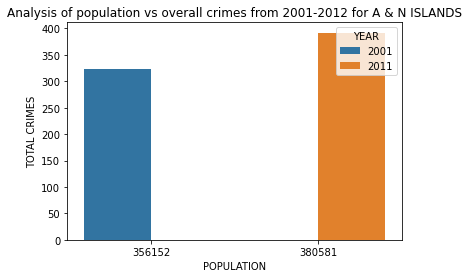

In [201]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='A & N ISLANDS'],hue='YEAR')
plt.title('Analysis of population vs overall crimes from 2001 & 2011 for A & N ISLANDS')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

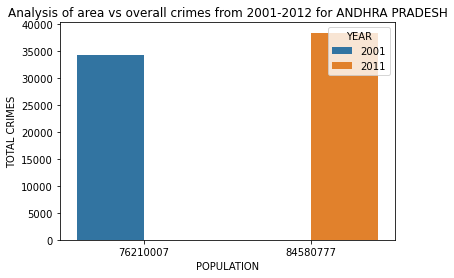

In [202]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='ANDHRA PRADESH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for ANDHRA PRADESH')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

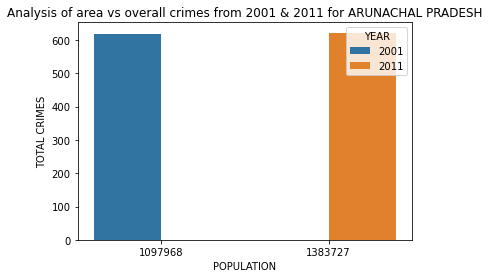

In [203]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='ARUNACHAL PRADESH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for ARUNACHAL PRADESH')
plt.show()

- - It can be seen from the plot that though population has increased total crimes has remained almost similar in 2011 as compared to in 2001.

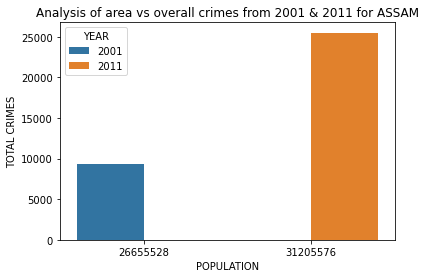

In [204]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='ASSAM'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for ASSAM')
plt.show()

- It can be seen from the plot that as population has increased total crimes has highly increased  in 2011 as compared to in 2001.

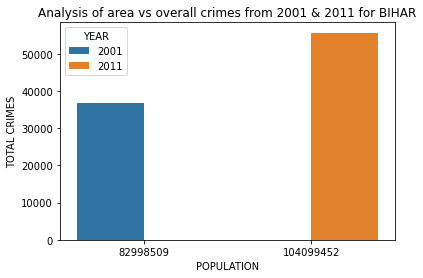

In [205]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='BIHAR'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for BIHAR')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased  in 2011 as compared to in 2001.

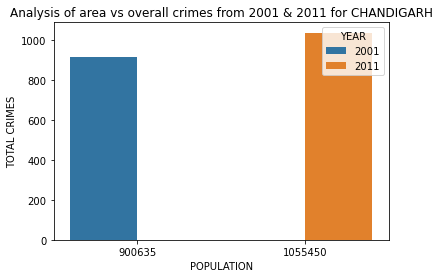

In [206]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='CHANDIGARH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for CHANDIGARH')
plt.show()

- - It can be seen from the plot that as population has increased total crimes has also increased  in 2011 as compared to in 2001.

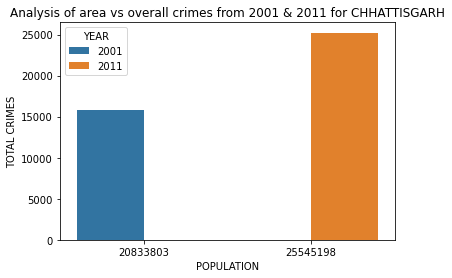

In [207]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='CHHATTISGARH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for CHHATTISGARH')
plt.show()

 - It can be seen from the plot that as population has increased total crimes has also increased  in 2011 as compared to in 2001.

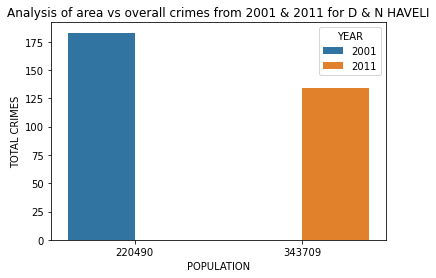

In [208]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='D & N HAVELI'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for D & N HAVELI')
plt.show()

- In this case though the population has increased the total crimes has decreased in 2011 as compared to 2001.

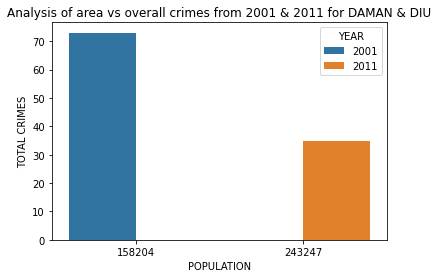

In [209]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='DAMAN & DIU'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for DAMAN & DIU')
plt.show()

- In delhi it can be seen that though poulation has increased in 2011 total crimes are decreased as compared to 2001.

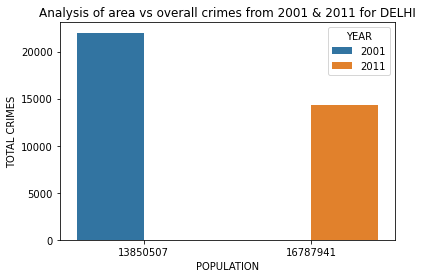

In [210]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='DELHI'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for DELHI')
plt.show()

it can be seen from the plot that though poulation has increased in 2011 total crimes are decreased as compared to 2001.

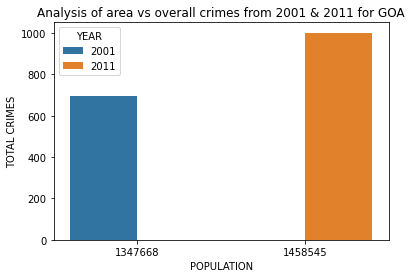

In [211]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='GOA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for GOA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

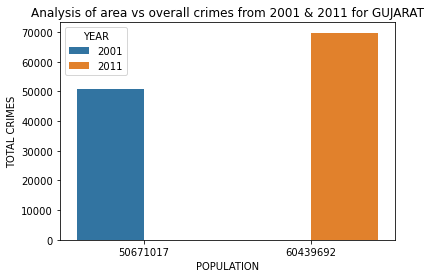

In [212]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='GUJARAT'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for GUJARAT')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

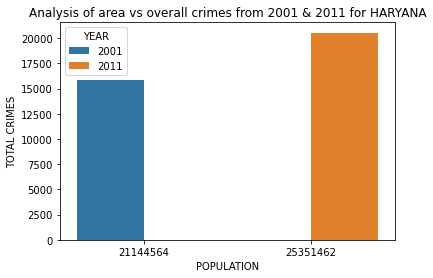

In [213]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='HARYANA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for HARYANA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

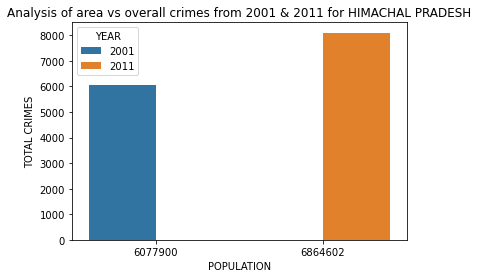

In [214]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='HIMACHAL PRADESH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for HIMACHAL PRADESH')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

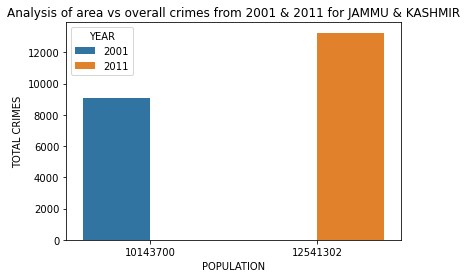

In [215]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='JAMMU & KASHMIR'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for JAMMU & KASHMIR')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

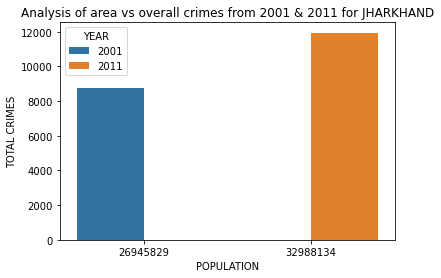

In [216]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='JHARKHAND'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for JHARKHAND')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

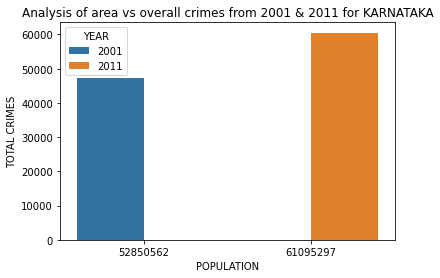

In [217]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='KARNATAKA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for KARNATAKA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

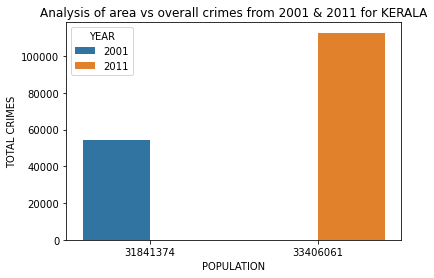

In [218]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='KERALA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for KERALA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

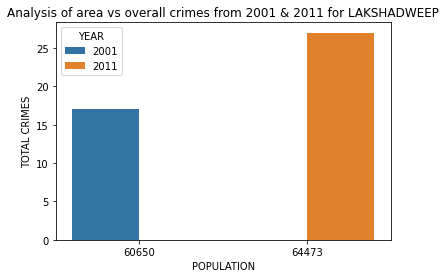

In [219]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='LAKSHADWEEP'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for LAKSHADWEEP')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

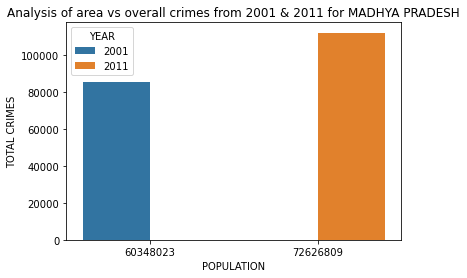

In [220]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='MADHYA PRADESH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for MADHYA PRADESH')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

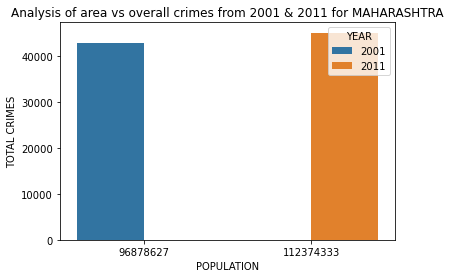

In [221]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='MAHARASHTRA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for MAHARASHTRA')
plt.show()

- With increase in population in 2011 there is only slight increase in total crimes as compared to in 2001.

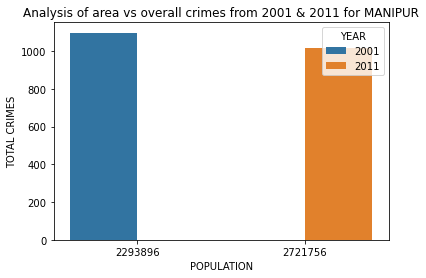

In [222]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='MANIPUR'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for MANIPUR')
plt.show()

- With increase in population in 2011, the total crimes reported are decreased as compared to that in 2001

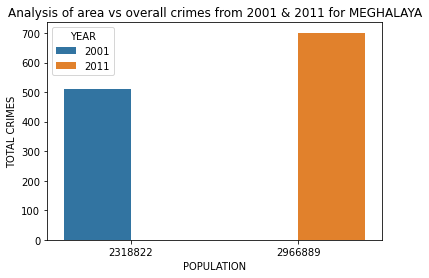

In [223]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='MEGHALAYA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for MEGHALAYA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

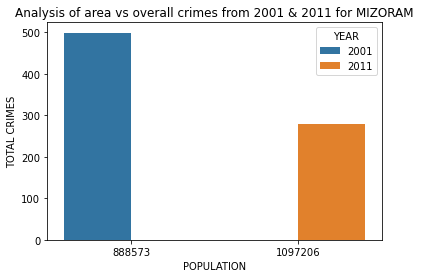

In [224]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='MIZORAM'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for MIZORAM')
plt.show()

- With increase in population we can see decrease in total crimes in 2011 as compared to that in 2001.

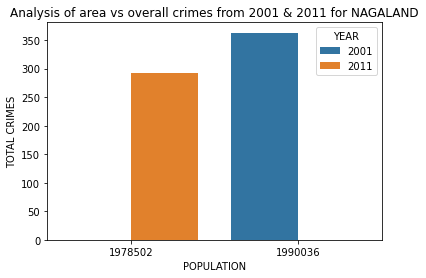

In [225]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='NAGALAND'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for NAGALAND')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

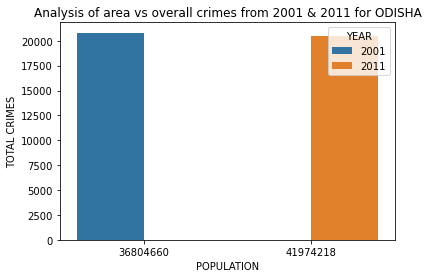

In [226]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='ODISHA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for ODISHA')
plt.show()

- With increase in population in 2011, there is no chnge in total crimes as compared to that in 2001.

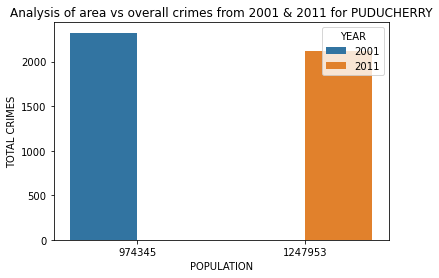

In [227]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='PUDUCHERRY'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for PUDUCHERRY')
plt.show()

- Crimes have slightly decreased in 2011 with increase in population as compared to 2001.

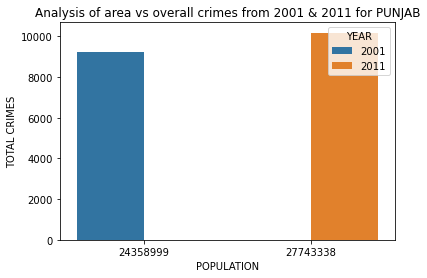

In [228]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='PUNJAB'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for PUNJAB')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

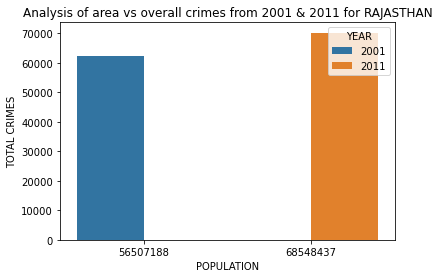

In [229]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='RAJASTHAN'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for RAJASTHAN')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

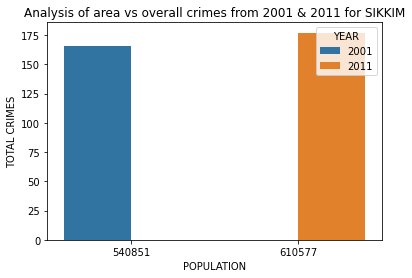

In [230]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='SIKKIM'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for SIKKIM')
plt.show()

It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

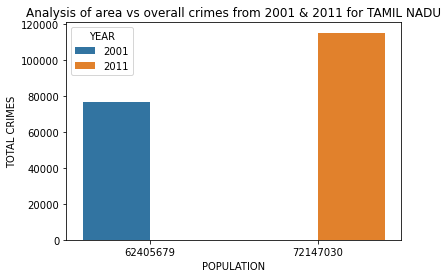

In [231]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='TAMIL NADU'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for TAMIL NADU')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

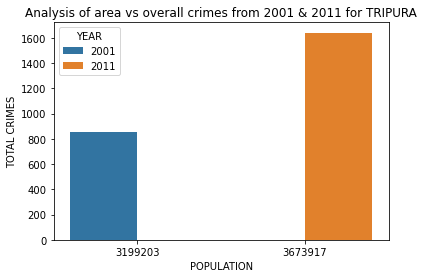

In [232]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='TRIPURA'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for TRIPURA')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

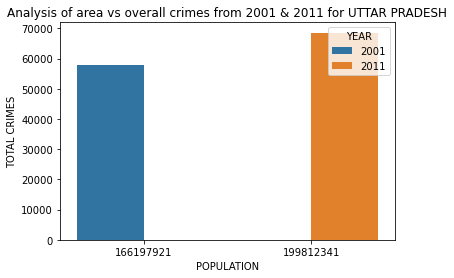

In [233]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='UTTAR PRADESH'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for UTTAR PRADESH')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

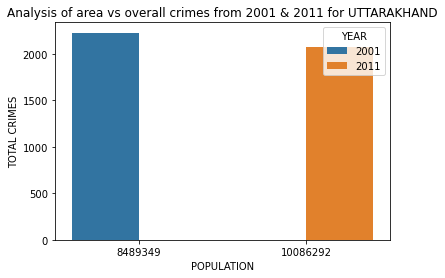

In [234]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='UTTARAKHAND'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for UTTARAKHAND')
plt.show()

- There is slight decrease in crimes in 2011 as compared to 2001 with increase in population.

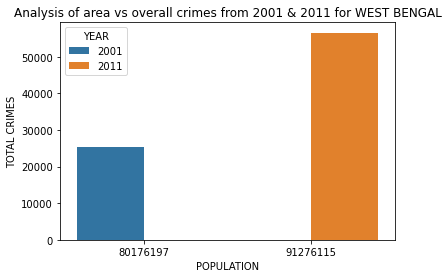

In [238]:
sns.barplot(x='POPULATION',y='TOTAL CRIMES',data=pop_data[pop_data['STATE_UT']=='WEST BENGAL'],hue='YEAR')
plt.title('Analysis of area vs overall crimes from 2001 & 2011 for WEST BENGAL')
plt.show()

- It can be seen from the plot that as population has increased total crimes has also increased in 2011 as compared to in 2001.

# 2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

**The brief report on each state is as follows:**
    

**Andaman and Nicobar islands:**
With increase in literacy rate murder, attempt to murder and kidnapping and abduction cases decreases in 2011.Crimes on women and children such as assault on women with intent to outrage her modesty and cruelty by husband and family cases have increased with increase in literacy rate while Rape, kidnapping and abduction of women and girls, insult to modesty of women decreased with increase in literacy rate in 2011.Crimes related to robbery, auto theft,riots, criminal breach of trust,hurt cases have increased with increase in literacy rate and dacoity,cheating ,causing death by negligence, arson cases have been decreased with increase in literacy rate.The crime rate change in andaman is overall decreasing but crime rate was highest in 2007. Total crimes have been increasing with increase in population

**Andhra Pradesh**:
with increasing literacy rate there is increase in murder cases attempt to murder and Kidnaping and abductions.Crimes on women such as Rape. kidnapping and abduction of women and girls, dowry deaths,Insult to modesty and assault in women and cruelty by husband and family has increased in 2011. Crimes such as robbery, auto theft,riots,criminal breach of trust, cheatin, arson, hurt and deaths caused by negligence have iincreased in 2011.dacoity cases has seen decline in 2011 compared to that in 2001. It is also seen that total IPC crimes have been increasing with increasing years and crime rate change for Andhra prtadesh was highest in  2002 and 2006 and overall its coming down.

**Arunachal Pradesh**:
with increasing literacy rate there is decrease in murder cases, attempt to murder but there is rise in cases of Kidnaping and abduction in 2011 compared to that in 2001.Crimes on women such as Rape. kidnapping and abduction of women and girls and cruelty by husband and family has increased in 2011 even though litercy rate is increased while assault on women have decreased in 2011.Crimes such as robbery,dacoity hurt have declined with increased literacy rate. But criminal breach of trust, cheating, arson,riots and auto thefts have increased in 2011. Crime rate change was lowest in 2003 and with population increase crimes reported are also increasing.

**Assam**
With increase in literacy rate there is no change in murder cases but increase of cases in seen in attemopt to murder, kidnapping and abduction.Crimes on women and children such as Rape, kidnapping and abduction of women and girls, assault on women with intent to outrage he modesty,dowry deaths,c insult to modesty of women, cruelty by husband and family have increased with increase in literacy rate.Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001. Crime rate change was lowest in 2002 and since then its been increasing with increasing population.

**Bihar**
With increase in literacy rate there is no change in murder cases but increase of cases in seen in attemopt to murder, kidnapping and abduction.Crimes on women and children such as Rape, kidnapping and abduction of women and girls, assault on women with intent to outrage he modesty,dowry deaths,  insult to modesty of women, cruelty by husband and family have increased with increase in literacy rate.Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased with increase in literacy rate while dacoity cases are less in 2011 as compared to 2001. Crime rate change was lowest in 2004, since then its been increasing with increase in population

**Chandigarh**:
With increase in literacy rate murder, attempt to murder and kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, cruelty by husband and family increased with increase in literacy rate while kidnapping and abduction of women and girls, insult to modesty of women, dowry deaths, assault on women with intent to outrage her modesty decreased with increase in literacy rate in 2011.Crimes related to dacoity, robbery, auto theft,arson, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate and riots and hurt cases have been decreased with increase in literacy rate.The lowest crime rate change was seen in 2003 and then its started increasing reaching highest in 2007. The total crimes have been increasing with increase in population

**Chattisgarh**:
With increase in literacy rate there is increase in murder cases, attempt to murder and kidnapping and abduction.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,insult to modesty of women have increased with increase in literacy rate while there is slight decrease in assault on women with intent to outrage her modesty with increase in literacy rate.Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased while dacoity cases are less in 2011 as compared to 2001. The crime change has been decreasing overall once it reached its highest in 2008.  The total crimes have been increasing with increase in population

**Dadar and Nagar Haveli**
With increase in literacy rate murder and kidnapping and abduction cases increased in 2011.Crimes on women and children such as kidnapping and abduction of women and girls  have increased with increase in literacy rate while Rape, cruelty by husband and family, assault on women with intent to outrage her modesty cases decreased with increase in literacy rate in 2011.Crimes such as  riots, auto theft,dacoity, , cheating,arson , causing death by negligence cases have increased while criminal breach of trust and hurt cases have been decreased with increase in literacy rate. The crime rate change was high in 2004 and since then decreasing year by year.In this case though the population has increased the total crimes has decreased in 2011 as compared to 2001.

**Daman and Diu**
With increase in literacy rate murder, attempt to murder and kidnapping and abduction cases decreased in 2011.Crimes on women and children such as and girls cases have increased with increase in literacy rate while kidnapping and abduction of women, cruelty by husband and family, decreased with increase in literacy rate in 2011.Crimes related to dacoity,robbery, auto theft, cheating, causing death by negligence cases have increased with increase in literacy rate and criminal breach of trust,riots, arson, hurt cases have been decreased with increase in literacy rate. The crime rate change is mostly negative indicating decrease in total crimes over the years. Also as population increased there is decrease in total crimes.

**Delhi**
With increase in literacy rate murder cases remains same, attempt to murder cases decreased while kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths,cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women cases have increased with increase in literacy rate in 2011.Crimes related to auto theft, cheating, causing death by negligence cases have increased with increase in literacy rate and dacoity, robbery, riots , criminal breach of trust, arson, hurt cases have been decreased with increase in literacy rate.In delhi it can be seen that though poulation has increased in 2011 total crimes are decreased as compared to 2001 also indicating decrease in crime rate change over the years.

**Goa**
With increase in literacy rate there is decrease in attempt to murder cases but increase in murder and kidnapping and abductions. Crimes on women and children such as Rape, kidnapping and abduction of women and girls cruelty by husband and family, insult to modesty of women, assault on women with intent to outrage her modesty have increased with increase in literacy rate while there is decrease in dowry deaths in 2011.Crimes related to robbery, auto theft,criminal breach of trust, cheating, arson, hurt have increased increased while dacoity cases are less in 2011 as compared to 2001. The crime rate change was lowest in 2003 and since its been increasing as population is increasing.

**Gujarat**
With increase in literacy rate there slight decrease in murder cases, attempt to murder but increase in kidnapping and abductions in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls, cruelty by husband and family, have increased with increase in literacy rate while there is slight decrease in assault on women with intent to outrage her modesty,dowry deaths,insult to modesty of women in 2011. Crimes related to robbery, auto theft and cruelty by negligence have increased  while dacoity, Riots, criminal breach of trust, cheating, arson, hurt cases are less in 2011 as compared to 2001. The crime rate change was highest in 2005 indicating highest total crimes reported, then gradually decreasing in 2009 and increasing later. Also with population increase total IPC crimes reported are increasing yearwise.

**Haryana**
With increase in literacy there is increase in murder cases, attempt to murder and kidnapping and abduction in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women, cruelty by husband and family, have increased with increase in literacy rate while there is slight decrease in dowry deaths with increase in literacy rate but assault on women with intent to outrage he modesty cases remain same in 2001 and 2011.
Crimes related to robbery,dacoity , auto theft,Riots, criminal breach of trust,cheating and causing death by negligence have increased with  while arson and hurt cases decreased in 2011 as compared to 2001. Also crime rate change was highest in 2006 and since then crime rate is never negative indicatring that with increasing population , total IPC crimes also increased.

**HImachal pradesh**
With increase in literacy there is increase in murder cases and kidnapping and abduction but decrease in attempt to murder in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls,insult to modesty of women,assault on women with intent to outrage he modesty have increased with increase in literacy rate while there is slight decrease in cruelty by husband and family,dowry deaths with increase in literacy rate in 2011. Crimes related to auto theft, criminal breach of trust,cheating and causing death by negligence have increased with increase in literacy rate while dacoity,robbery,Riots, arson and hurt cases decreased in 2011 as compared to 2001. The lowest crime rate chnage was seen in 2012 but with increasing population total ipc crimes have been increasing.

**Jammu and Kashmir**
With increase in literacy there is increase in kidnapping and abduction but decrease in murder cases and attempt to murder in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls, insult to modesty of women, assault on women with intent to outrage her modesty, cruelty by husband and family have increased with increase in literacy rate while there is slight decrease in dowry deaths with increase in literacy rate in 2011. Crimes related to auto theft,Riots, criminal breach of trust, cheating and causing death by negligence have increased  while dacoity, robbery, arson and hurt cases decreased in 2011 as compared to 2001.The crime rate was highest in 2003 and 2009 and after that its been decreasing. With increasing population total IPC crimes have been overall increasing over years.

**Jharkhand**
With increase in literacy there is increase in murder cases and kidnapping and abduction but decrease in attempt to murder in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls, insult to modesty of women,assault on women with intent to outrage he modesty , cruelty by husband and family, dowry deaths have increased with increase in literacy rate in 2011. Crimes related to auto theft, Riots, criminal breach of trust, cheating and causing death by negligence and hurt have increased  while dacoity, robbery and arson cases decreased in 2011 as compared to 2001. The crime rate change is iverall decrasing with incresing from 2012.Total IPC crimes have been increasing over years with increasing population.

**Karnataka**
With increase in literacy there is increase in murder cases, kidnapping and abduction and attempt to murder in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls,assault on women with intent to outrage he modesty, cruelty by husband and family, dowry deaths have increased with increase in literacy rate in 2011 while insult to modesty of women cases remains same in 2011. Crimes related to auto theft, robbery, Riots, dacoity, cheating and causing death by negligence have increased while criminal breach of trust, hurt and arson cases decreased in 2011 as compared to 2001. The crime rate change was increasing until 2010 and decreasing to minimum next year.

**Kerala**
With increase in literacy there is increase in kidnapping and abduction but decrease in murder cases and attempt to murder in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,assault on women with intent to outrage her modesty,cruelty by husband and family, insult to modesty of women cases have increased with increase in literacy rate in 2011 while dowry deaths cases decreased in 2011.Crimes related to robbery, Riots,hurt, cheating, causing death by negligence, have increased with increase in literacy rate while criminal breach of trust, auto theft, dacoity and arson cases decreased in 2011 as compared to 2001. The crime change rate has been incresing unti year 2010 indicating that with increasing population total crimes increased and started dropping after 2010. 

**lakshwadeep**
With increase in literacy rate no murders were reported in 2011, in attempt to murder only 1 case is registered in 2011. Crimes related to riots,hurt, criminal breach of trust cases have increased with increase in literacy rate and arson, cases have been decreased with increase in literacy rate. With increasing population total IPC crimes have been overall increasing with highest increase in 2009 and lower in 2010 with overall decreasing crime rate change.

**Madhya pradesh**
With increase in literacy there is slight increase in kidnapping and abduction and murder but decrease in attempt to murder cases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls, dowry deaths, cruelty by husband and family, assault on women with intent to outrage he modesty cases have increased with increase in literacy rate in 2011 while insult to modesty of women cases remains same in 2011. Crimes related to robbery , hurt,auto theft, criminal breach of trust, cheating, causing death by negligence have increased while Riots, dacoity and arson cases decreased in 2011 as compared to 2001. The crime rate change was lowest in 2005 and since then increasing slightly, indicating with increase in population, the total crimes also increases.

**Maharashtra**
With increase in literacy murder cases remains same while kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family, assault on women with intent to outrage her modesty cases have increased with increase in literacy rate in 2011 while insult to modesty of women cases slightly decrease in 2011. Crimes related to dacoity, robbery , Riots, auto theft, criminal breach of trust, cheating, arson, causing death by negligence have increased  while hurt cases are almost same in 2011 as compared to 2001.The crime rate change was highest in 2004 and since then its decreasing but with increasing population the total crimes increasing.

**Manipur**
With increase in literacy murder cases decreases while kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family, assault on women with intent to outrage he modesty cases have increased with increase in literacy rate in 2011. Crimes related to auto theft, criminal breach of trust, cheating, arson, hurt, have increased while dacoity, robbery, Riots, causing death by negligence cases decreased in 2011 as compared to 2001. Crime rate has been increasing since 2008 . Here with increasing population total crimes have been decreasing.

**Meghalaya**
With increase in literacy rate murder cases, kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths, cruelty by husband and family,assault on women with intent to outrage he modesty cases have increased with increase in literacy rate in 2011. Crimes related to auto theft,criminal breach of trust, cheating, arson,hurt, causing death by negligence have increased  while dacoity, robbery cases decreased in 2011 as compared to 2001. The crime rate change have been increasing till year 2011 and decresing since then. Also with increasing population total crimes are also increasing.

**MIzoram**
With increase in literacy rate murder cases decrease while kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, ,assault on women with intent to outrage he modesty cases have increased with increase while cruelty by husband and family cases decreases in literacy rate in 2011. Crimes related to auto theft, hurt, causing death by negligence have increased  while dacoity, robbery, criminal breach of trust, cheating, arson cases decreased in 2011 as compared to 2001.The crime rate change has been decreasing overall indicating that with increasing population there is decrease in total crimes.

**Nagaland**
With increase in literacy rate murder cases decreases while kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, cruelty by husband and family cases have increased with increase in literacy rate while kidnapping and abduction of women and girls cases decreased with increase in literacy rate in 2011. Crimes related to dacoity, robbery, auto theft arson, hurt have increased while , riots, criminal breach of trust, cheating and causing death by negligence cases decreased in 2011 as compared to 2001. The crime rate change was higher in years 2004-2008. Also with increasing population the total crimes have also increased.

**Odisha**
With increase in literacy rate murder, kidnapping and abduction and attempt to murder cases increases in 2011.Crimes on women and children such as Rape, dowry deaths, kidnapping and abduction of women and girls, cruelty by husband and family,assault on women with intent to outrage he modesty cases have increased while insult to modesty of women is decreased with increase in literacy rate in 2011. Crimes related to dacoity,robbery, auto theft, riots , cheating, arson, hurt, causing death by negligence have increased  while criminal breach of trust cases have decreased in 2011 as compared to 2001.Cases related to arson remained same in 2001 and 2011. The crime rate change has been overall increasing.

**Puducherry**
With increase in literacy rate murder and kidnapping and abduction cases increased in 2011 while attempt to murder cases decreased . Crimes on women and children such as , cruelty by husband and family, kidnapping and abduction of women and girls cases have increased with increase in literacy rate while Rape, dowry deaths, insult to modesty of women cases decreased with increase in literacy rate while assault on women with intent to outrage her modesty cases remained same in 2011. Crimes related to auto theft, dacoity, robbery, riots, arson, hurt, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate. The crime rae change have been decreasing until year 2010 and then increasing. This also supports that with increasing population the total cases have been decreased.

**Punjab**
With increase in literacy rate murder, kidnapping and abduction and attempt to murder cases increases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls have increased with increase in literacy rate while dowry deaths, assault on women with intent to outrage he modesty, insult to modesty of women cases decreased with decrease in literacy rate in 2011 while cruelty by husband and family remains same in 2011. Crimes related to robbery, auto theft,, cheating, arson, hurt, causing death by negligence have increased with increase in literacy rate while dacoity, criminal breach of trust cases decreased in 2011 as compared to 2001. The crime rate change was lowest in 2004 and since then its been increasing indicating increase in total crimes.

**Rajasthan**
With increase in literacy rate murder cases and kidnapping and abduction increases while attempt to murder cases decreases in 2011. Crimes on women and children such as Rape, dowry deaths, kidnapping and abduction of women and girls, cruelty by husband and family have increased with increase in literacy rate while assault on women with intent to outrage he modesty and insult to modesty of women cases decreased with increase in literacy rate in 2011. Crimes related to auto theft, cheating, causing death by negligence have increased  while dacoity, robbery,riots,criminal breach of trust,arson,hurt cases decreased in 2011 as compared to 2001. The crime rate change has been increasing overall. Also with increasing population the total crimes also increasing.

**Sikkim**
With increase in literacy rate murder and attempt to murder decreases while kidnapping and abduction cases increases in 2011. Crimes on women and children such as Rape, kidnapping and abduction of women and girls, cruelty by husband and family and assault on women with intent to outrage he modesty cases have increased with increase in literacy rate while insult to modesty of women cases decreased with increase in literacy rate in 2011.Crimes related to robbery, auto theft, riots, criminal breach of trust, cheating, arson, hurt, causing death by negligence have increased with increase in literacy rate. The crime rate change has been overall decreasing. Also total crimes have been increasing with increasing population.

**Tamil Nadu**
With increase in literacy rate murder, attempt to murder decreases and kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls, cruelty by husband and family cases have increased with increase in literacy rate while insult to modesty of women,dowry deaths,assault on women with intent to outrage her modesty cases decreased with increase in literacy rate in 2011.Crimes related to robbery, auto theft, cheating causing death by negligence have increased while dacoity, riots, criminal breach of trust, arson, hurt cases have been drcreased with increase in literacy rate. The crime rate has been overall increasing and with increasing population total crimes also increasing.

**Tripura**
With increase in literacy rate murder cases decreases and kidnapping and abduction and attempt to murder cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls, cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women and dowry deaths cases have increased with increase in literacy rate.Crimes related to , auto theft, riots, criminal breach of trust, cheating, arson, hurt cases have increased while dacoity,robbery, causing death by negligence cases have been decreased with increase in literacy rate. The crime rate change was lowest in 2008 while it is increasing since then. With increase in population the total crimes also increasing.

**Uttar Pradesh**
With increase in literacy rate murder and attempt to murder cases decreases and kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths cases have increased with increase in literacy rate while cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women decreased with increase in literacy rate in 2011.Crimes related to , auto theft,, criminal breach of trust, cheating, causing death by negligence cases have increased with increase in literacy rate and dacoity,robbery,riots, arson, hurt cases have been decreased with increase in literacy rate. The crime rate change was lowest in 2003 and since then its been increasing overall.With increase in population the total crimes also increasing.

**Uttarakhand**
With increase in literacy rate murder, attempt to murder and kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths,cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women cases have increased with increase in literacy rate in 2011.Crimes related to auto theft, criminal breach of trust, cheating, arson, hurt, causing death by negligence cases have increased while dacoity, robbery, riots cases have been decreased with increase in literacy rate. There is slight decrease in total crimes with increase in population.

**West Bengal**
With increase in literacy rate murder, attempt to murder and kidnapping and abduction cases increases in 2011.Crimes on women and children such as Rape, kidnapping and abduction of women and girls,dowry deaths cases have increased with increase in literacy rate while cruelty by husband and family, assault on women with intent to outrage her modesty, insult to modesty of women decreased with increase in literacy rate in 2011.Crimes related to auto theft,robbery,riots, criminal breach of trust, cheating,arson, hurt causing death by negligence cases have increased while dacoity cases have been decreased with increase in literacy rate. The crime rate is increasing overall and with increasing population the total crimes also increasing.